In [1]:
import gzip
from collections import defaultdict
import scipy
import scipy.optimize
import numpy
import random
import pandas as pd
import numpy as np

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [3]:
path = "C:/Users/Thy Tran Cam Nguyen/Downloads/googlelocal/places.clean.json.gz"

In [4]:
f = gzip.open(path, 'rt', encoding= 'utf8')
data = f.readlines()

In [34]:
pd.DataFrame.from_dict(eval(data[0][:-1]), orient='index').T

,name,price,address,hours,phone,closed,gPlusPlaceId,gps
0,Diamond Valley Lake Marina,None,"[2615 Angler Ave, Hemet, CA 92545]","[[Monday, [['6:30 am--4:15 pm']]], [Tuesday, [...",(951) 926-7201,False,104699454385822125632,"[33.703804, -117.003209]"


In [5]:
rows = []
for r in data:
    rows.append(eval(r[:-1]))

In [6]:
places=pd.DataFrame(rows)

In [83]:
path = "C:/Users/Thy Tran Cam Nguyen/Downloads/reviews.clean.json.gz"

In [84]:
reviews_data = parse(path)

In [85]:
rvs = []
c = 1
for l in reviews_data:
    if c % 30_000 == 0:
        print(c)
    rvs.append(l)
    c += 1

30000
60000
90000
120000
150000
180000
210000
240000
270000
300000
330000
360000
390000
420000
450000
480000
510000
540000
570000
600000
630000
660000
690000
720000
750000
780000
810000
840000
870000
900000
930000
960000
990000
1020000
1050000
1080000
1110000
1140000
1170000
1200000
1230000
1260000
1290000
1320000
1350000
1380000
1410000
1440000
1470000
1500000
1530000
1560000
1590000
1620000
1650000
1680000
1710000
1740000
1770000
1800000
1830000
1860000
1890000
1920000
1950000
1980000
2010000
2040000
2070000
2100000
2130000



KeyboardInterrupt



In [86]:
reviews = pd.DataFrame(rvs)

In [88]:
reviews.to_csv('reviews_2m.csv')

In [14]:
merged1 = reviews[:300_000].merge(places)

In [16]:
merged1[:100_000]

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,address,hours,phone,closed,gps
0,3.0,an lam,Chất lượng tạm ổn,[Giải Trí - Café],108103314380004200232,1.372687e+09,"Jul 1, 2013",100000010817154263736,Cà Phê Thăng Long,None,"[22 Phạm Văn Chiêu, 13, Gò Vấp, Hồ Chí Minh, V...",None,08 3894 7179,False,"[10.852044, 106.65971]"
1,5.0,HALİL TURGUT,Wc si temiz duzenli..,[Turkish Cuisine],102194128241608748649,1.342871e+09,"Jul 21, 2012",100000013500285534661,Selale Restaurant,None,[Pınarkent Bld. Atatürk Cd. Pk:20145 Denizli M...,None,(0258) 286 5454,False,"[37.8037, 29.2209]"
2,5.0,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"[Fishing, Pond Fish Supplier, Seafood Market]",101409858828175402384,1.390654e+09,"Jan 25, 2014",100000021336848867366,Sakana no Hokushin,None,"[1 Chome-4-1 Izumichuo, Izumi Ward, Sendai, Mi...",None,022-371-2255,False,"[38.323455, 140.882111]"
3,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,[Museum],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,None,"[Sakurakoji-6 Toyomamachi Teraike, Tome, Miyag...",None,0220-52-2496,False,"[38.655345, 141.27981]"
4,4.0,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,[Police],106994170641063333085,1.390486e+09,"Jan 23, 2014",100000021336848867366,気仙沼警察署（仮）,None,"[Japan, 〒988-0181, 宮城県気仙沼市赤岩杉ノ沢４７－６]",None,0226-22-7171,False,"[38.88735, 141.56932]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.0,David Bourne,Oh dear oh dear. Words nearly fail me at the u...,[Tourist Attraction],116660290243102312864,1.344075e+09,"Aug 4, 2012",100365309443313023410,Lands End Visitors Centre,None,"[Custom House, Penzance TR19 7AA, United Kingdom]","[[Monday, [['10:00 am--4:00 pm']]], [Tuesday, ...",0871 720 0044,False,"[50.06568, -5.713004]"
99996,5.0,James Bennett,Have had many meals here for eat-in and takeaw...,"[European Restaurant, British Restaurant, Engl...",116842201403006546231,1.346692e+09,"Sep 3, 2012",100128956458001352320,Marlboro Restaurant,None,"[46 St. Thomas Street, Weymouth, Dorset DT4 8A...",None,01305 785700,False,"[50.607749, -2.455202]"
99997,5.0,James Bennett,Very knowledgeable and friendly staff.,[Tourist Attraction],117483041280806320440,1.326535e+09,"Jan 14, 2012",100128956458001352320,St Michaels Mount,None,"[Marazion, Cornwall TR17 0EL, United Kingdom]",None,01736 710507,False,"[50.117182, -5.477705]"
99998,4.0,Jerry Gonçalves,None,[Tourist Attraction],117483041280806320440,1.378385e+09,"Sep 5, 2013",100416178006363136196,St Michaels Mount,None,"[Marazion, Cornwall TR17 0EL, United Kingdom]",None,01736 710507,False,"[50.117182, -5.477705]"


In [17]:
merged_100k = merged1[:100_000] # place + review

In [18]:
merged_100k.to_csv('merged_100k.csv')

In [19]:
places.to_csv('places.csv')

In [20]:
reviews[:300_000].to_csv('reviews_300k.csv')

In [4]:
path = "C:/Users/Thy Tran Cam Nguyen/Downloads/googlelocal/users.clean.json.gz"

In [5]:
f = gzip.open(path, 'rt', encoding= 'utf8')
user = f.readlines()

In [6]:
users = []
c = 1
for r in user:
    users.append(eval(r[:-1]))
    if c % 30_000 == 0:
        print(c)
    c += 1

30000
60000
90000
120000
150000
180000
210000
240000
270000
300000
330000
360000
390000
420000
450000
480000
510000
540000
570000
600000
630000
660000
690000
720000
750000
780000
810000
840000
870000
900000
930000
960000
990000
1020000
1050000
1080000
1110000
1140000
1170000
1200000
1230000
1260000
1290000
1320000
1350000
1380000
1410000
1440000
1470000
1500000
1530000
1560000
1590000
1620000
1650000
1680000
1710000
1740000
1770000
1800000
1830000
1860000
1890000
1920000
1950000
1980000
2010000
2040000
2070000
2100000
2130000
2160000
2190000
2220000
2250000
2280000
2310000
2340000
2370000
2400000
2430000
2460000
2490000
2520000
2550000
2580000
2610000
2640000
2670000
2700000
2730000
2760000
2790000
2820000
2850000
2880000
2910000
2940000
2970000
3000000
3030000
3060000
3090000
3120000
3150000
3180000
3210000
3240000
3270000
3300000
3330000
3360000
3390000
3420000
3450000
3480000
3510000
3540000
3570000
3600000
3630000
3660000
3690000
3720000


In [8]:
user_df = pd.DataFrame(users)

In [9]:
user_df.to_csv('users.csv')

In [10]:
merged_100k=pd.read_csv('merged_100k.csv')

In [19]:
combined=merged_100k.merge(user_df)

In [20]:
combined.to_csv('combined.csv') # place, review, user

In [78]:
combined.head(1)

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,...,address,hours,phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education
0,0,3.0,an lam,Chất lượng tạm ổn,['Giải Trí - Café'],108103314380004200232,1.372687e+09,"Jul 1, 2013",100000010817154263736,Cà Phê Thăng Long,...,"['22 Phạm Văn Chiêu', '13, Gò Vấp', 'Hồ Chí Mi...",NaN,08 3894 7179,False,"[10.852044, 106.65971]",an lam,"[[Tổng công ty IDICO, Chuyên viên Kỹ thuật XD,...","[Thành phố Hồ Chí Minh, Việt Nam, [[], 1082309...","[[tp. Nam Định, Nam Định, Việt Nam, [[], 20420...","[[[], [], [], [], [], 6], [[Đại học Kiến trúc ..."


In [89]:
reviews_2m=pd.read_csv('reviews_2m.csv')

In [52]:
places=pd.read_csv('places.csv')

In [90]:
bigger_merged=reviews_2m.merge(places, on='gPlusPlaceId')

In [91]:
bigger_merged=bigger_merged.rename(columns={'name': 'place_name', 'phone': 'place_phone', 'address': 'place_address'})

In [93]:
bigger_merged=bigger_merged.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [97]:
combine=bigger_merged.merge(user_df, on='gPlusUserId')

In [101]:
groupby=combine.groupby('gPlusUserId').count()
inter3=combine[combine['gPlusUserId'].isin(groupby[groupby['rating'] >= 3].index)]

In [106]:
inter3.to_csv('combined.csv') # final combine

In [107]:
reviews_2m.shape

(2157332, 9)

In [3]:
inter3=pd.read_csv('combined.csv')

In [4]:
inter3

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,place_address,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education
0,3,5.0,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"['Fishing', 'Pond Fish Supplier', 'Seafood Mar...",101409858828175402384,1.390654e+09,"Jan 25, 2014",100000021336848867366,Sakana no Hokushin,...,"['1 Chome-4-1 Izumichuo', 'Izumi Ward, Sendai,...",NaN,022-371-2255,False,"[38.323455, 140.882111]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
1,4,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,...,"['Sakurakoji-6 Toyomamachi Teraike', 'Tome, Mi...",NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
2,5,4.0,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,['Police'],106994170641063333085,1.390486e+09,"Jan 23, 2014",100000021336848867366,気仙沼警察署（仮）,...,"['Japan', '〒988-0181', '宮城県気仙沼市赤岩杉ノ沢４７－６']",NaN,0226-22-7171,False,"[38.88735, 141.56932]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
3,6,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,...,"['Japan', '〒982-0837 Miyagi, Sendai, Taihaku W...",NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
4,7,5.0,森田さとこ,私は今度は休みがザ・モール★の映画に行って来ます。,['Shopping Mall'],107998775704210253660,1.390826e+09,"Jan 27, 2014",100000021336848867366,ザ・モール仙台長町店,...,"['7-20-3 Nagamachi', 'Taihaku Ward, Sendai, Mi...",NaN,022-304-1111,False,"[38.226255, 140.876657]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182751,2039374,4.0,christelle le faucheur,Tres bonne table. Accueil tres sympathique.,['Hôtel de charme'],105943569164503514455,1.376506e+09,"Aug 14, 2013",103431298017030253276,Majestic Hotel Chatelaillon Plage,...,"['Boulevard de La République', '17340 Châtelai...",NaN,05 46 56 20 53,False,"[46.07489, -1.090876]",christelle le faucheur,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
1182752,2039375,4.0,christelle le faucheur,Produits de qualité. Accueil tres agreable,"['Bar', 'Restaurant']",114327642407884028836,1.376506e+09,"Aug 14, 2013",103431298017030253276,Le Grain de Sable,...,"['99 Boulevard de la Mer', '17340 Châtelaillon...",NaN,05 46 27 06 14,False,"[46.069719, -1.092822]",christelle le faucheur,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
1182753,2039399,5.0,이엄지,진짜..쫄깃한콜라겐이 느껴지고 은은하게 달달한 육질이입안을 후벼팜...,NaN,103327200803099651888,1.347283e+09,"Sep 10, 2012",103431515881585252676,성수족발,...,"['Seongsu-dong 1(il)-ga', 'Seongdong-gu, Seoul...",NaN,02-464-0425,False,"[37.546011, 127.054296]",이엄지,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"
1182754,2039400,5.0,이엄지,NaN,['Post Office'],104014392443756474186,1.395215e+09,"Mar 19, 2014",103431515881585252676,용인수지우체국,...,"['1084 Pungdeokcheon 2(i)-dong', 'Suji-gu, Yon...","[['Monday', [['9:00 am--6:00 pm']]], ['Tuesday...",031-270-0511,False,"[37.321234, 127.096826]",이엄지,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]"


In [12]:
time=inter3['unixReviewTime'].apply(pd.to_datetime, unit='s')

In [13]:
inter3 = inter3.assign(time=time)

In [119]:
inter3.

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
3,5.0,森田さとこ,何回も私は予定に休みがセルバに行ったので覚えて見て、分かります❗,"['Fishing', 'Pond Fish Supplier', 'Seafood Mar...",101409858828175402384,1.390654e+09,"Jan 25, 2014",100000021336848867366,Sakana no Hokushin,NaN,...,NaN,022-371-2255,False,"[38.323455, 140.882111]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-25 12:38:33
4,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,NaN,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
5,4.0,森田さとこ,気仙沼警察署に移転中に絆 👮🐎☺🙋🚓頑張ろう❗,['Police'],106994170641063333085,1.390486e+09,"Jan 23, 2014",100000021336848867366,気仙沼警察署（仮）,NaN,...,NaN,0226-22-7171,False,"[38.88735, 141.56932]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-23 14:11:19


In [14]:
sort_df=inter3.sort_values(by=['gPlusUserId', 'time'])

In [15]:
uniq_users = sort_df.gPlusUserId.unique()

In [16]:
len(uniq_users)

148271

In [17]:
trainset=[]
valset=[]
testset=[]
c = 1
for user_id in uniq_users:
    userdf = sort_df[sort_df.gPlusUserId == user_id]
    trainset.append(userdf[:-2])
    
    remain=userdf[-2:]
    
    valset_temp=pd.DataFrame(remain.iloc[0]).T
    valset.append(valset_temp)
    
    testset_temp=pd.DataFrame(remain.iloc[1]).T
    testset.append(testset_temp)
    
    print(c, 'user:', user_id)
    c += 1

1 user: 100000021336848867366
2 user: 100000032416892623125
3 user: 100000053212755369563
4 user: 100000098705705725158
5 user: 100000106576186066497
6 user: 100000112348576179158
7 user: 100000122158721897485
8 user: 100000196778399872657
9 user: 100000202208212354964
10 user: 100000205979559004579
11 user: 100000217241208417605
12 user: 100000217821389582397
13 user: 100000242929724813348
14 user: 100000253062251285611
15 user: 100000260748852833494
16 user: 100000267788235705963
17 user: 100000330906823426975
18 user: 100000340778638927606
19 user: 100000392687483587400
20 user: 100000409668875944845
21 user: 100000427343266187570
22 user: 100000465037990654952
23 user: 100000468759874234285
24 user: 100000469599933991939
25 user: 100000470187076591675
26 user: 100000524810171549476
27 user: 100000525921518075734
28 user: 100000566806487162811
29 user: 100000613930135124574
30 user: 100000673539119118484
31 user: 100000715097692381911
32 user: 100000756533647473778
33 user: 10000080

262 user: 100005559409353659035
263 user: 100005567444020135930
264 user: 100005586040267068092
265 user: 100005590876505756228
266 user: 100005591474711634834
267 user: 100005626887603329271
268 user: 100005644672608175903
269 user: 100005719592187615119
270 user: 100005722091378274953
271 user: 100005732303261715121
272 user: 100005780002806949165
273 user: 100005784601014694175
274 user: 100005822379059446291
275 user: 100005836512455316959
276 user: 100005853511417736510
277 user: 100005861524303470068
278 user: 100005870323190767148
279 user: 100005899719508406917
280 user: 100005913067120351769
281 user: 100005920930604158202
282 user: 100005947076026260213
283 user: 100005965685414371648
284 user: 100006035794304388838
285 user: 100006082574740287740
286 user: 100006107198712824151
287 user: 100006126557438310745
288 user: 100006138637583809713
289 user: 100006140356716135092
290 user: 100006192984785780716
291 user: 100006205518179081412
292 user: 100006229381876712608
293 user

520 user: 100011274555159127819
521 user: 100011278168430240897
522 user: 100011343496372708276
523 user: 100011361216949115069
524 user: 100011368061746379766
525 user: 100011479438664911373
526 user: 100011515668150660364
527 user: 100011522597096421344
528 user: 100011529903610606921
529 user: 100011543350035441217
530 user: 100011568510673867132
531 user: 100011651134021072313
532 user: 100011652406384952237
533 user: 100011679327366475144
534 user: 100011679894370593582
535 user: 100011743574049120905
536 user: 100011801607796137278
537 user: 100011804390547598513
538 user: 100011867049148566106
539 user: 100011900323275039917
540 user: 100011903294019889927
541 user: 100011911484148704414
542 user: 100011912100441799071
543 user: 100011918787187505660
544 user: 100011928189397060229
545 user: 100011954285567455356
546 user: 100011971451218515178
547 user: 100012067779437288387
548 user: 100012107437984623982
549 user: 100012168762991084602
550 user: 100012178932829999040
551 user

778 user: 100017905292599431997
779 user: 100017918713981410633
780 user: 100017952099494600957
781 user: 100017975541048759048
782 user: 100017995671840221079
783 user: 100018053944614760098
784 user: 100018067338878186514
785 user: 100018071252749825146
786 user: 100018081966779978549
787 user: 100018089706263952501
788 user: 100018106005067397260
789 user: 100018110026156724552
790 user: 100018120600603122275
791 user: 100018139080847784710
792 user: 100018162546987856545
793 user: 100018168023107481343
794 user: 100018202590875587825
795 user: 100018239026028813849
796 user: 100018263511368126484
797 user: 100018313621336328417
798 user: 100018401104702560576
799 user: 100018425279053418325
800 user: 100018430839340079576
801 user: 100018447778217456696
802 user: 100018447971167455586
803 user: 100018533455811711548
804 user: 100018541491124461875
805 user: 100018564245530190695
806 user: 100018567561318371089
807 user: 100018595036409426828
808 user: 100018599724051502209
809 user

1033 user: 100024115907829743837
1034 user: 100024148843960366356
1035 user: 100024178546369184378
1036 user: 100024220225066014707
1037 user: 100024225808639644006
1038 user: 100024236213488692435
1039 user: 100024258665449054456
1040 user: 100024292757787902821
1041 user: 100024294481463966679
1042 user: 100024316682214673602
1043 user: 100024317254206138370
1044 user: 100024318696098587374
1045 user: 100024329026142366674
1046 user: 100024338206308994472
1047 user: 100024382859731131240
1048 user: 100024394632278039604
1049 user: 100024404618046077408
1050 user: 100024430010826452691
1051 user: 100024447951265561901
1052 user: 100024449916275830330
1053 user: 100024458464714262499
1054 user: 100024477621225337915
1055 user: 100024485111648536179
1056 user: 100024487719677241769
1057 user: 100024504522195526583
1058 user: 100024506237147527917
1059 user: 100024513307591563964
1060 user: 100024541017296439644
1061 user: 100024579913028235296
1062 user: 100024589858478695839
1063 user:

1287 user: 100030373863404740282
1288 user: 100030439550372970616
1289 user: 100030459460404896031
1290 user: 100030473591634401277
1291 user: 100030511693741864434
1292 user: 100030534530910640600
1293 user: 100030552730043738470
1294 user: 100030568906472804893
1295 user: 100030580017661130103
1296 user: 100030619968820928951
1297 user: 100030693891416270492
1298 user: 100030704347045468071
1299 user: 100030733467423131633
1300 user: 100030796151277762173
1301 user: 100030817263160019464
1302 user: 100030824506240124905
1303 user: 100030839244064571362
1304 user: 100030849604935761859
1305 user: 100030881988592039714
1306 user: 100030903665598515451
1307 user: 100030906609004325270
1308 user: 100030952757242791814
1309 user: 100030967570283228843
1310 user: 100030971759327405107
1311 user: 100030973210793156935
1312 user: 100031044378292296675
1313 user: 100031082095413515750
1314 user: 100031094720054307205
1315 user: 100031120588194496349
1316 user: 100031193778975323188
1317 user:

1539 user: 100036142387845404193
1540 user: 100036142984798605306
1541 user: 100036210186475389196
1542 user: 100036219754024563808
1543 user: 100036222178941384525
1544 user: 100036242050881785109
1545 user: 100036279816886626866
1546 user: 100036306948104427381
1547 user: 100036307918014801536
1548 user: 100036309474303511453
1549 user: 100036332728062225391
1550 user: 100036341317214712170
1551 user: 100036348181056618618
1552 user: 100036355369451279237
1553 user: 100036356073629601850
1554 user: 100036365681237800032
1555 user: 100036379021275382582
1556 user: 100036380498417454865
1557 user: 100036427238561388761
1558 user: 100036446639558118271
1559 user: 100036483174669506459
1560 user: 100036486493828095798
1561 user: 100036510761049319532
1562 user: 100036522825806328640
1563 user: 100036551179651441925
1564 user: 100036591299861697107
1565 user: 100036597365779673203
1566 user: 100036605790048899761
1567 user: 100036610003437792711
1568 user: 100036614229380757395
1569 user:

1789 user: 100041860283733774701
1790 user: 100041862972045819945
1791 user: 100041867277841462856
1792 user: 100041894912455414772
1793 user: 100041904726594863882
1794 user: 100041918964365736553
1795 user: 100041943279847815143
1796 user: 100041945219850193342
1797 user: 100041950217174437014
1798 user: 100041974042378484423
1799 user: 100042005516562825014
1800 user: 100042036146425451734
1801 user: 100042059296761225473
1802 user: 100042085927265270585
1803 user: 100042086916620482995
1804 user: 100042092721347017913
1805 user: 100042153500472167037
1806 user: 100042171246358862343
1807 user: 100042205761006171176
1808 user: 100042206408238062615
1809 user: 100042234917331365142
1810 user: 100042254026869323605
1811 user: 100042267190725861476
1812 user: 100042372726954234447
1813 user: 100042387562905823571
1814 user: 100042428362694539865
1815 user: 100042437434880610146
1816 user: 100042453593173827359
1817 user: 100042460923905660123
1818 user: 100042489362677708117
1819 user:

2041 user: 100047443405335778847
2042 user: 100047459603480383975
2043 user: 100047472080704857104
2044 user: 100047495923408440629
2045 user: 100047511763882594375
2046 user: 100047513449936454756
2047 user: 100047534595438036841
2048 user: 100047538105399552206
2049 user: 100047559467742001516
2050 user: 100047560084072589417
2051 user: 100047562058359481769
2052 user: 100047602426797162529
2053 user: 100047607545393861483
2054 user: 100047621253875299511
2055 user: 100047623899194271079
2056 user: 100047632055956958913
2057 user: 100047645989361698954
2058 user: 100047744799874005542
2059 user: 100047754181779849679
2060 user: 100047839817233439303
2061 user: 100047844256984971238
2062 user: 100047901715963652461
2063 user: 100047951466278143592
2064 user: 100047959829115052122
2065 user: 100047973730151975068
2066 user: 100048010915416465335
2067 user: 100048041199292353209
2068 user: 100048060961534500786
2069 user: 100048079202338193287
2070 user: 100048089063115840117
2071 user:

2290 user: 100053170415760961974
2291 user: 100053176064576809272
2292 user: 100053239128529862523
2293 user: 100053244886703286536
2294 user: 100053295103019086303
2295 user: 100053328598625267663
2296 user: 100053343425526894725
2297 user: 100053365940230063102
2298 user: 100053377695272455894
2299 user: 100053413733684591303
2300 user: 100053456735723155285
2301 user: 100053527504181692741
2302 user: 100053542301336013271
2303 user: 100053548098269386193
2304 user: 100053577183490143251
2305 user: 100053625071104754225
2306 user: 100053635022847549649
2307 user: 100053669477737840159
2308 user: 100053694356804947521
2309 user: 100053698299758825708
2310 user: 100053703335681050505
2311 user: 100053718559656584847
2312 user: 100053724737563565229
2313 user: 100053750212992707388
2314 user: 100053767858088178398
2315 user: 100053806643423510663
2316 user: 100053863122467352638
2317 user: 100053899459161354944
2318 user: 100053912538236819247
2319 user: 100053918697696445047
2320 user:

2540 user: 100059591615899791068
2541 user: 100059641176340238242
2542 user: 100059646759351489823
2543 user: 100059666327646586959
2544 user: 100059683415758818598
2545 user: 100059685414265580139
2546 user: 100059692908561300729
2547 user: 100059710074012352199
2548 user: 100059715776723896914
2549 user: 100059736284311144698
2550 user: 100059764288632839340
2551 user: 100059815530829054008
2552 user: 100059855760404451337
2553 user: 100059868517127448399
2554 user: 100059870244213068187
2555 user: 100059875835527474489
2556 user: 100059897418243984075
2557 user: 100059916201127071008
2558 user: 100059940887031346704
2559 user: 100059957942330130056
2560 user: 100059982406277416975
2561 user: 100059983248518412326
2562 user: 100059988400382617165
2563 user: 100060014358491417219
2564 user: 100060055043871248569
2565 user: 100060088657293011356
2566 user: 100060103809525391991
2567 user: 100060129231877903423
2568 user: 100060165494735317890
2569 user: 100060187241955545958
2570 user:

2790 user: 100065855609089592405
2791 user: 100065863435966151799
2792 user: 100065873157800251363
2793 user: 100065892431377510129
2794 user: 100065932902601114968
2795 user: 100065949904830062960
2796 user: 100065972230667385485
2797 user: 100066002969839096997
2798 user: 100066063350884812071
2799 user: 100066066166060141588
2800 user: 100066107197367588740
2801 user: 100066179584332994563
2802 user: 100066192606240988728
2803 user: 100066197506908145440
2804 user: 100066217065703454951
2805 user: 100066220915705885295
2806 user: 100066266808533150259
2807 user: 100066274438486717195
2808 user: 100066293879267361507
2809 user: 100066324385079502333
2810 user: 100066349785108640066
2811 user: 100066426584298639252
2812 user: 100066431391873707036
2813 user: 100066439223520837376
2814 user: 100066458883227994811
2815 user: 100066500149020095192
2816 user: 100066512977604282916
2817 user: 100066535703470923032
2818 user: 100066570483617077546
2819 user: 100066585529301311358
2820 user:

3041 user: 100071499138595625496
3042 user: 100071519595656104738
3043 user: 100071527331609013692
3044 user: 100071533092748277389
3045 user: 100071534350356658496
3046 user: 100071537027807840789
3047 user: 100071559604501640244
3048 user: 100071576013672840122
3049 user: 100071577290842650283
3050 user: 100071577844868414519
3051 user: 100071597457220783292
3052 user: 100071643456968346090
3053 user: 100071646358187948089
3054 user: 100071659285737083312
3055 user: 100071675800390967229
3056 user: 100071676775126435630
3057 user: 100071679370014106871
3058 user: 100071721161177196079
3059 user: 100071722070210882574
3060 user: 100071741722441478530
3061 user: 100071744129107070580
3062 user: 100071760525406920456
3063 user: 100071845780918578693
3064 user: 100071846242640370345
3065 user: 100071951342506701866
3066 user: 100071953048985220459
3067 user: 100071972561960897968
3068 user: 100071993207436511247
3069 user: 100072008830309728674
3070 user: 100072022080684710241
3071 user:

3293 user: 100077235025672924652
3294 user: 100077256578215186966
3295 user: 100077256844231077526
3296 user: 100077259741348233715
3297 user: 100077290174199958227
3298 user: 100077313271698527782
3299 user: 100077364153497045676
3300 user: 100077395478850117665
3301 user: 100077403359761089344
3302 user: 100077449942725420007
3303 user: 100077483613951243432
3304 user: 100077497984354849921
3305 user: 100077513909230475141
3306 user: 100077519395740968469
3307 user: 100077570182468994659
3308 user: 100077577370382848689
3309 user: 100077603121792444617
3310 user: 100077629817927850567
3311 user: 100077653374671265201
3312 user: 100077704698354497384
3313 user: 100077707135772394015
3314 user: 100077792105389932849
3315 user: 100077810549127855425
3316 user: 100077839591801217638
3317 user: 100077874186411880222
3318 user: 100077888319275715235
3319 user: 100077922448435759293
3320 user: 100077923909454126616
3321 user: 100077973473214470532
3322 user: 100078039235697304954
3323 user:

3544 user: 100083150376705961292
3545 user: 100083156552992822701
3546 user: 100083251195687966752
3547 user: 100083253735745887662
3548 user: 100083264165746819978
3549 user: 100083268430866154693
3550 user: 100083317198905219146
3551 user: 100083326242893531824
3552 user: 100083341446065626900
3553 user: 100083355098913834043
3554 user: 100083357628902903300
3555 user: 100083448224418184796
3556 user: 100083449442748948712
3557 user: 100083450865176834396
3558 user: 100083463641865189113
3559 user: 100083468455924686166
3560 user: 100083565646913156828
3561 user: 100083590469065391160
3562 user: 100083601144473533213
3563 user: 100083602660028367399
3564 user: 100083691159100689787
3565 user: 100083705489099677121
3566 user: 100083723725152287231
3567 user: 100083751193076087246
3568 user: 100083769339717378666
3569 user: 100083834318478805108
3570 user: 100083866577852713937
3571 user: 100083869330055656227
3572 user: 100083889001865233650
3573 user: 100083917209353573033
3574 user:

3795 user: 100088675746624001972
3796 user: 100088694288766267579
3797 user: 100088746110113706511
3798 user: 100088749382210824714
3799 user: 100088769195624778827
3800 user: 100088775641151743377
3801 user: 100088822511259532857
3802 user: 100088877683080449497
3803 user: 100088880637316041957
3804 user: 100088913909075651761
3805 user: 100088925064840314514
3806 user: 100088977134626847810
3807 user: 100088999714831033908
3808 user: 100089003183348662496
3809 user: 100089011764704532851
3810 user: 100089013170494442990
3811 user: 100089015457091926428
3812 user: 100089087461200705707
3813 user: 100089091388032541337
3814 user: 100089106505463255761
3815 user: 100089124436039671816
3816 user: 100089139175426024415
3817 user: 100089177915936484640
3818 user: 100089178204900758506
3819 user: 100089178211920512369
3820 user: 100089201920964656594
3821 user: 100089264255647542719
3822 user: 100089265708813302694
3823 user: 100089313961985610664
3824 user: 100089333686712383215
3825 user:

4045 user: 100094045475864953969
4046 user: 100094095185271475523
4047 user: 100094162040217123403
4048 user: 100094200082982102290
4049 user: 100094243103902021267
4050 user: 100094273854610212739
4051 user: 100094296305938988274
4052 user: 100094317429087497135
4053 user: 100094320934172008828
4054 user: 100094321330488579984
4055 user: 100094345089720751758
4056 user: 100094369958690337608
4057 user: 100094372058361179910
4058 user: 100094461459855655419
4059 user: 100094497083658868576
4060 user: 100094507574584292262
4061 user: 100094509015064632925
4062 user: 100094510545792656642
4063 user: 100094538461514660918
4064 user: 100094570803160415463
4065 user: 100094583784292860517
4066 user: 100094585525293103305
4067 user: 100094632105053377462
4068 user: 100094640860304265097
4069 user: 100094672133692473568
4070 user: 100094688249668356834
4071 user: 100094691227714613356
4072 user: 100094729013593594750
4073 user: 100094762969088983879
4074 user: 100094777727303747003
4075 user:

4295 user: 100100397447339686494
4296 user: 100100451868999273683
4297 user: 100100457923697851614
4298 user: 100100493346310937266
4299 user: 100100493680560014007
4300 user: 100100584497629542990
4301 user: 100100588291934201417
4302 user: 100100630918808189271
4303 user: 100100668468673719207
4304 user: 100100673433207739003
4305 user: 100100692008116078591
4306 user: 100100730271225106193
4307 user: 100100749209518784479
4308 user: 100100786523692650683
4309 user: 100100804680321624170
4310 user: 100100815448186557569
4311 user: 100100841769907039072
4312 user: 100100844817839433195
4313 user: 100100963227663393829
4314 user: 100100977289353511058
4315 user: 100101021706966510502
4316 user: 100101040413141435198
4317 user: 100101057068763579007
4318 user: 100101072202540195090
4319 user: 100101095705816501641
4320 user: 100101115097452411675
4321 user: 100101117560912077787
4322 user: 100101120986315322905
4323 user: 100101132205640031083
4324 user: 100101157333365757186
4325 user:

4544 user: 100106473084399572659
4545 user: 100106477964857981418
4546 user: 100106489825690472088
4547 user: 100106492188009913529
4548 user: 100106493674490425719
4549 user: 100106542450355699011
4550 user: 100106551515094332032
4551 user: 100106615574104816369
4552 user: 100106632726976024300
4553 user: 100106640463436321573
4554 user: 100106645126464729082
4555 user: 100106645601031006218
4556 user: 100106695921705114870
4557 user: 100106751875596552282
4558 user: 100106788647215357994
4559 user: 100106812536898244010
4560 user: 100106816036854450048
4561 user: 100106827931641612532
4562 user: 100106872099134475631
4563 user: 100106887178694263502
4564 user: 100106889677934875364
4565 user: 100106904927236378807
4566 user: 100106947885723416347
4567 user: 100106984119299813207
4568 user: 100107049085171166409
4569 user: 100107071558579884094
4570 user: 100107108480858855698
4571 user: 100107134419655537940
4572 user: 100107143522410653969
4573 user: 100107155562707688006
4574 user:

4793 user: 100112229024826774309
4794 user: 100112242533946493538
4795 user: 100112250354458617960
4796 user: 100112264631097589503
4797 user: 100112276916323071580
4798 user: 100112325328221951475
4799 user: 100112336783165108860
4800 user: 100112365008628518664
4801 user: 100112380227139387165
4802 user: 100112390703571741996
4803 user: 100112400901063434819
4804 user: 100112441368008560831
4805 user: 100112455729167063051
4806 user: 100112486516445737508
4807 user: 100112494818460484522
4808 user: 100112543304003578227
4809 user: 100112576033559014634
4810 user: 100112576864507202619
4811 user: 100112621217364164149
4812 user: 100112623984508279465
4813 user: 100112626474519034854
4814 user: 100112654418644278594
4815 user: 100112670616142181018
4816 user: 100112696782728365897
4817 user: 100112729109890442767
4818 user: 100112737907558485630
4819 user: 100112772916906671249
4820 user: 100112788365064086083
4821 user: 100112865915959229393
4822 user: 100112869326491142431
4823 user:

5043 user: 100117875813118381021
5044 user: 100117887033542350543
5045 user: 100117891606172868093
5046 user: 100117908103642158873
5047 user: 100117934700170777839
5048 user: 100117959233138476602
5049 user: 100117976737284611680
5050 user: 100118018884429110187
5051 user: 100118081145763352605
5052 user: 100118088192374553297
5053 user: 100118114201713967625
5054 user: 100118131141250410135
5055 user: 100118218019413067719
5056 user: 100118223137723537232
5057 user: 100118262788212593520
5058 user: 100118318689182680816
5059 user: 100118385178703543412
5060 user: 100118496697811702904
5061 user: 100118527754547789734
5062 user: 100118552617162022222
5063 user: 100118555063628125015
5064 user: 100118571420230619412
5065 user: 100118586755882960805
5066 user: 100118592140306686958
5067 user: 100118592369402450700
5068 user: 100118623996702318529
5069 user: 100118631480163415589
5070 user: 100118633540020223823
5071 user: 100118639602252984712
5072 user: 100118648219831332514
5073 user:

5296 user: 100124146066075077810
5297 user: 100124158127951291779
5298 user: 100124186078783128052
5299 user: 100124213231434976546
5300 user: 100124268874918486742
5301 user: 100124288337256114727
5302 user: 100124292366994316237
5303 user: 100124293433451455300
5304 user: 100124336777397432136
5305 user: 100124347609968933032
5306 user: 100124373756207998735
5307 user: 100124386342293938550
5308 user: 100124389520659251191
5309 user: 100124391465667708167
5310 user: 100124391696552693159
5311 user: 100124403330351241954
5312 user: 100124465424922261736
5313 user: 100124468208378372798
5314 user: 100124468834282895879
5315 user: 100124479113893429920
5316 user: 100124530332664870076
5317 user: 100124545494139819972
5318 user: 100124582261221644149
5319 user: 100124594474385399218
5320 user: 100124620238501836758
5321 user: 100124651711168151800
5322 user: 100124688488136173912
5323 user: 100124702235951247959
5324 user: 100124711097500161330
5325 user: 100124725148912693298
5326 user:

5545 user: 100129755443319785998
5546 user: 100129777900095390025
5547 user: 100129788481293638112
5548 user: 100129794472515859798
5549 user: 100129803550890360782
5550 user: 100129854269502073141
5551 user: 100129858166139915296
5552 user: 100129867725759060092
5553 user: 100129873025609190947
5554 user: 100129946075089096451
5555 user: 100130004331691953469
5556 user: 100130023151699537847
5557 user: 100130034006410120345
5558 user: 100130055056414409269
5559 user: 100130083136271630464
5560 user: 100130086389334947836
5561 user: 100130121099442210815
5562 user: 100130152506988363222
5563 user: 100130162916284662209
5564 user: 100130166545540890433
5565 user: 100130169000028676237
5566 user: 100130178293584861483
5567 user: 100130264392387726711
5568 user: 100130297609035486704
5569 user: 100130309650811575946
5570 user: 100130375594561294046
5571 user: 100130380907835608088
5572 user: 100130401844740608390
5573 user: 100130458922031362322
5574 user: 100130475205632985852
5575 user:

5794 user: 100135899085207833807
5795 user: 100135903166157646599
5796 user: 100135905705020816932
5797 user: 100135907560292758849
5798 user: 100135947856411038379
5799 user: 100135952689925226483
5800 user: 100135958560994095669
5801 user: 100135960918081707570
5802 user: 100135993336270591452
5803 user: 100135997497561935581
5804 user: 100136026416088632365
5805 user: 100136037657969651023
5806 user: 100136131562801780051
5807 user: 100136147068215035855
5808 user: 100136155529954265788
5809 user: 100136248700766483058
5810 user: 100136251784439805462
5811 user: 100136261466974097393
5812 user: 100136355383085198871
5813 user: 100136380308560319245
5814 user: 100136392681112746666
5815 user: 100136435042442479134
5816 user: 100136445291517060655
5817 user: 100136460298110598186
5818 user: 100136496804499098766
5819 user: 100136498221019065844
5820 user: 100136500392901528578
5821 user: 100136518405595775796
5822 user: 100136520780875861736
5823 user: 100136523323656914915
5824 user:

6043 user: 100141333706384274488
6044 user: 100141334783258851413
6045 user: 100141336331244206137
6046 user: 100141336869936610171
6047 user: 100141342363785035568
6048 user: 100141360025279752429
6049 user: 100141372023823955803
6050 user: 100141372257370274966
6051 user: 100141375094465607044
6052 user: 100141382126246260906
6053 user: 100141452805601019683
6054 user: 100141470843033005832
6055 user: 100141473970411218175
6056 user: 100141560987154689749
6057 user: 100141566805024843905
6058 user: 100141586335013931496
6059 user: 100141591865689613140
6060 user: 100141620129414604416
6061 user: 100141661128660078675
6062 user: 100141673680034637002
6063 user: 100141704477411963297
6064 user: 100141732500057196423
6065 user: 100141762075776204862
6066 user: 100141806270624087649
6067 user: 100141816903077666542
6068 user: 100141824216102553228
6069 user: 100141827199174106819
6070 user: 100141842589710312521
6071 user: 100141847765042367782
6072 user: 100141861534080402994
6073 user:

6295 user: 100146804795474885539
6296 user: 100146811170271446306
6297 user: 100146845046555668265
6298 user: 100146896099056423753
6299 user: 100146939637653471041
6300 user: 100146957140703316611
6301 user: 100146993663632859807
6302 user: 100146993790463494622
6303 user: 100146998039620657972
6304 user: 100147004369631048380
6305 user: 100147028632753761531
6306 user: 100147055046382729247
6307 user: 100147078073826628509
6308 user: 100147094927476057991
6309 user: 100147097284628132482
6310 user: 100147119461893073136
6311 user: 100147153820921425240
6312 user: 100147184531140894201
6313 user: 100147201697656061303
6314 user: 100147253119170802488
6315 user: 100147302307817445479
6316 user: 100147326718082748754
6317 user: 100147342823124599232
6318 user: 100147367372855454123
6319 user: 100147399319505719230
6320 user: 100147445288502875021
6321 user: 100147483060088277194
6322 user: 100147520661979335053
6323 user: 100147593881236177463
6324 user: 100147596304276401329
6325 user:

6547 user: 100152553008911310218
6548 user: 100152686191581603241
6549 user: 100152701686544532774
6550 user: 100152703550894020617
6551 user: 100152716547565480713
6552 user: 100152725996719327124
6553 user: 100152726909806965322
6554 user: 100152774659451438219
6555 user: 100152867488534726457
6556 user: 100152869358468336429
6557 user: 100152879404613299576
6558 user: 100152880111679589059
6559 user: 100152903925497392321
6560 user: 100152924076934998677
6561 user: 100152944818638937200
6562 user: 100152965160134328545
6563 user: 100152966566273517097
6564 user: 100152993027339975377
6565 user: 100153004475706387349
6566 user: 100153084601521361272
6567 user: 100153086825147367329
6568 user: 100153123020140225790
6569 user: 100153202173744702034
6570 user: 100153239054336992287
6571 user: 100153311887122995643
6572 user: 100153327776225807289
6573 user: 100153332430232908967
6574 user: 100153333681882113976
6575 user: 100153360299585687637
6576 user: 100153370715628468860
6577 user:

6798 user: 100159173847820852809
6799 user: 100159182215962034880
6800 user: 100159188546676698412
6801 user: 100159195006882238852
6802 user: 100159223731102834886
6803 user: 100159253976262406675
6804 user: 100159324662958954988
6805 user: 100159324666348848939
6806 user: 100159333230063795998
6807 user: 100159334583537269165
6808 user: 100159335258440948332
6809 user: 100159343028095738445
6810 user: 100159386082547676568
6811 user: 100159418015567749504
6812 user: 100159423074885415160
6813 user: 100159450933784119386
6814 user: 100159475043314503546
6815 user: 100159506186805983828
6816 user: 100159563677436033121
6817 user: 100159567165416169379
6818 user: 100159584525050280671
6819 user: 100159586783662159616
6820 user: 100159591923649238093
6821 user: 100159678882630419326
6822 user: 100159685601098668375
6823 user: 100159698752623795557
6824 user: 100159703586763027785
6825 user: 100159712577393724850
6826 user: 100159717992560395306
6827 user: 100159718177318267429
6828 user:

7048 user: 100165005654379663777
7049 user: 100165030637345018500
7050 user: 100165040616901220882
7051 user: 100165055307813160139
7052 user: 100165061721460084447
7053 user: 100165067805344940509
7054 user: 100165085095178359291
7055 user: 100165087070295025579
7056 user: 100165093415854317121
7057 user: 100165114425411157735
7058 user: 100165126090846260309
7059 user: 100165170131736654640
7060 user: 100165255563363375525
7061 user: 100165290872730040264
7062 user: 100165316489126886500
7063 user: 100165347401480965465
7064 user: 100165405367917540264
7065 user: 100165444562403253362
7066 user: 100165447725501703640
7067 user: 100165520382870515509
7068 user: 100165522958738240135
7069 user: 100165527338096645653
7070 user: 100165560775234856691
7071 user: 100165574962016205743
7072 user: 100165608869218655723
7073 user: 100165650953657677358
7074 user: 100165662864442290329
7075 user: 100165687770119657231
7076 user: 100165705777389196428
7077 user: 100165722774110244278
7078 user:

7299 user: 100170758932448598555
7300 user: 100170772179385167878
7301 user: 100170809000110491594
7302 user: 100170811736206110752
7303 user: 100170851047343399474
7304 user: 100170853766653252071
7305 user: 100170881175127131179
7306 user: 100170922864180918199
7307 user: 100170976193351619926
7308 user: 100171029593697951810
7309 user: 100171045427767921793
7310 user: 100171056303185524490
7311 user: 100171070204017810998
7312 user: 100171122006399858434
7313 user: 100171123428684009513
7314 user: 100171178447678707863
7315 user: 100171231283496574264
7316 user: 100171235680695960863
7317 user: 100171244366345540062
7318 user: 100171258033314059837
7319 user: 100171273712122141758
7320 user: 100171298888566450172
7321 user: 100171343285553849058
7322 user: 100171344496535703350
7323 user: 100171352790938692741
7324 user: 100171354107163675518
7325 user: 100171354675045529880
7326 user: 100171368947522760728
7327 user: 100171373426792120194
7328 user: 100171382444590238548
7329 user:

7550 user: 100176209604300052696
7551 user: 100176233579658381010
7552 user: 100176251228172806092
7553 user: 100176256099825544196
7554 user: 100176264726480986429
7555 user: 100176282447439238876
7556 user: 100176292127488664884
7557 user: 100176314630225053381
7558 user: 100176320407479242478
7559 user: 100176408381275218944
7560 user: 100176417753488797327
7561 user: 100176428892973821964
7562 user: 100176476348797246787
7563 user: 100176478772011534083
7564 user: 100176524815132260112
7565 user: 100176536131075830971
7566 user: 100176549955843266774
7567 user: 100176550443832686769
7568 user: 100176558577674866708
7569 user: 100176565680943510402
7570 user: 100176566932313874847
7571 user: 100176594618288655550
7572 user: 100176683167732317355
7573 user: 100176697191230660932
7574 user: 100176711734320237147
7575 user: 100176734139478584389
7576 user: 100176734244855875222
7577 user: 100176753698517973693
7578 user: 100176802154225183850
7579 user: 100176876166563958217
7580 user:

7802 user: 100182437931257386652
7803 user: 100182451533072486919
7804 user: 100182481449606574491
7805 user: 100182498673201925681
7806 user: 100182504785885393535
7807 user: 100182520436955728003
7808 user: 100182585235264431282
7809 user: 100182596382914563386
7810 user: 100182666168471053534
7811 user: 100182671153582361664
7812 user: 100182768855985280115
7813 user: 100182921309305060915
7814 user: 100182961044015225196
7815 user: 100182981494046303379
7816 user: 100183023918180915652
7817 user: 100183025069891199930
7818 user: 100183051987376581840
7819 user: 100183095274549796371
7820 user: 100183123530179899915
7821 user: 100183136210769484912
7822 user: 100183152862746841847
7823 user: 100183192273233000594
7824 user: 100183205026906702301
7825 user: 100183224398594614146
7826 user: 100183235475260043910
7827 user: 100183266071708782867
7828 user: 100183308100328077816
7829 user: 100183315226371254055
7830 user: 100183333999631560419
7831 user: 100183349228411536715
7832 user:

8051 user: 100188314875457864343
8052 user: 100188334264866972637
8053 user: 100188343680754218299
8054 user: 100188382696515532959
8055 user: 100188436486625869625
8056 user: 100188461142777515322
8057 user: 100188477389265358810
8058 user: 100188485058685365019
8059 user: 100188497058911237807
8060 user: 100188503642694429201
8061 user: 100188560844523253050
8062 user: 100188608410005686082
8063 user: 100188632786667258373
8064 user: 100188633535655954761
8065 user: 100188677333063636778
8066 user: 100188789965070045534
8067 user: 100188791562859198710
8068 user: 100188797772143631507
8069 user: 100188816753012161965
8070 user: 100188823688295720611
8071 user: 100188860347660469755
8072 user: 100188871384272386937
8073 user: 100188882267218418565
8074 user: 100188909999620789960
8075 user: 100188912129836305066
8076 user: 100188923878431570300
8077 user: 100189011787147037978
8078 user: 100189013352594264465
8079 user: 100189064515697227821
8080 user: 100189105371093117361
8081 user:

8302 user: 100194174892973159836
8303 user: 100194218310164119703
8304 user: 100194229698470588294
8305 user: 100194235058422375249
8306 user: 100194237891192801734
8307 user: 100194244930115954773
8308 user: 100194312206870619397
8309 user: 100194342960919714950
8310 user: 100194357827833214778
8311 user: 100194364659775587813
8312 user: 100194365634391973625
8313 user: 100194396057516371411
8314 user: 100194445968529656358
8315 user: 100194487241614300739
8316 user: 100194499239876762187
8317 user: 100194513756636355562
8318 user: 100194536825624417929
8319 user: 100194540738410317097
8320 user: 100194555467697444946
8321 user: 100194579745851720934
8322 user: 100194580229595184045
8323 user: 100194627387129879828
8324 user: 100194635600765682380
8325 user: 100194736097958854579
8326 user: 100194740907852947511
8327 user: 100194742899549658963
8328 user: 100194743439818620533
8329 user: 100194751819592202377
8330 user: 100194764142806190958
8331 user: 100194782152345263144
8332 user:

8552 user: 100199821383207928763
8553 user: 100199835254175631335
8554 user: 100199851730060230769
8555 user: 100199863729950866562
8556 user: 100199872155739966404
8557 user: 100199876638908653156
8558 user: 100199884925266035621
8559 user: 100199886627433009316
8560 user: 100199892622759853170
8561 user: 100199918565796867947
8562 user: 100199949173668356452
8563 user: 100199963551334216410
8564 user: 100199979934030385025
8565 user: 100199981101451782716
8566 user: 100200045730138570409
8567 user: 100200058445804197547
8568 user: 100200077143418721531
8569 user: 100200093691618311307
8570 user: 100200093848212532908
8571 user: 100200099807763403410
8572 user: 100200122284794018919
8573 user: 100200140474795969863
8574 user: 100200148602171815288
8575 user: 100200155508896651636
8576 user: 100200161399984917644
8577 user: 100200181293313224484
8578 user: 100200185157742511772
8579 user: 100200191128345291817
8580 user: 100200201599093431076
8581 user: 100200240253513790254
8582 user:

8803 user: 100205302215353274120
8804 user: 100205303930408134294
8805 user: 100205327861324966515
8806 user: 100205328203308441520
8807 user: 100205332596713842145
8808 user: 100205333268782819286
8809 user: 100205377360669033516
8810 user: 100205385685201152210
8811 user: 100205411020080333403
8812 user: 100205489660230319723
8813 user: 100205502994928895697
8814 user: 100205550669436121278
8815 user: 100205563857617757256
8816 user: 100205576925003507554
8817 user: 100205595289236754826
8818 user: 100205640883745916551
8819 user: 100205644142313140164
8820 user: 100205661763892397460
8821 user: 100205696860570583681
8822 user: 100205700132584907031
8823 user: 100205733094370385877
8824 user: 100205786896699753590
8825 user: 100205816377046592589
8826 user: 100205830164014472377
8827 user: 100205832638311766460
8828 user: 100205861206096463995
8829 user: 100205862419416724885
8830 user: 100205866159808833406
8831 user: 100205872861608130359
8832 user: 100205903921167874074
8833 user:

9055 user: 100210818285570439520
9056 user: 100210846136408135531
9057 user: 100210847977582690975
9058 user: 100210854069384452206
9059 user: 100210870839809027059
9060 user: 100210878828783320179
9061 user: 100210901058276680278
9062 user: 100210905412006736165
9063 user: 100210913549760645860
9064 user: 100210913671504935863
9065 user: 100210982820480255692
9066 user: 100211021591857125456
9067 user: 100211024853642331809
9068 user: 100211028688654466953
9069 user: 100211034460084716972
9070 user: 100211036795800492971
9071 user: 100211080215106299832
9072 user: 100211112348555137982
9073 user: 100211113420592301715
9074 user: 100211155030428844752
9075 user: 100211158267602885140
9076 user: 100211178199466932145
9077 user: 100211190333480708194
9078 user: 100211196233213183049
9079 user: 100211205809747146315
9080 user: 100211232184575689303
9081 user: 100211259218219627713
9082 user: 100211352251080455643
9083 user: 100211378373695942684
9084 user: 100211407738377761387
9085 user:

9304 user: 100216174083467725465
9305 user: 100216175767251612666
9306 user: 100216202795912600684
9307 user: 100216217330479150519
9308 user: 100216218264199049739
9309 user: 100216245571208944298
9310 user: 100216291664690307965
9311 user: 100216298315385996251
9312 user: 100216309060661428951
9313 user: 100216325053337463623
9314 user: 100216355432483130218
9315 user: 100216403647330592977
9316 user: 100216404754645470113
9317 user: 100216409715269075283
9318 user: 100216418958700302129
9319 user: 100216421103819838873
9320 user: 100216425310886861584
9321 user: 100216429222284717059
9322 user: 100216436231750859746
9323 user: 100216445417715446293
9324 user: 100216560957543472238
9325 user: 100216577233571355295
9326 user: 100216593104037419179
9327 user: 100216629617418383784
9328 user: 100216632329776786727
9329 user: 100216673065911954938
9330 user: 100216698758471614477
9331 user: 100216703538890356512
9332 user: 100216709087788729980
9333 user: 100216732378214658111
9334 user:

9554 user: 100221867775284568506
9555 user: 100221896541011768772
9556 user: 100221904128525853718
9557 user: 100221944165662460415
9558 user: 100221954100322751785
9559 user: 100221964347191781700
9560 user: 100221997786688950298
9561 user: 100222057901878743987
9562 user: 100222079626674516819
9563 user: 100222111412287390570
9564 user: 100222136454282739879
9565 user: 100222182434089168958
9566 user: 100222186179043815994
9567 user: 100222210694864473628
9568 user: 100222222688900138329
9569 user: 100222230762269072158
9570 user: 100222235717065927277
9571 user: 100222270668725178261
9572 user: 100222301485343035484
9573 user: 100222305309016108563
9574 user: 100222380902799463872
9575 user: 100222386235748874111
9576 user: 100222387475868124434
9577 user: 100222390329663081765
9578 user: 100222408402836350544
9579 user: 100222422679142450356
9580 user: 100222442047730494812
9581 user: 100222531120676390702
9582 user: 100222551080487376293
9583 user: 100222588360882423960
9584 user:

9804 user: 100228110126691732400
9805 user: 100228142188125240459
9806 user: 100228169689358346754
9807 user: 100228215819939059118
9808 user: 100228217492479719614
9809 user: 100228243620796930134
9810 user: 100228260027554313666
9811 user: 100228322026906777656
9812 user: 100228347736562611632
9813 user: 100228385566027944634
9814 user: 100228406183630891007
9815 user: 100228419101614608835
9816 user: 100228436299245609742
9817 user: 100228452966185383325
9818 user: 100228464550554932895
9819 user: 100228466186789878724
9820 user: 100228473216950906997
9821 user: 100228475686442034006
9822 user: 100228517784468428735
9823 user: 100228524016838207059
9824 user: 100228524708608391117
9825 user: 100228547329398698015
9826 user: 100228652574202103661
9827 user: 100228680862732372259
9828 user: 100228753866037461316
9829 user: 100228763295579702179
9830 user: 100228783629680344457
9831 user: 100228828511040896460
9832 user: 100228831104435208452
9833 user: 100228841063457627470
9834 user:

10053 user: 100233985023082825167
10054 user: 100233995068858564377
10055 user: 100234029168062828015
10056 user: 100234032999958241717
10057 user: 100234037933833975125
10058 user: 100234119074757330402
10059 user: 100234133684515955310
10060 user: 100234151919459011593
10061 user: 100234162983151499530
10062 user: 100234166191100070659
10063 user: 100234203567600899588
10064 user: 100234209297072464247
10065 user: 100234209462364978214
10066 user: 100234260999706646587
10067 user: 100234262201327285264
10068 user: 100234270797349350050
10069 user: 100234279701434755497
10070 user: 100234294299830747703
10071 user: 100234334425729727111
10072 user: 100234413480925610583
10073 user: 100234448120902078461
10074 user: 100234530360777222193
10075 user: 100234532144167194027
10076 user: 100234546060503042601
10077 user: 100234565635667554247
10078 user: 100234608979016908636
10079 user: 100234670222462545800
10080 user: 100234708015997112682
10081 user: 100234785061013767421
10082 user: 10

10297 user: 100240109921037833057
10298 user: 100240124356319784584
10299 user: 100240137477486160233
10300 user: 100240138464224483967
10301 user: 100240152269512723421
10302 user: 100240153498549159110
10303 user: 100240166317024733923
10304 user: 100240166458579363256
10305 user: 100240203315979797478
10306 user: 100240220246082179898
10307 user: 100240227417457236417
10308 user: 100240231856256698653
10309 user: 100240231882379392645
10310 user: 100240250062759430636
10311 user: 100240252546243586289
10312 user: 100240273139933413235
10313 user: 100240369464256549071
10314 user: 100240374367039666307
10315 user: 100240393500665437682
10316 user: 100240393946484443064
10317 user: 100240402456601952633
10318 user: 100240416627304046750
10319 user: 100240478778552347878
10320 user: 100240484965249495694
10321 user: 100240491601830379701
10322 user: 100240526469314057210
10323 user: 100240535901670932826
10324 user: 100240590967332932169
10325 user: 100240605660002458941
10326 user: 10

10539 user: 100245542396985964744
10540 user: 100245553928215325859
10541 user: 100245571510862653335
10542 user: 100245595352210048467
10543 user: 100245600223442726846
10544 user: 100245628666340535770
10545 user: 100245637363362423596
10546 user: 100245674265999416548
10547 user: 100245712300877629376
10548 user: 100245731756709002864
10549 user: 100245732898343702446
10550 user: 100245744526978651434
10551 user: 100245749884979010265
10552 user: 100245772778255657228
10553 user: 100245777312262160774
10554 user: 100245797413703242539
10555 user: 100245850235112077564
10556 user: 100245876304814919480
10557 user: 100245883673722675257
10558 user: 100245888936731997684
10559 user: 100245946798929905844
10560 user: 100245953725768307158
10561 user: 100245985376506812377
10562 user: 100246001481100408290
10563 user: 100246006393824713722
10564 user: 100246045775780893784
10565 user: 100246114778159927940
10566 user: 100246115839076070386
10567 user: 100246126511984890542
10568 user: 10

10781 user: 100251254088489409670
10782 user: 100251258974249621384
10783 user: 100251303418827229448
10784 user: 100251306805908742214
10785 user: 100251348537183352513
10786 user: 100251407489876217828
10787 user: 100251443835227662000
10788 user: 100251576359698275893
10789 user: 100251580405340549618
10790 user: 100251586432826994582
10791 user: 100251639798343932592
10792 user: 100251649531035114129
10793 user: 100251678612843638256
10794 user: 100251681737737507360
10795 user: 100251688359491982688
10796 user: 100251764905138617593
10797 user: 100251828873826138338
10798 user: 100251840626735906564
10799 user: 100251868706664121011
10800 user: 100251898555164487605
10801 user: 100251921022273530122
10802 user: 100251930952006057110
10803 user: 100251957767347238720
10804 user: 100251998829274654513
10805 user: 100252051894168513084
10806 user: 100252078955393487333
10807 user: 100252100308436743654
10808 user: 100252108298096318304
10809 user: 100252112109356692441
10810 user: 10

11022 user: 100256267425220913044
11023 user: 100256305290275468248
11024 user: 100256322313695860810
11025 user: 100256345737658369862
11026 user: 100256368161670876082
11027 user: 100256381669064626576
11028 user: 100256385690973706504
11029 user: 100256398673426052026
11030 user: 100256423186958587425
11031 user: 100256436842802396274
11032 user: 100256457305499280959
11033 user: 100256504417078001947
11034 user: 100256520766255656424
11035 user: 100256525095592696367
11036 user: 100256590301266130722
11037 user: 100256611679419226330
11038 user: 100256625555268315813
11039 user: 100256641307572912303
11040 user: 100256651375116339259
11041 user: 100256675198606679063
11042 user: 100256682077659802861
11043 user: 100256708337814641060
11044 user: 100256715296231850141
11045 user: 100256755507641038633
11046 user: 100256793918810073678
11047 user: 100256799916896938833
11048 user: 100256810158362199602
11049 user: 100256856428659894036
11050 user: 100256859026091940167
11051 user: 10

11263 user: 100262004877003295572
11264 user: 100262032173868455447
11265 user: 100262042584598743728
11266 user: 100262044375258672189
11267 user: 100262083106186006370
11268 user: 100262130627615453137
11269 user: 100262155519735167097
11270 user: 100262174995256871191
11271 user: 100262177614404526779
11272 user: 100262179631447906056
11273 user: 100262196045436638257
11274 user: 100262309022093073754
11275 user: 100262352491076443951
11276 user: 100262357359640675901
11277 user: 100262406998802774161
11278 user: 100262488002180698500
11279 user: 100262543612501763226
11280 user: 100262627063424195413
11281 user: 100262637679206852938
11282 user: 100262650912654116640
11283 user: 100262665767406387584
11284 user: 100262678888494956545
11285 user: 100262760847523444630
11286 user: 100262762452840657304
11287 user: 100262772058020565623
11288 user: 100262786875473017718
11289 user: 100262788742351228724
11290 user: 100262790893449062982
11291 user: 100262796383093913663
11292 user: 10

11506 user: 100268236802200693198
11507 user: 100268259240008051252
11508 user: 100268301426140598952
11509 user: 100268325613693055368
11510 user: 100268330817346144188
11511 user: 100268332051788833436
11512 user: 100268338385194369927
11513 user: 100268351989380940687
11514 user: 100268362384613487304
11515 user: 100268366621363546441
11516 user: 100268399919465605980
11517 user: 100268408035425780254
11518 user: 100268409449660018970
11519 user: 100268409461245956906
11520 user: 100268410287432819587
11521 user: 100268411126976186244
11522 user: 100268528937959194164
11523 user: 100268532174125599068
11524 user: 100268535018849301641
11525 user: 100268538575706187345
11526 user: 100268539468618790775
11527 user: 100268545207309039141
11528 user: 100268579659558135949
11529 user: 100268593641777201372
11530 user: 100268595908594713330
11531 user: 100268608228598115116
11532 user: 100268629657331755594
11533 user: 100268649820388696027
11534 user: 100268686636316005961
11535 user: 10

11748 user: 100273849853510413348
11749 user: 100273857021388691657
11750 user: 100273860512017867954
11751 user: 100273873337143913030
11752 user: 100273919512451676380
11753 user: 100273949028829719255
11754 user: 100273961977264821180
11755 user: 100273967432502986464
11756 user: 100273974827849213327
11757 user: 100274063619696285114
11758 user: 100274078979990267160
11759 user: 100274098233189834227
11760 user: 100274155233944276059
11761 user: 100274166531647265568
11762 user: 100274183485743810391
11763 user: 100274191624002289544
11764 user: 100274209704370756243
11765 user: 100274277121856346506
11766 user: 100274284546575266691
11767 user: 100274297817767540646
11768 user: 100274307818371024859
11769 user: 100274315690916130617
11770 user: 100274322895877309175
11771 user: 100274327434352322785
11772 user: 100274368598017972437
11773 user: 100274389176259121112
11774 user: 100274397336439535566
11775 user: 100274450481241995036
11776 user: 100274460570927806331
11777 user: 10

11990 user: 100279256384405697867
11991 user: 100279288402506609598
11992 user: 100279292997154701716
11993 user: 100279293407013992935
11994 user: 100279324657669491911
11995 user: 100279330896450511044
11996 user: 100279330956757880275
11997 user: 100279337596131660082
11998 user: 100279359193523719905
11999 user: 100279368739394463166
12000 user: 100279383101837669325
12001 user: 100279390013303399168
12002 user: 100279406982096361027
12003 user: 100279451497992576185
12004 user: 100279468461368078282
12005 user: 100279472660378821512
12006 user: 100279480333746236631
12007 user: 100279481157780610176
12008 user: 100279547752285009632
12009 user: 100279572440288530698
12010 user: 100279619015300492110
12011 user: 100279619348937943406
12012 user: 100279621099447525394
12013 user: 100279635900776130680
12014 user: 100279658039189710793
12015 user: 100279674987004977834
12016 user: 100279730296323574284
12017 user: 100279754395080364734
12018 user: 100279775364724461294
12019 user: 10

12231 user: 100284701766866768408
12232 user: 100284708972132351200
12233 user: 100284722436540747440
12234 user: 100284722491791199282
12235 user: 100284725024004185707
12236 user: 100284781368343243166
12237 user: 100284836513568208862
12238 user: 100284853516801056032
12239 user: 100284860231191990217
12240 user: 100284885731728066560
12241 user: 100284887794091695171
12242 user: 100284898468797561219
12243 user: 100284901982849305711
12244 user: 100284932600615930468
12245 user: 100284960120363034042
12246 user: 100284996410595894637
12247 user: 100285021722061385079
12248 user: 100285031669489194076
12249 user: 100285064553866792677
12250 user: 100285070416387148520
12251 user: 100285078764496876478
12252 user: 100285089842119620264
12253 user: 100285103270628123176
12254 user: 100285105965233106091
12255 user: 100285124461761308102
12256 user: 100285155448253526234
12257 user: 100285173219558439223
12258 user: 100285189534331117001
12259 user: 100285202778721499332
12260 user: 10

12473 user: 100289773021871759868
12474 user: 100289796352885240365
12475 user: 100289797882334492104
12476 user: 100289814077390046286
12477 user: 100289822171623831668
12478 user: 100289853356520073321
12479 user: 100289854177164090320
12480 user: 100289918060495158553
12481 user: 100289956517791431570
12482 user: 100289957999277852268
12483 user: 100290002230882075910
12484 user: 100290006752713530634
12485 user: 100290069264940860046
12486 user: 100290135800802425895
12487 user: 100290182079591964361
12488 user: 100290200553889020025
12489 user: 100290204211831313428
12490 user: 100290208990242790537
12491 user: 100290217250766202732
12492 user: 100290235379311234984
12493 user: 100290235942124824159
12494 user: 100290267378957430435
12495 user: 100290306658573507327
12496 user: 100290428429269683086
12497 user: 100290450398685654308
12498 user: 100290477340284007238
12499 user: 100290520564199438033
12500 user: 100290539243296869732
12501 user: 100290567114147403559
12502 user: 10

12955 user: 100301461040320661543
12956 user: 100301484540199335388
12957 user: 100301506900392885145
12958 user: 100301508080942337684
12959 user: 100301542066841593586
12960 user: 100301582244682037721
12961 user: 100301646147493252730
12962 user: 100301737696229826051
12963 user: 100301746628278920230
12964 user: 100301760015313083376
12965 user: 100301793839615308532
12966 user: 100301798085538250867
12967 user: 100301805612065348286
12968 user: 100301853570251817633
12969 user: 100301954114358694621
12970 user: 100301980322879662969
12971 user: 100301983835416603739
12972 user: 100302013046287475402
12973 user: 100302027799984298018
12974 user: 100302028234521512363
12975 user: 100302028385219437089
12976 user: 100302048434956916486
12977 user: 100302077057873804644
12978 user: 100302086505598690192
12979 user: 100302112288918297583
12980 user: 100302171449323740732
12981 user: 100302199717148236925
12982 user: 100302211485136107368
12983 user: 100302215693793932266
12984 user: 10

13196 user: 100307381856998415605
13197 user: 100307426223606596224
13198 user: 100307441657180478938
13199 user: 100307496322639484170
13200 user: 100307497281880767608
13201 user: 100307504911728848684
13202 user: 100307507984991266612
13203 user: 100307525958946810932
13204 user: 100307531568659550995
13205 user: 100307537919040293512
13206 user: 100307593458068062466
13207 user: 100307601285987030466
13208 user: 100307630734008405860
13209 user: 100307639450351653618
13210 user: 100307645098485845041
13211 user: 100307668555779590839
13212 user: 100307674180251622339
13213 user: 100307687531890952898
13214 user: 100307695794862625809
13215 user: 100307697349075037146
13216 user: 100307705720341270555
13217 user: 100307725637841176956
13218 user: 100307748425451373686
13219 user: 100307770609463663146
13220 user: 100307783137046730930
13221 user: 100307792545194284940
13222 user: 100307846565254491160
13223 user: 100307864009769619680
13224 user: 100307922670754470091
13225 user: 10

13438 user: 100313400116482764052
13439 user: 100313413874816760082
13440 user: 100313498298854639705
13441 user: 100313542990531058784
13442 user: 100313561746060893535
13443 user: 100313561942287132224
13444 user: 100313590208435095552
13445 user: 100313635924760053109
13446 user: 100313644046345888661
13447 user: 100313669092183525599
13448 user: 100313669348149510906
13449 user: 100313675942165218674
13450 user: 100313677411208733280
13451 user: 100313682590621009560
13452 user: 100313722635154497592
13453 user: 100313723590740386614
13454 user: 100313728585590610131
13455 user: 100313741495320240280
13456 user: 100313744240137530030
13457 user: 100313857877584959173
13458 user: 100313899601389632281
13459 user: 100313902550815286322
13460 user: 100313914655691500095
13461 user: 100313945151385136828
13462 user: 100313986559840250525
13463 user: 100314065773306372128
13464 user: 100314074670220088579
13465 user: 100314074909997514653
13466 user: 100314090027977725046
13467 user: 10

13679 user: 100319360576183758191
13680 user: 100319434634334534936
13681 user: 100319444044692180604
13682 user: 100319451993462977783
13683 user: 100319473274763316421
13684 user: 100319504671447470489
13685 user: 100319530569091954563
13686 user: 100319574691266164535
13687 user: 100319577143640754320
13688 user: 100319595297953476864
13689 user: 100319628983586970245
13690 user: 100319633875280676551
13691 user: 100319636425421603426
13692 user: 100319658189145643689
13693 user: 100319659438416633242
13694 user: 100319662240815292874
13695 user: 100319663018940579093
13696 user: 100319663547395385825
13697 user: 100319689376761209190
13698 user: 100319713589580783185
13699 user: 100319716411554513235
13700 user: 100319811180236009039
13701 user: 100319818340907174604
13702 user: 100319853874587692497
13703 user: 100319880039122770133
13704 user: 100319893515072405252
13705 user: 100319918200663474929
13706 user: 100319947654838955230
13707 user: 100319960263137218229
13708 user: 10

13922 user: 100324673377776273963
13923 user: 100324689270639220384
13924 user: 100324690976290788376
13925 user: 100324732375919853871
13926 user: 100324829347200168408
13927 user: 100324846374438805699
13928 user: 100324862146199589214
13929 user: 100324921127305704317
13930 user: 100325000104198688897
13931 user: 100325002708539139584
13932 user: 100325026454355868036
13933 user: 100325051043324100251
13934 user: 100325120601605388548
13935 user: 100325127092405819053
13936 user: 100325133691032291427
13937 user: 100325159916559358147
13938 user: 100325201156245829174
13939 user: 100325213620880068786
13940 user: 100325246310355516038
13941 user: 100325270379137879048
13942 user: 100325274422556977385
13943 user: 100325312573383616679
13944 user: 100325315880148735781
13945 user: 100325339394320470297
13946 user: 100325354582044778426
13947 user: 100325445362173873625
13948 user: 100325453532969782840
13949 user: 100325456304652996052
13950 user: 100325475381143252165
13951 user: 10

14164 user: 100330122353669118905
14165 user: 100330127006392179599
14166 user: 100330133378417432645
14167 user: 100330137124675500367
14168 user: 100330167125835085270
14169 user: 100330176301703931340
14170 user: 100330207684124041319
14171 user: 100330267377326362772
14172 user: 100330283321402566224
14173 user: 100330404233120458317
14174 user: 100330435303717603442
14175 user: 100330468520410143548
14176 user: 100330478449391101815
14177 user: 100330509576366331529
14178 user: 100330528923397622845
14179 user: 100330554158719823109
14180 user: 100330575792614671911
14181 user: 100330597197138215593
14182 user: 100330714320835020228
14183 user: 100330736829616016443
14184 user: 100330742363825127553
14185 user: 100330821555454649628
14186 user: 100330899310502404552
14187 user: 100330954843742207332
14188 user: 100330965433061915835
14189 user: 100330965655065375196
14190 user: 100330967328319723710
14191 user: 100331014323838347563
14192 user: 100331041588680590866
14193 user: 10

14405 user: 100335618973505737616
14406 user: 100335639457139861965
14407 user: 100335727882236679085
14408 user: 100335769715273894028
14409 user: 100335790722880449440
14410 user: 100335830701594799507
14411 user: 100335838228261148012
14412 user: 100335845975294952211
14413 user: 100335848005074849588
14414 user: 100335879961674319831
14415 user: 100335907773173463815
14416 user: 100335941969702279661
14417 user: 100335971689638312192
14418 user: 100336001066062515742
14419 user: 100336001645423308265
14420 user: 100336002388321838329
14421 user: 100336021911176440918
14422 user: 100336029918891634675
14423 user: 100336059754561613540
14424 user: 100336068972522643035
14425 user: 100336164475507101901
14426 user: 100336170468699053380
14427 user: 100336212793439718370
14428 user: 100336221095623486469
14429 user: 100336246109562686690
14430 user: 100336254002427604905
14431 user: 100336336208674940471
14432 user: 100336341189677714610
14433 user: 100336363506579102756
14434 user: 10

14646 user: 100341859668694343202
14647 user: 100341865721593208425
14648 user: 100341876551774587611
14649 user: 100341893204031365312
14650 user: 100341924262275897255
14651 user: 100341937879525394253
14652 user: 100341952384140303835
14653 user: 100342004233330766784
14654 user: 100342028781964798062
14655 user: 100342054376168807042
14656 user: 100342101221608811649
14657 user: 100342104912784538668
14658 user: 100342116572419404131
14659 user: 100342179177216762419
14660 user: 100342224583910023082
14661 user: 100342259420199896485
14662 user: 100342287727026306649
14663 user: 100342297924804939390
14664 user: 100342299768384461997
14665 user: 100342331070422210273
14666 user: 100342347943665750193
14667 user: 100342348109011255067
14668 user: 100342353659784649868
14669 user: 100342370915663123343
14670 user: 100342378222998431587
14671 user: 100342414591906208480
14672 user: 100342431320644457053
14673 user: 100342453457204539327
14674 user: 100342454906627581348
14675 user: 10

14889 user: 100347129532240643242
14890 user: 100347139367951180625
14891 user: 100347153520828609704
14892 user: 100347181512480834198
14893 user: 100347206887733790076
14894 user: 100347246911976885285
14895 user: 100347281022132892724
14896 user: 100347301352791637158
14897 user: 100347305255489915807
14898 user: 100347318614394841864
14899 user: 100347377783231306939
14900 user: 100347397343720896568
14901 user: 100347406141999962779
14902 user: 100347412013349313569
14903 user: 100347452566594491317
14904 user: 100347460121040715342
14905 user: 100347465176977355846
14906 user: 100347475565792918423
14907 user: 100347477730987904430
14908 user: 100347484410660653816
14909 user: 100347487707061896435
14910 user: 100347505322504971218
14911 user: 100347506828449994124
14912 user: 100347517874061264403
14913 user: 100347576482862944769
14914 user: 100347587912536141764
14915 user: 100347593801698381908
14916 user: 100347594645842447799
14917 user: 100347666005219293453
14918 user: 10

15132 user: 100352219618584896209
15133 user: 100352224418895697755
15134 user: 100352227862049138269
15135 user: 100352256832708038944
15136 user: 100352266930320198850
15137 user: 100352284313033533582
15138 user: 100352288843169988342
15139 user: 100352422129078858787
15140 user: 100352486375439567742
15141 user: 100352501678464868188
15142 user: 100352566510558840029
15143 user: 100352574503153374743
15144 user: 100352617937408544713
15145 user: 100352629215243846591
15146 user: 100352629922335524468
15147 user: 100352658013145976417
15148 user: 100352658042842824238
15149 user: 100352725933505919804
15150 user: 100352732772258131055
15151 user: 100352754324866032221
15152 user: 100352760449230189901
15153 user: 100352785319192376074
15154 user: 100352833295865348032
15155 user: 100352857325358973644
15156 user: 100352861090560819271
15157 user: 100352861411604278466
15158 user: 100352907061018973803
15159 user: 100352915795641364299
15160 user: 100352941371989122502
15161 user: 10

15373 user: 100357410887926309770
15374 user: 100357464603118573382
15375 user: 100357480406427554040
15376 user: 100357559008007500146
15377 user: 100357579565854230145
15378 user: 100357583741990990927
15379 user: 100357611409160111780
15380 user: 100357656993080989748
15381 user: 100357659047559858655
15382 user: 100357665612568196262
15383 user: 100357703498538312985
15384 user: 100357706352660067005
15385 user: 100357711472433281366
15386 user: 100357754005937826678
15387 user: 100357755524755087535
15388 user: 100357835433787224439
15389 user: 100357849399720728108
15390 user: 100357861686137963855
15391 user: 100357894554519399479
15392 user: 100357896687644074392
15393 user: 100357897303005138425
15394 user: 100357973593226887205
15395 user: 100357999008805231626
15396 user: 100358030663039975292
15397 user: 100358039000885023799
15398 user: 100358040943641425932
15399 user: 100358052047332754910
15400 user: 100358084532655465174
15401 user: 100358099327664841185
15402 user: 10

15616 user: 100362238947853522970
15617 user: 100362256011209321059
15618 user: 100362437577270505228
15619 user: 100362480645614479390
15620 user: 100362494403516015527
15621 user: 100362501899845060505
15622 user: 100362504280369684673
15623 user: 100362504430001642231
15624 user: 100362532444404017212
15625 user: 100362625640083203091
15626 user: 100362636371826145251
15627 user: 100362660128951704260
15628 user: 100362679764215978577
15629 user: 100362711409911190711
15630 user: 100362733518384410538
15631 user: 100362733807729200284
15632 user: 100362744712913767761
15633 user: 100362797520931673880
15634 user: 100362803053411593673
15635 user: 100362820460788134480
15636 user: 100362820597317632275
15637 user: 100362846991313336561
15638 user: 100362851294184690774
15639 user: 100362885706492065503
15640 user: 100362901338404262001
15641 user: 100362909375242289634
15642 user: 100362910716205430662
15643 user: 100362942971320493368
15644 user: 100363068713815158884
15645 user: 10

15857 user: 100367966600884114289
15858 user: 100367989774916733039
15859 user: 100367992683497432851
15860 user: 100368033403788285454
15861 user: 100368053915106408218
15862 user: 100368055317505653221
15863 user: 100368080430202507887
15864 user: 100368110815025516022
15865 user: 100368118109758138660
15866 user: 100368126461361706339
15867 user: 100368190549077351045
15868 user: 100368218290172274496
15869 user: 100368221907356129316
15870 user: 100368239549932266829
15871 user: 100368283274954217484
15872 user: 100368288746197314408
15873 user: 100368296246661290342
15874 user: 100368300213239957238
15875 user: 100368305504208624967
15876 user: 100368335282290956077
15877 user: 100368339605284635485
15878 user: 100368386856005851355
15879 user: 100368389560420914195
15880 user: 100368391598210115865
15881 user: 100368416340809204644
15882 user: 100368446741713227286
15883 user: 100368446866272141823
15884 user: 100368470940264956923
15885 user: 100368476402307679328
15886 user: 10

16098 user: 100373063214534003924
16099 user: 100373084471642781968
16100 user: 100373088517551719630
16101 user: 100373088635055309105
16102 user: 100373094534112152311
16103 user: 100373101865938386675
16104 user: 100373117836025987636
16105 user: 100373141165873971369
16106 user: 100373143720318501749
16107 user: 100373151668254480767
16108 user: 100373160520632571677
16109 user: 100373169949541534700
16110 user: 100373198437030905071
16111 user: 100373251753089354888
16112 user: 100373254624715100494
16113 user: 100373312852949782332
16114 user: 100373324953819339357
16115 user: 100373347934495921718
16116 user: 100373392050093759996
16117 user: 100373451052251227728
16118 user: 100373473211621633856
16119 user: 100373520970476810662
16120 user: 100373534581030911238
16121 user: 100373543174888611140
16122 user: 100373552147408946997
16123 user: 100373582562928293733
16124 user: 100373605448627982142
16125 user: 100373638517536783837
16126 user: 100373654373400103297
16127 user: 10

16341 user: 100379148755724093691
16342 user: 100379149031001811743
16343 user: 100379166795082079052
16344 user: 100379170814906110645
16345 user: 100379188664582137929
16346 user: 100379193729938903123
16347 user: 100379241440391798129
16348 user: 100379244940486208336
16349 user: 100379252681496671063
16350 user: 100379255552704558325
16351 user: 100379295870590154924
16352 user: 100379305858647067670
16353 user: 100379327922701916571
16354 user: 100379330051482235981
16355 user: 100379392358493580095
16356 user: 100379398943216074931
16357 user: 100379404211032211166
16358 user: 100379473181462108907
16359 user: 100379479177504673426
16360 user: 100379486109218670470
16361 user: 100379489197244494750
16362 user: 100379496831220866990
16363 user: 100379516021047613025
16364 user: 100379518716590575271
16365 user: 100379555080124464568
16366 user: 100379563450386003389
16367 user: 100379604063603465093
16368 user: 100379607518160620295
16369 user: 100379633245311651379
16370 user: 10

16585 user: 100384993583624105742
16586 user: 100384993678056063356
16587 user: 100385002865019699785
16588 user: 100385018469185748316
16589 user: 100385047259573574277
16590 user: 100385053482291411198
16591 user: 100385056652305843204
16592 user: 100385076437617970806
16593 user: 100385083073054353173
16594 user: 100385094866130949044
16595 user: 100385115416690566594
16596 user: 100385115506647539469
16597 user: 100385118542759317494
16598 user: 100385146746569928737
16599 user: 100385149906725693302
16600 user: 100385196258861873793
16601 user: 100385262340065533091
16602 user: 100385274812309236777
16603 user: 100385309254537682779
16604 user: 100385325095848720555
16605 user: 100385338924922680013
16606 user: 100385352195789648546
16607 user: 100385362234582715381
16608 user: 100385369181115292973
16609 user: 100385369298351261921
16610 user: 100385370690681649876
16611 user: 100385376644145863526
16612 user: 100385377193316282417
16613 user: 100385381365743408062
16614 user: 10

16827 user: 100390489952125944295
16828 user: 100390559711200365630
16829 user: 100390596047079708524
16830 user: 100390601619243371036
16831 user: 100390629782727191510
16832 user: 100390635062270727775
16833 user: 100390649508676512121
16834 user: 100390682334813415223
16835 user: 100390688906044403878
16836 user: 100390750243551520299
16837 user: 100390788860300614679
16838 user: 100390796640891101315
16839 user: 100390810319660710775
16840 user: 100390813980616303253
16841 user: 100390822126725068987
16842 user: 100390852174148616430
16843 user: 100390857329034070019
16844 user: 100390859266949873589
16845 user: 100390867536479244864
16846 user: 100390883822505224121
16847 user: 100390912451578695832
16848 user: 100390929242151048178
16849 user: 100390961801890822864
16850 user: 100390990012741333680
16851 user: 100390993521022539065
16852 user: 100391025290622591992
16853 user: 100391068492790489925
16854 user: 100391069590005770563
16855 user: 100391100886656217330
16856 user: 10

17070 user: 100395408096197347010
17071 user: 100395418481051975079
17072 user: 100395424303061647746
17073 user: 100395472024375049968
17074 user: 100395472916121514291
17075 user: 100395481479197753083
17076 user: 100395498300653133810
17077 user: 100395527840597725056
17078 user: 100395534455649221154
17079 user: 100395602195631056777
17080 user: 100395618513509029116
17081 user: 100395625884469913863
17082 user: 100395633801274067474
17083 user: 100395656183584404451
17084 user: 100395689296808516565
17085 user: 100395704289108411100
17086 user: 100395729872736236330
17087 user: 100395748181707686274
17088 user: 100395756406601319651
17089 user: 100395784531263847107
17090 user: 100395790072318601926
17091 user: 100395804498944667415
17092 user: 100395807153074615362
17093 user: 100395853690767588401
17094 user: 100395867360233241618
17095 user: 100395871826522168321
17096 user: 100395872995545795694
17097 user: 100395877569449246905
17098 user: 100395896606854173251
17099 user: 10

17312 user: 100400831848494920582
17313 user: 100400844553030544513
17314 user: 100400863714375560871
17315 user: 100400901342338895588
17316 user: 100400957871146899924
17317 user: 100401003236519477199
17318 user: 100401010925974740856
17319 user: 100401042177180984459
17320 user: 100401049454991981659
17321 user: 100401077566611066958
17322 user: 100401090129548563609
17323 user: 100401094340292553191
17324 user: 100401106073319905224
17325 user: 100401108935545865782
17326 user: 100401113882303444359
17327 user: 100401128544090103960
17328 user: 100401140537224012272
17329 user: 100401147373199180856
17330 user: 100401226465861207443
17331 user: 100401246640735604682
17332 user: 100401247999197978697
17333 user: 100401264127543212574
17334 user: 100401313650811282686
17335 user: 100401316469268852318
17336 user: 100401357959962258843
17337 user: 100401365484886453083
17338 user: 100401375979397232635
17339 user: 100401379248896583811
17340 user: 100401393034201612107
17341 user: 10

17553 user: 100406936276395331014
17554 user: 100406941858763958289
17555 user: 100407005873426076395
17556 user: 100407046451644443955
17557 user: 100407046887586361428
17558 user: 100407057184689871920
17559 user: 100407076189609016539
17560 user: 100407099118701210615
17561 user: 100407118052593701679
17562 user: 100407145165611578432
17563 user: 100407157687319028655
17564 user: 100407185855342670545
17565 user: 100407192169450677859
17566 user: 100407194439842599668
17567 user: 100407206344893508845
17568 user: 100407208257765037753
17569 user: 100407215410114071395
17570 user: 100407302645537374958
17571 user: 100407308543237157835
17572 user: 100407323422807034920
17573 user: 100407324240207328503
17574 user: 100407331768192947457
17575 user: 100407355197632534498
17576 user: 100407443916890351066
17577 user: 100407447715325195894
17578 user: 100407455511608134409
17579 user: 100407456983434464438
17580 user: 100407495487082733567
17581 user: 100407531421002917248
17582 user: 10

17794 user: 100412308158647180169
17795 user: 100412315124877762979
17796 user: 100412339009524257565
17797 user: 100412340539013561468
17798 user: 100412351464164294248
17799 user: 100412385731341581039
17800 user: 100412437210531310138
17801 user: 100412469507944727238
17802 user: 100412485439231455645
17803 user: 100412490297968279379
17804 user: 100412542393421355865
17805 user: 100412593091575938124
17806 user: 100412598598375717792
17807 user: 100412616368845279101
17808 user: 100412624909937456179
17809 user: 100412630130372830507
17810 user: 100412632166442562037
17811 user: 100412645145847398992
17812 user: 100412704337880723960
17813 user: 100412706609846615126
17814 user: 100412710202691258445
17815 user: 100412732282126272498
17816 user: 100412732874148535294
17817 user: 100412774694031825228
17818 user: 100412782953060334746
17819 user: 100412788090080923100
17820 user: 100412790486587401196
17821 user: 100412870588808588425
17822 user: 100412873883957972431
17823 user: 10

18036 user: 100417300935942265727
18037 user: 100417344791740720890
18038 user: 100417390844665869972
18039 user: 100417392635353051439
18040 user: 100417395728377038205
18041 user: 100417490408156734213
18042 user: 100417515265684731240
18043 user: 100417519303171877241
18044 user: 100417568798588119832
18045 user: 100417576271680223203
18046 user: 100417607511298039268
18047 user: 100417611665709860556
18048 user: 100417628438234347168
18049 user: 100417661582979119914
18050 user: 100417668883765039360
18051 user: 100417690270262976457
18052 user: 100417696298262392498
18053 user: 100417730275485636294
18054 user: 100417751930158111965
18055 user: 100417752479581520982
18056 user: 100417807565730018962
18057 user: 100417820110744264758
18058 user: 100417824962371935573
18059 user: 100417858913249483601
18060 user: 100417869324878912367
18061 user: 100417874845043520970
18062 user: 100417889853013745916
18063 user: 100417896366389019574
18064 user: 100417981411184220834
18065 user: 10

18279 user: 100422561050869549479
18280 user: 100422568961511945803
18281 user: 100422629744201306657
18282 user: 100422636146681409361
18283 user: 100422644167120536548
18284 user: 100422670946420844972
18285 user: 100422741696256661409
18286 user: 100422773426113351947
18287 user: 100422826574606058885
18288 user: 100422833086795183871
18289 user: 100422833247263528307
18290 user: 100422906122493113177
18291 user: 100422948441320261205
18292 user: 100422977197218165082
18293 user: 100422992920746159211
18294 user: 100423019248803745171
18295 user: 100423019561750475358
18296 user: 100423020201413700468
18297 user: 100423094315856028451
18298 user: 100423123337929729403
18299 user: 100423220964183138947
18300 user: 100423227390726153738
18301 user: 100423268584679417926
18302 user: 100423272442591199700
18303 user: 100423273490389751809
18304 user: 100423280839944447462
18305 user: 100423322626065191228
18306 user: 100423349729963738290
18307 user: 100423381543986893640
18308 user: 10

18521 user: 100428544205770732286
18522 user: 100428559039457130202
18523 user: 100428598458621702222
18524 user: 100428619198092622474
18525 user: 100428640370004221816
18526 user: 100428664774770182465
18527 user: 100428667164092961844
18528 user: 100428680964323125444
18529 user: 100428694211111752608
18530 user: 100428715920718330498
18531 user: 100428816701176122969
18532 user: 100428818642048212980
18533 user: 100428847796746503471
18534 user: 100428849673333444988
18535 user: 100428851538289077141
18536 user: 100428863975201868283
18537 user: 100428868970568913121
18538 user: 100428929832099768029
18539 user: 100429015346751051035
18540 user: 100429104689800614165
18541 user: 100429164204867043830
18542 user: 100429166473893666206
18543 user: 100429248424733717320
18544 user: 100429263582834852423
18545 user: 100429265172021925846
18546 user: 100429321146766137092
18547 user: 100429345640095436620
18548 user: 100429364671351577006
18549 user: 100429373881938326388
18550 user: 10

18762 user: 100434341275569088007
18763 user: 100434363497505457740
18764 user: 100434367983507675458
18765 user: 100434388797972433923
18766 user: 100434438098942963048
18767 user: 100434443466285757179
18768 user: 100434444289051779937
18769 user: 100434472794707543458
18770 user: 100434483715252623659
18771 user: 100434502049769497362
18772 user: 100434518305769759952
18773 user: 100434560940243977500
18774 user: 100434561423469241665
18775 user: 100434569547717577480
18776 user: 100434574691161848972
18777 user: 100434632448979209192
18778 user: 100434636640322808968
18779 user: 100434678821494504292
18780 user: 100434718536393018999
18781 user: 100434727702827107024
18782 user: 100434731206849387831
18783 user: 100434737561431512722
18784 user: 100434738342079347955
18785 user: 100434753777284211455
18786 user: 100434772875563868236
18787 user: 100434787727155187133
18788 user: 100434805233102163762
18789 user: 100434814922645629062
18790 user: 100434834979405546982
18791 user: 10

19004 user: 100440387795003801792
19005 user: 100440419688531890923
19006 user: 100440424595922985451
19007 user: 100440456931704198367
19008 user: 100440461042134143514
19009 user: 100440487420043795097
19010 user: 100440500206427954310
19011 user: 100440501291799912775
19012 user: 100440518909200053737
19013 user: 100440542334528864771
19014 user: 100440554138649892436
19015 user: 100440560250901996986
19016 user: 100440588036894001917
19017 user: 100440615651582643516
19018 user: 100440671717939490016
19019 user: 100440695281641136460
19020 user: 100440722792127533123
19021 user: 100440788449566700941
19022 user: 100440801801284590003
19023 user: 100440838648868058878
19024 user: 100440863243948221520
19025 user: 100440883849725824434
19026 user: 100440885764606422531
19027 user: 100440939251594534360
19028 user: 100440953187396749347
19029 user: 100440959801266555961
19030 user: 100441004434708769300
19031 user: 100441012920010578334
19032 user: 100441048096234414642
19033 user: 10

19247 user: 100446323302809483927
19248 user: 100446323383580441961
19249 user: 100446351442939772061
19250 user: 100446364197843942958
19251 user: 100446365689273038066
19252 user: 100446383288650736346
19253 user: 100446424597147316863
19254 user: 100446429697359289267
19255 user: 100446462815303213567
19256 user: 100446470003727380096
19257 user: 100446481915463383220
19258 user: 100446514447173601690
19259 user: 100446532266333027297
19260 user: 100446542723339652927
19261 user: 100446547698751359053
19262 user: 100446554076899491767
19263 user: 100446578466037438461
19264 user: 100446585676423336326
19265 user: 100446595316348780954
19266 user: 100446618125391739724
19267 user: 100446651584952859617
19268 user: 100446684910970331270
19269 user: 100446691017774781225
19270 user: 100446732474153883074
19271 user: 100446738909381404676
19272 user: 100446839822890274754
19273 user: 100446841463278036226
19274 user: 100446852298413534511
19275 user: 100446892496903966086
19276 user: 10

19490 user: 100451536102367567881
19491 user: 100451546982276575318
19492 user: 100451590231251223652
19493 user: 100451592705661955107
19494 user: 100451647700067870777
19495 user: 100451669578931939392
19496 user: 100451671426673798274
19497 user: 100451747645745897746
19498 user: 100451807455466095897
19499 user: 100451873007034479992
19500 user: 100451916445803890278
19501 user: 100451974336151947992
19502 user: 100451989245068258439
19503 user: 100452015148618034458
19504 user: 100452017613124260598
19505 user: 100452044305525832928
19506 user: 100452046752843935518
19507 user: 100452047897077940322
19508 user: 100452052202649557617
19509 user: 100452068655107141369
19510 user: 100452079545752952597
19511 user: 100452149345601323369
19512 user: 100452153292839636266
19513 user: 100452155414565850385
19514 user: 100452160725444571623
19515 user: 100452188100752761014
19516 user: 100452227426048322099
19517 user: 100452237940712642827
19518 user: 100452265078205072229
19519 user: 10

19731 user: 100456696385413560833
19732 user: 100456712865085482363
19733 user: 100456722887713625293
19734 user: 100456755213492358128
19735 user: 100456775855128121493
19736 user: 100456780963756181054
19737 user: 100456785087606709352
19738 user: 100456794269832149134
19739 user: 100456839340901590903
19740 user: 100456844016139525953
19741 user: 100456939030859153370
19742 user: 100456939162819636107
19743 user: 100456955937886837076
19744 user: 100456968083664258188
19745 user: 100456992801055573302
19746 user: 100456998037016683097
19747 user: 100457026804279373110
19748 user: 100457074604381060369
19749 user: 100457083572336387086
19750 user: 100457090624702389757
19751 user: 100457092626917158784
19752 user: 100457117159047689559
19753 user: 100457167281343194681
19754 user: 100457203700946898417
19755 user: 100457204167423441007
19756 user: 100457219999040698137
19757 user: 100457248097459819585
19758 user: 100457249321533360919
19759 user: 100457304604930374241
19760 user: 10

19974 user: 100461573042742072000
19975 user: 100461678653209867476
19976 user: 100461704186563206796
19977 user: 100461724854915987122
19978 user: 100461743181269550428
19979 user: 100461782648785874853
19980 user: 100461782726277035032
19981 user: 100461796214018949500
19982 user: 100461819189052346513
19983 user: 100461824907492312018
19984 user: 100461828637055864164
19985 user: 100461834515582623281
19986 user: 100461849379183246038
19987 user: 100461864794891407211
19988 user: 100461884511658949698
19989 user: 100461906518086634868
19990 user: 100461907465534124609
19991 user: 100461935316761771643
19992 user: 100461959340146176313
19993 user: 100461974466140786212
19994 user: 100462005464819645157
19995 user: 100462016567561793318
19996 user: 100462021225308970454
19997 user: 100462026521273330537
19998 user: 100462045619093779632
19999 user: 100462082793048845956
20000 user: 100462096394342665754
20001 user: 100462120522658898006
20002 user: 100462121507864443611
20003 user: 10

20217 user: 100466778703693840101
20218 user: 100466803968752218706
20219 user: 100466804290228240075
20220 user: 100466835533581090898
20221 user: 100466844590736658168
20222 user: 100466888048500513995
20223 user: 100466892345206158662
20224 user: 100466905988074262437
20225 user: 100466927452936348301
20226 user: 100466946980493688591
20227 user: 100466953464124342545
20228 user: 100466968168257863951
20229 user: 100466981691986466992
20230 user: 100466988012517178768
20231 user: 100466993128900232135
20232 user: 100467002828844829902
20233 user: 100467014818699662870
20234 user: 100467015331525668593
20235 user: 100467034400893247140
20236 user: 100467039973393523941
20237 user: 100467074926821569250
20238 user: 100467088636999492676
20239 user: 100467106419605032070
20240 user: 100467167756871457589
20241 user: 100467200987150976943
20242 user: 100467216144934247641
20243 user: 100467222690581228380
20244 user: 100467270367786531035
20245 user: 100467325615412963141
20246 user: 10

20459 user: 100472244286311944397
20460 user: 100472286106004810580
20461 user: 100472322274345255966
20462 user: 100472334715069290895
20463 user: 100472338137040897137
20464 user: 100472350814152186598
20465 user: 100472355672801176175
20466 user: 100472380682711051965
20467 user: 100472394936995772965
20468 user: 100472399710305404123
20469 user: 100472403877279413450
20470 user: 100472415208740857185
20471 user: 100472433344598706437
20472 user: 100472555046131978179
20473 user: 100472562986734244757
20474 user: 100472580509483607636
20475 user: 100472628071293701970
20476 user: 100472638635680619038
20477 user: 100472647849177177436
20478 user: 100472648545747894867
20479 user: 100472663030326833022
20480 user: 100472666246969351624
20481 user: 100472673839101076860
20482 user: 100472709010096336268
20483 user: 100472741562281878313
20484 user: 100472772722374961637
20485 user: 100472796611094996352
20486 user: 100472808553937940831
20487 user: 100472819858752921518
20488 user: 10

20700 user: 100478091938989924134
20701 user: 100478102237259038479
20702 user: 100478151260851902630
20703 user: 100478180022456736896
20704 user: 100478247904225477857
20705 user: 100478264556347281570
20706 user: 100478279095243919832
20707 user: 100478286617628326239
20708 user: 100478312719513346100
20709 user: 100478350037099361948
20710 user: 100478363909266899687
20711 user: 100478383112039484789
20712 user: 100478387371242095870
20713 user: 100478397127261191324
20714 user: 100478404688288248963
20715 user: 100478414029390295497
20716 user: 100478458802106268735
20717 user: 100478491628147754295
20718 user: 100478562595532841101
20719 user: 100478571859496322520
20720 user: 100478590445483888462
20721 user: 100478593024259841686
20722 user: 100478630231803347993
20723 user: 100478659422088739911
20724 user: 100478730417458917854
20725 user: 100478815258482414583
20726 user: 100478839169114109610
20727 user: 100478845992156047701
20728 user: 100478873303407213424
20729 user: 10

20943 user: 100483545747484512277
20944 user: 100483562670739782788
20945 user: 100483635148066051745
20946 user: 100483704819779004971
20947 user: 100483733896754202864
20948 user: 100483746567626983767
20949 user: 100483789890946804074
20950 user: 100483804834020747112
20951 user: 100483817808102138119
20952 user: 100483845033042326009
20953 user: 100483882861702256671
20954 user: 100483894146399163750
20955 user: 100483906495221794770
20956 user: 100483912548341415145
20957 user: 100483921747976998756
20958 user: 100483962657119723396
20959 user: 100484008032048803592
20960 user: 100484042492850849718
20961 user: 100484060120118562442
20962 user: 100484095720039064667
20963 user: 100484136603736321964
20964 user: 100484137848050294332
20965 user: 100484147573363295993
20966 user: 100484154271103804018
20967 user: 100484184042638065557
20968 user: 100484213093702685438
20969 user: 100484224209948604901
20970 user: 100484240438208749900
20971 user: 100484255254476998593
20972 user: 10

21184 user: 100488626940379715938
21185 user: 100488630415152336150
21186 user: 100488630947866925487
21187 user: 100488648648232334153
21188 user: 100488717918276811219
21189 user: 100488852372528913681
21190 user: 100488971044802714571
21191 user: 100489000102715230131
21192 user: 100489051101248974646
21193 user: 100489057384211729763
21194 user: 100489125448310942655
21195 user: 100489128533967392438
21196 user: 100489142635580771912
21197 user: 100489166176267932385
21198 user: 100489167905373892930
21199 user: 100489169057434409480
21200 user: 100489192410771869080
21201 user: 100489207216616829707
21202 user: 100489255957063644676
21203 user: 100489262148009159726
21204 user: 100489267524609857064
21205 user: 100489276566875629563
21206 user: 100489281006484931671
21207 user: 100489289058830452353
21208 user: 100489365224332188458
21209 user: 100489380374961973847
21210 user: 100489387616552110439
21211 user: 100489444914649222277
21212 user: 100489481295140704695
21213 user: 10

21426 user: 100494781627033473245
21427 user: 100494786045420111454
21428 user: 100494799549575663490
21429 user: 100494812719919418535
21430 user: 100494835613496566064
21431 user: 100494844594601534910
21432 user: 100494884199563930512
21433 user: 100494923000538664139
21434 user: 100494941627735020327
21435 user: 100494948171827593391
21436 user: 100494967534747258577
21437 user: 100494972934906107477
21438 user: 100495012661487657952
21439 user: 100495013497362747823
21440 user: 100495025744612776867
21441 user: 100495036121228734292
21442 user: 100495063264830798555
21443 user: 100495091508000586531
21444 user: 100495120213141704538
21445 user: 100495177910209363232
21446 user: 100495178353453786391
21447 user: 100495182530295710535
21448 user: 100495186063219851884
21449 user: 100495187709305194670
21450 user: 100495205711748612321
21451 user: 100495209326646036363
21452 user: 100495217856207818739
21453 user: 100495239472277567562
21454 user: 100495249830213121619
21455 user: 10

21667 user: 100500652152508878000
21668 user: 100500659367565175582
21669 user: 100500718166871136531
21670 user: 100500721858694579173
21671 user: 100500746148808128801
21672 user: 100500765354271146514
21673 user: 100500777331578476745
21674 user: 100500816370905535085
21675 user: 100500821927370849404
21676 user: 100500836248373424214
21677 user: 100500844811246465187
21678 user: 100500858512157804368
21679 user: 100500863920699629725
21680 user: 100500888211092841341
21681 user: 100500914825404215001
21682 user: 100500924016410044740
21683 user: 100500940549757615294
21684 user: 100500988867779602732
21685 user: 100501038411784107379
21686 user: 100501044082885932187
21687 user: 100501048162982602100
21688 user: 100501068486936869196
21689 user: 100501086848902117340
21690 user: 100501124238519166535
21691 user: 100501132872416193877
21692 user: 100501199820731587014
21693 user: 100501208157443351530
21694 user: 100501237429794766775
21695 user: 100501238247043688248
21696 user: 10

21908 user: 100506194791942820130
21909 user: 100506240438351520007
21910 user: 100506249232479676595
21911 user: 100506253827421327604
21912 user: 100506256060060556385
21913 user: 100506263423688975222
21914 user: 100506288458308000689
21915 user: 100506310870424571436
21916 user: 100506319066923055853
21917 user: 100506322617882490336
21918 user: 100506363939521676506
21919 user: 100506364544716376273
21920 user: 100506367449133906879
21921 user: 100506379222725203662
21922 user: 100506386000102342798
21923 user: 100506458551107639951
21924 user: 100506486601542663025
21925 user: 100506488112749340635
21926 user: 100506493669209631322
21927 user: 100506543601929378353
21928 user: 100506582574551247176
21929 user: 100506707777690818924
21930 user: 100506767016175827253
21931 user: 100506795027797900207
21932 user: 100506848736571883251
21933 user: 100506865496838508058
21934 user: 100506892869980130027
21935 user: 100506894199480721584
21936 user: 100506894316920360076
21937 user: 10

22153 user: 100512210900703296685
22154 user: 100512214328354203552
22155 user: 100512245361996637392
22156 user: 100512249139854832026
22157 user: 100512251120676507467
22158 user: 100512269593200069164
22159 user: 100512319180739871924
22160 user: 100512399785194968946
22161 user: 100512415019669706606
22162 user: 100512449645501808087
22163 user: 100512453506218765644
22164 user: 100512495928554630465
22165 user: 100512512617473009386
22166 user: 100512521386830299965
22167 user: 100512617479158703165
22168 user: 100512619588587664975
22169 user: 100512635109299754231
22170 user: 100512649718649402368
22171 user: 100512663316573591359
22172 user: 100512671925968461609
22173 user: 100512673260418758029
22174 user: 100512701761213912963
22175 user: 100512711654401824415
22176 user: 100512716879295094534
22177 user: 100512755871634346760
22178 user: 100512774031934882906
22179 user: 100512875950943032841
22180 user: 100512928637797299757
22181 user: 100512943662146309040
22182 user: 10

22396 user: 100517665645813873798
22397 user: 100517674978804938987
22398 user: 100517688955768321805
22399 user: 100517703203807844729
22400 user: 100517719789069874571
22401 user: 100517732278239404159
22402 user: 100517762514810444780
22403 user: 100517770455724565892
22404 user: 100517796148449886383
22405 user: 100517803232558892482
22406 user: 100517806980261031569
22407 user: 100517844503082158137
22408 user: 100517866038101142762
22409 user: 100517944648708276091
22410 user: 100517948908957291737
22411 user: 100517951682471813766
22412 user: 100518108486670523268
22413 user: 100518120990302639307
22414 user: 100518123339305121796
22415 user: 100518128133449872872
22416 user: 100518133861400060721
22417 user: 100518140075628275359
22418 user: 100518149454946942063
22419 user: 100518152511961932078
22420 user: 100518198332074433642
22421 user: 100518206577937997073
22422 user: 100518219034707902376
22423 user: 100518319105752250835
22424 user: 100518365949431310324
22425 user: 10

22637 user: 100523369072042051294
22638 user: 100523404584579960437
22639 user: 100523407896842797184
22640 user: 100523423452431483184
22641 user: 100523429548443431564
22642 user: 100523450691643631214
22643 user: 100523466659546214228
22644 user: 100523466713903584808
22645 user: 100523479431277522277
22646 user: 100523486821170470917
22647 user: 100523510270451642485
22648 user: 100523540928231375262
22649 user: 100523545965836118424
22650 user: 100523548887246363506
22651 user: 100523564949083279526
22652 user: 100523592092454753650
22653 user: 100523619122809962818
22654 user: 100523641946110278006
22655 user: 100523645917460714711
22656 user: 100523678650244211167
22657 user: 100523693800850513518
22658 user: 100523713915782033640
22659 user: 100523758957893654904
22660 user: 100523766203454747951
22661 user: 100523781474914355127
22662 user: 100523808910797416030
22663 user: 100523820804626499499
22664 user: 100523846485904499079
22665 user: 100523877219936424441
22666 user: 10

22878 user: 100529733462366544245
22879 user: 100529754961740113143
22880 user: 100529775309939574470
22881 user: 100529775440683347265
22882 user: 100529776882519710405
22883 user: 100529779251209411636
22884 user: 100529781650440168280
22885 user: 100529826187215628334
22886 user: 100529877733378565447
22887 user: 100529895969764582978
22888 user: 100529930914304066624
22889 user: 100529933086768031270
22890 user: 100529935097712893836
22891 user: 100529952072775465798
22892 user: 100529975351310600781
22893 user: 100529999301275142497
22894 user: 100530008440419079779
22895 user: 100530013872902516451
22896 user: 100530014475738049966
22897 user: 100530018946535324800
22898 user: 100530033817946493314
22899 user: 100530061460173913956
22900 user: 100530071607471145281
22901 user: 100530076869842512262
22902 user: 100530094269725110465
22903 user: 100530127001062517321
22904 user: 100530130468556277006
22905 user: 100530137424987931050
22906 user: 100530145349067608295
22907 user: 10

23119 user: 100535418571434861194
23120 user: 100535436680877018263
23121 user: 100535437612696893925
23122 user: 100535456963377153859
23123 user: 100535461255061935738
23124 user: 100535461959836805310
23125 user: 100535467223128846153
23126 user: 100535571040249442923
23127 user: 100535597215573544408
23128 user: 100535618613680976393
23129 user: 100535641791952358185
23130 user: 100535647972230640236
23131 user: 100535677334950279074
23132 user: 100535689343216573892
23133 user: 100535703615558063472
23134 user: 100535741922144007391
23135 user: 100535792876809222034
23136 user: 100535824092855931816
23137 user: 100535826108263161799
23138 user: 100535827787775061678
23139 user: 100535868660278865201
23140 user: 100535933778989512669
23141 user: 100535978438950894472
23142 user: 100535989057633705970
23143 user: 100536019932955772289
23144 user: 100536020544349105976
23145 user: 100536039201059243571
23146 user: 100536052279395457818
23147 user: 100536086244365348593
23148 user: 10

23362 user: 100541293230400861965
23363 user: 100541293998862428601
23364 user: 100541317975956047902
23365 user: 100541330795973150218
23366 user: 100541349918651874744
23367 user: 100541366421962211649
23368 user: 100541392596823330776
23369 user: 100541412511799596607
23370 user: 100541448087367956235
23371 user: 100541451904067747301
23372 user: 100541474948183068490
23373 user: 100541525743392534800
23374 user: 100541543375638568547
23375 user: 100541570220340562993
23376 user: 100541575885126408694
23377 user: 100541626351352610526
23378 user: 100541627350833006300
23379 user: 100541636186588805659
23380 user: 100541640532680154098
23381 user: 100541646753585217654
23382 user: 100541666171261353678
23383 user: 100541697705175687997
23384 user: 100541717145971486156
23385 user: 100541759852278750180
23386 user: 100541799231963797230
23387 user: 100541842915891273560
23388 user: 100541877169705421049
23389 user: 100541880560218778759
23390 user: 100541899116465561068
23391 user: 10

23604 user: 100546892286178114375
23605 user: 100546942056510792843
23606 user: 100546943853432055898
23607 user: 100546970802050012045
23608 user: 100546985941696828861
23609 user: 100547015428103520758
23610 user: 100547022794984597420
23611 user: 100547036229882858813
23612 user: 100547073008860444734
23613 user: 100547075594599984786
23614 user: 100547084799288934935
23615 user: 100547109058254886972
23616 user: 100547113037666393358
23617 user: 100547114898081151433
23618 user: 100547146119340611310
23619 user: 100547198409057124240
23620 user: 100547300996946222232
23621 user: 100547318370651565023
23622 user: 100547340916326897064
23623 user: 100547382624495953320
23624 user: 100547427582239745795
23625 user: 100547446356034528925
23626 user: 100547478552121910642
23627 user: 100547502121450047552
23628 user: 100547574267151683473
23629 user: 100547574365445474281
23630 user: 100547699433533777476
23631 user: 100547725236170571857
23632 user: 100547748613767918867
23633 user: 10

23847 user: 100552958646554454481
23848 user: 100553103856224945536
23849 user: 100553112034314745746
23850 user: 100553114116086508290
23851 user: 100553116164680646223
23852 user: 100553135015390975173
23853 user: 100553155128454213179
23854 user: 100553175584959532090
23855 user: 100553232789248911917
23856 user: 100553337834674058748
23857 user: 100553373421837506725
23858 user: 100553376111096445154
23859 user: 100553396729879239158
23860 user: 100553465791165622033
23861 user: 100553472888506259787
23862 user: 100553480621644699492
23863 user: 100553505195027244837
23864 user: 100553541279816712298
23865 user: 100553550163971848876
23866 user: 100553565617278266587
23867 user: 100553582871429631711
23868 user: 100553597529023536307
23869 user: 100553610505686251267
23870 user: 100553643014997418884
23871 user: 100553681770956498493
23872 user: 100553685596261621683
23873 user: 100553691929215710751
23874 user: 100553710791135362251
23875 user: 100553719911575000544
23876 user: 10

24088 user: 100558957205122987893
24089 user: 100558975434843905588
24090 user: 100558980409015253801
24091 user: 100558980591185028928
24092 user: 100558984631481153057
24093 user: 100558987649369924277
24094 user: 100559030359829008803
24095 user: 100559096340822649305
24096 user: 100559121914407271675
24097 user: 100559169149342061081
24098 user: 100559185148449205625
24099 user: 100559217570826639189
24100 user: 100559221027275658717
24101 user: 100559250272994906040
24102 user: 100559263509514124380
24103 user: 100559263986696196809
24104 user: 100559264781699604087
24105 user: 100559282728286238094
24106 user: 100559298447314340551
24107 user: 100559304182813883212
24108 user: 100559304544489561589
24109 user: 100559313051607415089
24110 user: 100559344654012765019
24111 user: 100559350038404073426
24112 user: 100559361015533513747
24113 user: 100559393174785294046
24114 user: 100559399373845340076
24115 user: 100559431880474758202
24116 user: 100559453779906380426
24117 user: 10

24329 user: 100564406725470173729
24330 user: 100564432504164008336
24331 user: 100564442319681040402
24332 user: 100564448542160457223
24333 user: 100564489963776909104
24334 user: 100564499090456280143
24335 user: 100564499985323526278
24336 user: 100564523418532850041
24337 user: 100564569270381058422
24338 user: 100564587478569550251
24339 user: 100564596214324965544
24340 user: 100564700727005524288
24341 user: 100564715346155418330
24342 user: 100564720798404549095
24343 user: 100564758056480706549
24344 user: 100564760597803556915
24345 user: 100564761465902102294
24346 user: 100564765722505757098
24347 user: 100564770675243330393
24348 user: 100564779722457278058
24349 user: 100564786379562001475
24350 user: 100564789673678719906
24351 user: 100564810956128712294
24352 user: 100564813505986106975
24353 user: 100564814598283072886
24354 user: 100564824311047622047
24355 user: 100564839667638113413
24356 user: 100564864910783295224
24357 user: 100564891037398084988
24358 user: 10

24571 user: 100569675966459179111
24572 user: 100569678115145725371
24573 user: 100569685467113028715
24574 user: 100569754045137342345
24575 user: 100569772318490714237
24576 user: 100569878391036884357
24577 user: 100569914693108103942
24578 user: 100569918417889028194
24579 user: 100569991993340000340
24580 user: 100570020960966631437
24581 user: 100570035141618453757
24582 user: 100570045030455572164
24583 user: 100570062745148445234
24584 user: 100570088915657613755
24585 user: 100570090922130036284
24586 user: 100570107254256881910
24587 user: 100570124506156211146
24588 user: 100570130215343416501
24589 user: 100570182132811384454
24590 user: 100570214553829249176
24591 user: 100570224443558459743
24592 user: 100570241169243667245
24593 user: 100570243913201235416
24594 user: 100570274303695008821
24595 user: 100570307992284556770
24596 user: 100570339047349752970
24597 user: 100570356906350335843
24598 user: 100570365638288949124
24599 user: 100570376225305685248
24600 user: 10

24812 user: 100575969581556011224
24813 user: 100575983940870922229
24814 user: 100575989297388254163
24815 user: 100575997224690546161
24816 user: 100576030750078068978
24817 user: 100576049505675093482
24818 user: 100576058172803385969
24819 user: 100576069371392976481
24820 user: 100576072614466463052
24821 user: 100576085101917235918
24822 user: 100576092066108693451
24823 user: 100576093231096017847
24824 user: 100576103105322937130
24825 user: 100576113308895724720
24826 user: 100576115415706566679
24827 user: 100576178519034067733
24828 user: 100576231506215106464
24829 user: 100576238731390173459
24830 user: 100576317852130619168
24831 user: 100576344095574122002
24832 user: 100576349688063792189
24833 user: 100576356316659195321
24834 user: 100576369295384425692
24835 user: 100576428102036273934
24836 user: 100576429635522635951
24837 user: 100576465354628857568
24838 user: 100576477603841395548
24839 user: 100576564419894908154
24840 user: 100576588045553022373
24841 user: 10

25053 user: 100581105449456290869
25054 user: 100581156181611354324
25055 user: 100581171165917559152
25056 user: 100581203750918651943
25057 user: 100581220032175191746
25058 user: 100581235667215374279
25059 user: 100581249622545870043
25060 user: 100581268445845635298
25061 user: 100581287162356624853
25062 user: 100581355408802920028
25063 user: 100581358555296153221
25064 user: 100581415217121828084
25065 user: 100581418636288631174
25066 user: 100581454464932535639
25067 user: 100581465121129661959
25068 user: 100581550374259625233
25069 user: 100581566304552683837
25070 user: 100581576289511381961
25071 user: 100581576290011565763
25072 user: 100581584308933384682
25073 user: 100581627642218464098
25074 user: 100581665172011968358
25075 user: 100581681866653935125
25076 user: 100581691532046938539
25077 user: 100581702272767447266
25078 user: 100581702783707890646
25079 user: 100581726825610380262
25080 user: 100581728291809475632
25081 user: 100581749002038359469
25082 user: 10

25294 user: 100586533495061067727
25295 user: 100586565672408988038
25296 user: 100586573776322528000
25297 user: 100586610784516458011
25298 user: 100586622817600810069
25299 user: 100586643902235121489
25300 user: 100586649288466031956
25301 user: 100586667069515863290
25302 user: 100586673636327346661
25303 user: 100586763977601605151
25304 user: 100586765461963185573
25305 user: 100586840385142562795
25306 user: 100586858489850841938
25307 user: 100586892077102463669
25308 user: 100586901673258187001
25309 user: 100586916444571574219
25310 user: 100586934305207962473
25311 user: 100586988518469744614
25312 user: 100587054186873793924
25313 user: 100587067630739889577
25314 user: 100587090225103147476
25315 user: 100587120862966806220
25316 user: 100587164284692436508
25317 user: 100587181173899399429
25318 user: 100587190097139668121
25319 user: 100587204554241109359
25320 user: 100587209980396708117
25321 user: 100587210843106485540
25322 user: 100587274995673869625
25323 user: 10

25536 user: 100592291814087309224
25537 user: 100592346572235380922
25538 user: 100592366483298124883
25539 user: 100592373863981501543
25540 user: 100592417517624167972
25541 user: 100592420373709358687
25542 user: 100592457774895866795
25543 user: 100592459790017316302
25544 user: 100592460741995451621
25545 user: 100592468699929762836
25546 user: 100592495205669766670
25547 user: 100592501015723229126
25548 user: 100592516765060988076
25549 user: 100592528349155231122
25550 user: 100592532348561721000
25551 user: 100592581668802327769
25552 user: 100592613361760324381
25553 user: 100592621991089113370
25554 user: 100592639087892216429
25555 user: 100592640752439138258
25556 user: 100592653186236954654
25557 user: 100592665135057214985
25558 user: 100592674018876631694
25559 user: 100592675780258021047
25560 user: 100592742365818271709
25561 user: 100592756963477644037
25562 user: 100592835586496761780
25563 user: 100592935161013978590
25564 user: 100592944813797101239
25565 user: 10

25779 user: 100598247019740256485
25780 user: 100598301110033412428
25781 user: 100598319365096229548
25782 user: 100598348032622997435
25783 user: 100598373927959113882
25784 user: 100598377572854990182
25785 user: 100598382428342632496
25786 user: 100598419600554694650
25787 user: 100598440387989755097
25788 user: 100598462290785347211
25789 user: 100598475189777702199
25790 user: 100598498405852803874
25791 user: 100598498760801804436
25792 user: 100598525053583078606
25793 user: 100598526018415118676
25794 user: 100598527713304226664
25795 user: 100598560674324272771
25796 user: 100598579699819205046
25797 user: 100598591167039532257
25798 user: 100598627524460931028
25799 user: 100598642791337423337
25800 user: 100598649752008939362
25801 user: 100598666455010233701
25802 user: 100598682045226668169
25803 user: 100598695418765012240
25804 user: 100598718607634368730
25805 user: 100598719786298792252
25806 user: 100598747445989993138
25807 user: 100598750002035887242
25808 user: 10

26020 user: 100603359837026536740
26021 user: 100603411245670708175
26022 user: 100603413691834918533
26023 user: 100603425612998972940
26024 user: 100603448592584462533
26025 user: 100603460077799775711
26026 user: 100603468158996582451
26027 user: 100603482445379507509
26028 user: 100603485113925815873
26029 user: 100603516661565804546
26030 user: 100603528923268065065
26031 user: 100603589530852545761
26032 user: 100603602752045860736
26033 user: 100603628454343311744
26034 user: 100603633145809910524
26035 user: 100603633498684438095
26036 user: 100603642002864889808
26037 user: 100603684858596251283
26038 user: 100603692328341229064
26039 user: 100603693581014729479
26040 user: 100603701558792367876
26041 user: 100603742566667883402
26042 user: 100603784619340228552
26043 user: 100603794142184033546
26044 user: 100603813901546663839
26045 user: 100603817968254646469
26046 user: 100603819571850291034
26047 user: 100603839040521764850
26048 user: 100603858171888027468
26049 user: 10

26261 user: 100608429498478280638
26262 user: 100608475057468291326
26263 user: 100608475709495550023
26264 user: 100608496880811914236
26265 user: 100608500155059076468
26266 user: 100608507658984109450
26267 user: 100608517795669193620
26268 user: 100608523466033115962
26269 user: 100608525579311681704
26270 user: 100608537638203828809
26271 user: 100608551298165309018
26272 user: 100608563978433597558
26273 user: 100608575715655223579
26274 user: 100608590345803181353
26275 user: 100608624619351331458
26276 user: 100608660760131088808
26277 user: 100608718517007805393
26278 user: 100608763125416859692
26279 user: 100608769471360066406
26280 user: 100608776601487296978
26281 user: 100608830297904054001
26282 user: 100608831010300250638
26283 user: 100608846193686563853
26284 user: 100608849553624192923
26285 user: 100608870116298464296
26286 user: 100608882535363281401
26287 user: 100608907263449752783
26288 user: 100608921275697276669
26289 user: 100608937666580658656
26290 user: 10

26503 user: 100613498064800950952
26504 user: 100613511634340939821
26505 user: 100613517238074393238
26506 user: 100613559143188922604
26507 user: 100613561194618826092
26508 user: 100613570839222728095
26509 user: 100613577899924314431
26510 user: 100613595613269881821
26511 user: 100613605544462993310
26512 user: 100613617899754293843
26513 user: 100613740372791908445
26514 user: 100613751261560697336
26515 user: 100613759031486221967
26516 user: 100613776055120429739
26517 user: 100613787009865833103
26518 user: 100613799574818965494
26519 user: 100613837338979196073
26520 user: 100613874806799309613
26521 user: 100613966632207873533
26522 user: 100613968095050557718
26523 user: 100613968192049852830
26524 user: 100614029037778193055
26525 user: 100614035236656791142
26526 user: 100614058964238824160
26527 user: 100614064534416498936
26528 user: 100614082131288399288
26529 user: 100614169478847431229
26530 user: 100614190964217897026
26531 user: 100614195754289230298
26532 user: 10

26746 user: 100618750263260526421
26747 user: 100618756700815159619
26748 user: 100618807186444075756
26749 user: 100618842818709040770
26750 user: 100618904127583191966
26751 user: 100618928650936901152
26752 user: 100618945576483326958
26753 user: 100618952890307625403
26754 user: 100618971654457608106
26755 user: 100618994892995632809
26756 user: 100619004040906644220
26757 user: 100619021442572256591
26758 user: 100619029765082505338
26759 user: 100619032037583623294
26760 user: 100619071577998077611
26761 user: 100619073128602929416
26762 user: 100619092795582835617
26763 user: 100619149937891283936
26764 user: 100619162964922434254
26765 user: 100619197590435913879
26766 user: 100619228102979595019
26767 user: 100619228919067150012
26768 user: 100619237072755451210
26769 user: 100619281306225566717
26770 user: 100619322929567486521
26771 user: 100619331593544941307
26772 user: 100619338646431019632
26773 user: 100619346056515007747
26774 user: 100619354691167244096
26775 user: 10

26988 user: 100623936370894704501
26989 user: 100623965259877043280
26990 user: 100624005592605603370
26991 user: 100624010695459387809
26992 user: 100624052347892708292
26993 user: 100624083587387021414
26994 user: 100624093129340735654
26995 user: 100624108546093514366
26996 user: 100624184662065393230
26997 user: 100624196196055551140
26998 user: 100624222755516882375
26999 user: 100624245770099889710
27000 user: 100624284769651972871
27001 user: 100624289311541752616
27002 user: 100624304404757076057
27003 user: 100624316905343231679
27004 user: 100624352531323284302
27005 user: 100624363989617367142
27006 user: 100624418851526891404
27007 user: 100624454433722244104
27008 user: 100624518914653735052
27009 user: 100624536139215083072
27010 user: 100624538465424838592
27011 user: 100624563513469478116
27012 user: 100624568425436595722
27013 user: 100624580731687071904
27014 user: 100624600150981144975
27015 user: 100624613300473088002
27016 user: 100624618751262992432
27017 user: 10

27230 user: 100629658260196949766
27231 user: 100629681845279808750
27232 user: 100629691330844763013
27233 user: 100629698575555550293
27234 user: 100629711142684257238
27235 user: 100629716779250776133
27236 user: 100629727180351419583
27237 user: 100629749007774941352
27238 user: 100629753217663946277
27239 user: 100629760912771429122
27240 user: 100629817915853798435
27241 user: 100629857789671312356
27242 user: 100629858676285879348
27243 user: 100629971428555161367
27244 user: 100629987322431353936
27245 user: 100630000756208597471
27246 user: 100630009008240161136
27247 user: 100630037690988915560
27248 user: 100630101848313056059
27249 user: 100630127798220957619
27250 user: 100630129996682310288
27251 user: 100630130128155561917
27252 user: 100630141872408431493
27253 user: 100630149010956802069
27254 user: 100630168330311011978
27255 user: 100630176854516063813
27256 user: 100630186029867850128
27257 user: 100630187100244542184
27258 user: 100630206773198811801
27259 user: 10

27471 user: 100635490653104423723
27472 user: 100635512088471318960
27473 user: 100635516748733242544
27474 user: 100635531217485361151
27475 user: 100635531966028200505
27476 user: 100635534152470896128
27477 user: 100635534384481888556
27478 user: 100635538982692820259
27479 user: 100635554204590166605
27480 user: 100635560600881632594
27481 user: 100635617371066979260
27482 user: 100635623411535659965
27483 user: 100635632846695565448
27484 user: 100635675349503635450
27485 user: 100635685435697167537
27486 user: 100635696070276661167
27487 user: 100635744046255634696
27488 user: 100635807906899799286
27489 user: 100635824459938905369
27490 user: 100635837193834169516
27491 user: 100635852269166536183
27492 user: 100635871739233888589
27493 user: 100635909040580807440
27494 user: 100635946299531428645
27495 user: 100635971209713460452
27496 user: 100635975171386452787
27497 user: 100636001942339428492
27498 user: 100636004799958166375
27499 user: 100636009571588735550
27500 user: 10

27713 user: 100641235043434411157
27714 user: 100641280429477835866
27715 user: 100641300608779141022
27716 user: 100641304885188190062
27717 user: 100641320709565462150
27718 user: 100641321749476209334
27719 user: 100641346939517173940
27720 user: 100641376318053196189
27721 user: 100641424251142087749
27722 user: 100641447527533637698
27723 user: 100641460452674724689
27724 user: 100641529440481216862
27725 user: 100641529917877844086
27726 user: 100641544800333940842
27727 user: 100641548332003221958
27728 user: 100641562344559358788
27729 user: 100641572300162649311
27730 user: 100641577662368275630
27731 user: 100641578732631178431
27732 user: 100641594831834960894
27733 user: 100641602281777734766
27734 user: 100641628227790583792
27735 user: 100641637491528401301
27736 user: 100641671637485591062
27737 user: 100641677425968417286
27738 user: 100641678287859160332
27739 user: 100641719391982823985
27740 user: 100641723620517586174
27741 user: 100641793399100843908
27742 user: 10

27956 user: 100646812395811885411
27957 user: 100646815088248988663
27958 user: 100646824769161604423
27959 user: 100646854353694960994
27960 user: 100646872023809103963
27961 user: 100646872150767086356
27962 user: 100646879175372649495
27963 user: 100646895975009890652
27964 user: 100646916237210575279
27965 user: 100646926548849788433
27966 user: 100646932574567510528
27967 user: 100646951105380382981
27968 user: 100646953752280715876
27969 user: 100646964648212169012
27970 user: 100646965730811191478
27971 user: 100646987188088825747
27972 user: 100646994461707347095
27973 user: 100647013741052739275
27974 user: 100647020675320414829
27975 user: 100647036258516025055
27976 user: 100647043311002697532
27977 user: 100647048133417896514
27978 user: 100647053078854117070
27979 user: 100647090237770070164
27980 user: 100647091266787828860
27981 user: 100647123067526011947
27982 user: 100647139346743699446
27983 user: 100647159581199720724
27984 user: 100647183629435085688
27985 user: 10

28198 user: 100652044333145555420
28199 user: 100652045982893571971
28200 user: 100652059841836798146
28201 user: 100652084464366339890
28202 user: 100652102160275240051
28203 user: 100652154627528392966
28204 user: 100652188670964375437
28205 user: 100652245895646487000
28206 user: 100652260322089302371
28207 user: 100652284168765848067
28208 user: 100652295791728867549
28209 user: 100652306907888378997
28210 user: 100652362387182703764
28211 user: 100652385328146238271
28212 user: 100652391505716821267
28213 user: 100652396241875101297
28214 user: 100652411609271007478
28215 user: 100652417259404441451
28216 user: 100652425754917665669
28217 user: 100652441528149718074
28218 user: 100652449648886454755
28219 user: 100652465669256203522
28220 user: 100652526025594800853
28221 user: 100652558600555601898
28222 user: 100652604324715349873
28223 user: 100652614331285906546
28224 user: 100652623238722494609
28225 user: 100652628059308964427
28226 user: 100652686969429751158
28227 user: 10

28440 user: 100657682647607746021
28441 user: 100657729012937807238
28442 user: 100657779755751631948
28443 user: 100657782227195692237
28444 user: 100657782330559982240
28445 user: 100657787412732204830
28446 user: 100657813454079300550
28447 user: 100657850773160549968
28448 user: 100657855613857146998
28449 user: 100657856411074080744
28450 user: 100657876741739045149
28451 user: 100657897365309466924
28452 user: 100657956892638789461
28453 user: 100657970867156126421
28454 user: 100657978732194673142
28455 user: 100658041005246101048
28456 user: 100658061637055198009
28457 user: 100658080728063673860
28458 user: 100658098364137988898
28459 user: 100658128201456710487
28460 user: 100658179732782509969
28461 user: 100658183531687322772
28462 user: 100658188670882605046
28463 user: 100658190597971977493
28464 user: 100658196098835435734
28465 user: 100658201725498340130
28466 user: 100658234140813893835
28467 user: 100658238063114580732
28468 user: 100658241097699506038
28469 user: 10

28683 user: 100663613226672941220
28684 user: 100663640848340430709
28685 user: 100663641019445427826
28686 user: 100663665802204840296
28687 user: 100663677242099863619
28688 user: 100663705752409480029
28689 user: 100663743471661846269
28690 user: 100663754418547546454
28691 user: 100663797334758659725
28692 user: 100663818383579542876
28693 user: 100663837455670722647
28694 user: 100663844804227330144
28695 user: 100663872929174958826
28696 user: 100663875866049518566
28697 user: 100663893901961410784
28698 user: 100663935806547437758
28699 user: 100663947810675130238
28700 user: 100663948474987577125
28701 user: 100663978081401466102
28702 user: 100663987780334785563
28703 user: 100664018390662266884
28704 user: 100664040332006265218
28705 user: 100664047865055169684
28706 user: 100664052276371562121
28707 user: 100664088741065382041
28708 user: 100664099693187124978
28709 user: 100664123742627128560
28710 user: 100664166256356952651
28711 user: 100664173967505433952
28712 user: 10

28924 user: 100668396768556264432
28925 user: 100668439275403648085
28926 user: 100668448917345922800
28927 user: 100668467699747977061
28928 user: 100668511807330968094
28929 user: 100668530222411939996
28930 user: 100668542648843240486
28931 user: 100668583870513934238
28932 user: 100668591775624763958
28933 user: 100668625792447835816
28934 user: 100668636272980509872
28935 user: 100668659178246348458
28936 user: 100668663433147974822
28937 user: 100668740105914889798
28938 user: 100668790994030611452
28939 user: 100668834694971663433
28940 user: 100668850754264451027
28941 user: 100668872478267276326
28942 user: 100668892994458884080
28943 user: 100668931376082613032
28944 user: 100668956607902656117
28945 user: 100668969437763659250
28946 user: 100668989009254813743
28947 user: 100668999318633616947
28948 user: 100669012392166545448
28949 user: 100669029311608456092
28950 user: 100669075325996706535
28951 user: 100669078618270887192
28952 user: 100669108264918863023
28953 user: 10

29166 user: 100674437315704192536
29167 user: 100674452259998639882
29168 user: 100674470777155685710
29169 user: 100674480848732268868
29170 user: 100674485602627283320
29171 user: 100674493891043318259
29172 user: 100674505816562107548
29173 user: 100674529961735005268
29174 user: 100674569099982463473
29175 user: 100674574405844159115
29176 user: 100674598884249353242
29177 user: 100674600644795025734
29178 user: 100674603827747596731
29179 user: 100674609756898721036
29180 user: 100674620342357779717
29181 user: 100674656673289304951
29182 user: 100674659208976086830
29183 user: 100674682528121511238
29184 user: 100674718973355269518
29185 user: 100674803878869664461
29186 user: 100674810424086467157
29187 user: 100674837464067006904
29188 user: 100674837670447655231
29189 user: 100674843422141470760
29190 user: 100674845323875045400
29191 user: 100674890521955836417
29192 user: 100674967374435808395
29193 user: 100675045917369979556
29194 user: 100675050070645842271
29195 user: 10

29410 user: 100680409822661369725
29411 user: 100680431858761994565
29412 user: 100680439497434209337
29413 user: 100680465488970563385
29414 user: 100680494751061837466
29415 user: 100680514426224358298
29416 user: 100680527888045459376
29417 user: 100680552103088498647
29418 user: 100680662985097522865
29419 user: 100680711990245150808
29420 user: 100680724761486385074
29421 user: 100680742812825493254
29422 user: 100680853742335104208
29423 user: 100680854459484231234
29424 user: 100680869507253420703
29425 user: 100680902920468605070
29426 user: 100680952152439010924
29427 user: 100680970815339903929
29428 user: 100680982135021813876
29429 user: 100680984716800722417
29430 user: 100681021909232259464
29431 user: 100681093580320781740
29432 user: 100681099733034843155
29433 user: 100681101485746937164
29434 user: 100681134014460007215
29435 user: 100681171654797744404
29436 user: 100681194540758898760
29437 user: 100681207342655069410
29438 user: 100681255386576373587
29439 user: 10

29653 user: 100686005490721379526
29654 user: 100686013484180495927
29655 user: 100686045422083600463
29656 user: 100686048234891658018
29657 user: 100686052752255277956
29658 user: 100686064189063242878
29659 user: 100686068913469444714
29660 user: 100686146244288234450
29661 user: 100686203733551058135
29662 user: 100686222389056974367
29663 user: 100686233615684853091
29664 user: 100686246441581163407
29665 user: 100686268664057164002
29666 user: 100686279811591637881
29667 user: 100686305881675443580
29668 user: 100686315090767441258
29669 user: 100686346605216797495
29670 user: 100686354535524784711
29671 user: 100686384905528969947
29672 user: 100686391209372999514
29673 user: 100686394625480657160
29674 user: 100686420767850982549
29675 user: 100686421564983173377
29676 user: 100686435374451554264
29677 user: 100686437834908269236
29678 user: 100686439156822559848
29679 user: 100686477578021857413
29680 user: 100686481109350189822
29681 user: 100686507011993708062
29682 user: 10

29895 user: 100691470996193407783
29896 user: 100691519407295044061
29897 user: 100691548576348674600
29898 user: 100691578996146387280
29899 user: 100691632157533777210
29900 user: 100691660741422421507
29901 user: 100691707807880668024
29902 user: 100691728230410571804
29903 user: 100691825613282112213
29904 user: 100691833900984116513
29905 user: 100691842094455631815
29906 user: 100691844643900781493
29907 user: 100691892171325899270
29908 user: 100691899712478252357
29909 user: 100691940287520312056
29910 user: 100691944309938706033
29911 user: 100691987085103552454
29912 user: 100691998575119885638
29913 user: 100692026147985083104
29914 user: 100692033481969429819
29915 user: 100692036799228011782
29916 user: 100692046526104276667
29917 user: 100692053220061044106
29918 user: 100692058620898892588
29919 user: 100692070387886964759
29920 user: 100692077611889758484
29921 user: 100692142311080013549
29922 user: 100692144465264025802
29923 user: 100692146139076120345
29924 user: 10

30137 user: 100696683038364330489
30138 user: 100696710806868665862
30139 user: 100696728987168916552
30140 user: 100696801696232633857
30141 user: 100696804381063057837
30142 user: 100696809489973236868
30143 user: 100696822806687701159
30144 user: 100696829362665916230
30145 user: 100696830486668052087
30146 user: 100696851956357203608
30147 user: 100696909972545218405
30148 user: 100696913805087998951
30149 user: 100696956767955546421
30150 user: 100696966001539115182
30151 user: 100696982378840920223
30152 user: 100696983436823702820
30153 user: 100696999149029556759
30154 user: 100697006634369322187
30155 user: 100697011624287157631
30156 user: 100697038190502969453
30157 user: 100697040635682441089
30158 user: 100697073556604614413
30159 user: 100697085619434809462
30160 user: 100697109854558073455
30161 user: 100697199906205346078
30162 user: 100697289241054033772
30163 user: 100697292891029703754
30164 user: 100697349610006293568
30165 user: 100697391269637568770
30166 user: 10

30382 user: 100702152645237186195
30383 user: 100702172043338161754
30384 user: 100702196412842530983
30385 user: 100702213148023856160
30386 user: 100702261779827067032
30387 user: 100702277124060947955
30388 user: 100702332797102834848
30389 user: 100702343644279897133
30390 user: 100702368230266501527
30391 user: 100702383609798222195
30392 user: 100702485121010694043
30393 user: 100702486909134708335
30394 user: 100702487862461510721
30395 user: 100702521869258068287
30396 user: 100702525786170602505
30397 user: 100702580697458127901
30398 user: 100702653904906996384
30399 user: 100702654775371514294
30400 user: 100702704549787444245
30401 user: 100702705968413366539
30402 user: 100702760938374950799
30403 user: 100702787070042113856
30404 user: 100702805702570046202
30405 user: 100702819696373960073
30406 user: 100702834288389364544
30407 user: 100702863278177340907
30408 user: 100702867793585907866
30409 user: 100702872751022040249
30410 user: 100702957284283273223
30411 user: 10

30625 user: 100708009822747650440
30626 user: 100708015909302087788
30627 user: 100708017040571066690
30628 user: 100708055753732409746
30629 user: 100708056426278998676
30630 user: 100708074627164007715
30631 user: 100708161032920073484
30632 user: 100708198908842954855
30633 user: 100708292088947940868
30634 user: 100708313591014697414
30635 user: 100708340266757998450
30636 user: 100708350539244628457
30637 user: 100708397323165184422
30638 user: 100708441767086314838
30639 user: 100708446221326620764
30640 user: 100708453230072291363
30641 user: 100708479515864748935
30642 user: 100708480448650601511
30643 user: 100708497231093559814
30644 user: 100708506142476280226
30645 user: 100708566034646087196
30646 user: 100708567595168543432
30647 user: 100708585563755175386
30648 user: 100708610956945347550
30649 user: 100708627249209999904
30650 user: 100708671178694235798
30651 user: 100708676765422296089
30652 user: 100708694429161050168
30653 user: 100708741792668364613
30654 user: 10

30868 user: 100713882838465234406
30869 user: 100713901401696975720
30870 user: 100713904178620515317
30871 user: 100713925690675149080
30872 user: 100713934689033838112
30873 user: 100713951564318783899
30874 user: 100713961952744284253
30875 user: 100713979384492600553
30876 user: 100713985188244635977
30877 user: 100713987198494309680
30878 user: 100714067629816418418
30879 user: 100714072712185480341
30880 user: 100714131194395222036
30881 user: 100714145435663829803
30882 user: 100714154844691237872
30883 user: 100714159074061022489
30884 user: 100714166370117159681
30885 user: 100714200553458638242
30886 user: 100714201046133069936
30887 user: 100714205929171410507
30888 user: 100714230299995389604
30889 user: 100714270797726348099
30890 user: 100714276436963472685
30891 user: 100714308975866520106
30892 user: 100714313553599020791
30893 user: 100714322305611185147
30894 user: 100714326706730318112
30895 user: 100714331346314714410
30896 user: 100714336603297819326
30897 user: 10

31109 user: 100718820535410793064
31110 user: 100718821652097064109
31111 user: 100718823629154267380
31112 user: 100718830194823947105
31113 user: 100718849754441035176
31114 user: 100718895234939579271
31115 user: 100718905147781781320
31116 user: 100718918175163112476
31117 user: 100718931748710966245
31118 user: 100718964870425664446
31119 user: 100718987066209804477
31120 user: 100719034210390285349
31121 user: 100719042000043830802
31122 user: 100719053993466409085
31123 user: 100719106036077805622
31124 user: 100719110432513315785
31125 user: 100719121973065015448
31126 user: 100719171837227442331
31127 user: 100719200630776912545
31128 user: 100719219954814578708
31129 user: 100719239034323721448
31130 user: 100719248011421625017
31131 user: 100719258245532253567
31132 user: 100719285454779278179
31133 user: 100719300209573515141
31134 user: 100719340328504978594
31135 user: 100719355520660151286
31136 user: 100719438911965823302
31137 user: 100719476809800986029
31138 user: 10

31350 user: 100724070618014616433
31351 user: 100724073964551169151
31352 user: 100724088694814314519
31353 user: 100724117498852537859
31354 user: 100724141303347269889
31355 user: 100724176034386583435
31356 user: 100724191236126906361
31357 user: 100724213658129972279
31358 user: 100724214207167149753
31359 user: 100724224108898694066
31360 user: 100724226989284198489
31361 user: 100724264569029254420
31362 user: 100724325075473861547
31363 user: 100724369043185847383
31364 user: 100724413548463534897
31365 user: 100724418574229974468
31366 user: 100724427936050225575
31367 user: 100724489117710102490
31368 user: 100724513349603728014
31369 user: 100724538115334519883
31370 user: 100724546680583832891
31371 user: 100724561635949422644
31372 user: 100724601269404005244
31373 user: 100724637157353537970
31374 user: 100724641935812778470
31375 user: 100724673126284626043
31376 user: 100724699676160627778
31377 user: 100724706922206447296
31378 user: 100724749576074127607
31379 user: 10

31591 user: 100729725040914240288
31592 user: 100729751365984422282
31593 user: 100729752492661843840
31594 user: 100729780993238122647
31595 user: 100729836784654338994
31596 user: 100729854245429816696
31597 user: 100729880076795441681
31598 user: 100729897816699926790
31599 user: 100729900330996759186
31600 user: 100729986516221689557
31601 user: 100730000944907415348
31602 user: 100730020198410083267
31603 user: 100730062964331099601
31604 user: 100730066455282759471
31605 user: 100730081640359090478
31606 user: 100730142745617409841
31607 user: 100730147304955984662
31608 user: 100730160201945290948
31609 user: 100730180789580387521
31610 user: 100730182484524878691
31611 user: 100730194878413971736
31612 user: 100730215970526830376
31613 user: 100730234858549085560
31614 user: 100730248090584291556
31615 user: 100730252593303445682
31616 user: 100730293869250803645
31617 user: 100730297374875325767
31618 user: 100730339066356988617
31619 user: 100730371239546748684
31620 user: 10

31833 user: 100735237607477695360
31834 user: 100735248212368532028
31835 user: 100735249390103949355
31836 user: 100735252745240588219
31837 user: 100735258607815417624
31838 user: 100735269306382868004
31839 user: 100735274203225992908
31840 user: 100735279462395919268
31841 user: 100735299834574794110
31842 user: 100735306241868491081
31843 user: 100735311485829417732
31844 user: 100735318546024525999
31845 user: 100735343389073132192
31846 user: 100735370003994720489
31847 user: 100735381033446230155
31848 user: 100735383834409496382
31849 user: 100735392675449280342
31850 user: 100735395564572833489
31851 user: 100735402685586227217
31852 user: 100735433343445833547
31853 user: 100735444047651685117
31854 user: 100735492351394832550
31855 user: 100735500126571028064
31856 user: 100735606163207196063
31857 user: 100735667422796412674
31858 user: 100735674758295621010
31859 user: 100735700152921669161
31860 user: 100735727109032993590
31861 user: 100735784335865383675
31862 user: 10

32075 user: 100740499323694492683
32076 user: 100740510301523040329
32077 user: 100740546064610642645
32078 user: 100740564348001766665
32079 user: 100740565071561681781
32080 user: 100740578391821135292
32081 user: 100740590323040790803
32082 user: 100740654063117359841
32083 user: 100740670560295581221
32084 user: 100740684034066973912
32085 user: 100740715325866047680
32086 user: 100740729989829941349
32087 user: 100740760013508334515
32088 user: 100740763996804235990
32089 user: 100740773272993108424
32090 user: 100740786446902731412
32091 user: 100740786849669708325
32092 user: 100740788838262100042
32093 user: 100740817845460113277
32094 user: 100740852421799927991
32095 user: 100740881547030815541
32096 user: 100740915839964811125
32097 user: 100740964276870826431
32098 user: 100740976872379346961
32099 user: 100741007268818336806
32100 user: 100741045326811266335
32101 user: 100741051942704768516
32102 user: 100741083970502061932
32103 user: 100741097421796642818
32104 user: 10

32317 user: 100746119765191440514
32318 user: 100746128741776377846
32319 user: 100746146488197165794
32320 user: 100746150040530079208
32321 user: 100746166489838351494
32322 user: 100746221589075982603
32323 user: 100746354700509701396
32324 user: 100746379114428488959
32325 user: 100746386418350785568
32326 user: 100746387209788863452
32327 user: 100746390174090697879
32328 user: 100746443028042405911
32329 user: 100746454647942738147
32330 user: 100746465582799213516
32331 user: 100746476450187379738
32332 user: 100746503966893135058
32333 user: 100746510799793982374
32334 user: 100746516260862815847
32335 user: 100746519349606209348
32336 user: 100746526721384299424
32337 user: 100746537661023377186
32338 user: 100746545708143659542
32339 user: 100746676494530497860
32340 user: 100746705182231729211
32341 user: 100746732581285928153
32342 user: 100746821815182225697
32343 user: 100746862412510334543
32344 user: 100746921804016933895
32345 user: 100746931420479929462
32346 user: 10

32559 user: 100751905546085056164
32560 user: 100751906784363522546
32561 user: 100751913822623191167
32562 user: 100751919741280654262
32563 user: 100752004559854805307
32564 user: 100752025312034472457
32565 user: 100752029600307248740
32566 user: 100752039017862092323
32567 user: 100752048502405352885
32568 user: 100752069930927566239
32569 user: 100752088413927494798
32570 user: 100752122529252179012
32571 user: 100752131911463466658
32572 user: 100752137202004962069
32573 user: 100752212492805585828
32574 user: 100752244425914544509
32575 user: 100752289784473190541
32576 user: 100752291293574485362
32577 user: 100752300497185363598
32578 user: 100752330448721497987
32579 user: 100752351310047793149
32580 user: 100752387139603202329
32581 user: 100752421695955391218
32582 user: 100752476160246983726
32583 user: 100752488048923057469
32584 user: 100752492288652878495
32585 user: 100752493593837583897
32586 user: 100752503645702660357
32587 user: 100752514468789749499
32588 user: 10

32802 user: 100757807168439571030
32803 user: 100757850490435563404
32804 user: 100757865327866189878
32805 user: 100757869831970230825
32806 user: 100757916065630153873
32807 user: 100757942769588952244
32808 user: 100757947580902532703
32809 user: 100757961223079029277
32810 user: 100757994850569306018
32811 user: 100758010375981663332
32812 user: 100758023292468002565
32813 user: 100758024855055303706
32814 user: 100758095761516341697
32815 user: 100758106422297412039
32816 user: 100758168016186227452
32817 user: 100758175327068279321
32818 user: 100758190308528849587
32819 user: 100758208465869030851
32820 user: 100758217757995793985
32821 user: 100758293865237912440
32822 user: 100758326207866682169
32823 user: 100758344982769230253
32824 user: 100758352352518915088
32825 user: 100758358449048828509
32826 user: 100758370629413799307
32827 user: 100758434735888826989
32828 user: 100758455855804945601
32829 user: 100758473256488808107
32830 user: 100758474716581001398
32831 user: 10

33045 user: 100763284756374014562
33046 user: 100763331376578578481
33047 user: 100763368391033675828
33048 user: 100763369483900235749
33049 user: 100763381671529805392
33050 user: 100763418607051070574
33051 user: 100763428306153586887
33052 user: 100763432990825918789
33053 user: 100763499313712831131
33054 user: 100763510714716685694
33055 user: 100763531929702127115
33056 user: 100763540060291018249
33057 user: 100763541118630714805
33058 user: 100763547235652167355
33059 user: 100763548223102385115
33060 user: 100763592078185287384
33061 user: 100763655218008333762
33062 user: 100763668348974823175
33063 user: 100763722137755635695
33064 user: 100763726918290228988
33065 user: 100763768008601804586
33066 user: 100763801410343428789
33067 user: 100763804039927176758
33068 user: 100763841101535402819
33069 user: 100763841447100940661
33070 user: 100763860888494597629
33071 user: 100763867412192565817
33072 user: 100763891053088215894
33073 user: 100763898160402483766
33074 user: 10

33288 user: 100768767193798039825
33289 user: 100768786988533389147
33290 user: 100768793207880326765
33291 user: 100768800781655612552
33292 user: 100768806937826835976
33293 user: 100768819173059037192
33294 user: 100768836531026510504
33295 user: 100768863379017322191
33296 user: 100768893504561506572
33297 user: 100768905619227144740
33298 user: 100768907895038831952
33299 user: 100768927935610035647
33300 user: 100768946340640215379
33301 user: 100768970179581644892
33302 user: 100768996569340786696
33303 user: 100769022334854449878
33304 user: 100769028744132328877
33305 user: 100769032423396485663
33306 user: 100769051375557234999
33307 user: 100769063567410674774
33308 user: 100769095937987540107
33309 user: 100769128990713510128
33310 user: 100769155257023942517
33311 user: 100769198333945419550
33312 user: 100769212154588676233
33313 user: 100769226538654612424
33314 user: 100769230784069852777
33315 user: 100769305938970138787
33316 user: 100769317303181688434
33317 user: 10

33530 user: 100774224913695914185
33531 user: 100774251597985581516
33532 user: 100774306243851846319
33533 user: 100774318644438893503
33534 user: 100774318714579982373
33535 user: 100774335920015974178
33536 user: 100774360737182481104
33537 user: 100774385081163828917
33538 user: 100774390199971727926
33539 user: 100774400009329196640
33540 user: 100774406928054243688
33541 user: 100774431668848107843
33542 user: 100774466858315095997
33543 user: 100774469560891574093
33544 user: 100774493396272765333
33545 user: 100774518305015384670
33546 user: 100774519607122017645
33547 user: 100774560882049805736
33548 user: 100774566348288404588
33549 user: 100774567693219534897
33550 user: 100774576872670561706
33551 user: 100774586548957520359
33552 user: 100774608926827757247
33553 user: 100774645071506582137
33554 user: 100774668630858014624
33555 user: 100774682198946541273
33556 user: 100774688790284170583
33557 user: 100774735740188871169
33558 user: 100774740661576696685
33559 user: 10

33773 user: 100780176253378690436
33774 user: 100780245533643898787
33775 user: 100780246035810619120
33776 user: 100780248396076623948
33777 user: 100780255210097221368
33778 user: 100780256189413191852
33779 user: 100780259426369125633
33780 user: 100780300669316149994
33781 user: 100780309379898530652
33782 user: 100780315796637583702
33783 user: 100780321373377615129
33784 user: 100780339892640174654
33785 user: 100780340750636514178
33786 user: 100780381136007067551
33787 user: 100780382735775172191
33788 user: 100780438411773854807
33789 user: 100780443271703390859
33790 user: 100780451009665707632
33791 user: 100780456741085214799
33792 user: 100780464829799035889
33793 user: 100780466222423438102
33794 user: 100780531084344783694
33795 user: 100780567467892838066
33796 user: 100780601580144186544
33797 user: 100780626474959358742
33798 user: 100780645055115209437
33799 user: 100780667997616062979
33800 user: 100780685818841721194
33801 user: 100780713466127047132
33802 user: 10

34014 user: 100785832401325473058
34015 user: 100785834621067672032
34016 user: 100785850273145662457
34017 user: 100785895790710425972
34018 user: 100785974915140894472
34019 user: 100785978472547667562
34020 user: 100786025669043885532
34021 user: 100786085422218554895
34022 user: 100786092644932752362
34023 user: 100786120849717745502
34024 user: 100786123594048332571
34025 user: 100786126661447762913
34026 user: 100786146878164447910
34027 user: 100786165970015351788
34028 user: 100786226034328454207
34029 user: 100786231668240905193
34030 user: 100786264810180914628
34031 user: 100786269086151438842
34032 user: 100786274910462041714
34033 user: 100786283135209614141
34034 user: 100786310053663245681
34035 user: 100786323930232295669
34036 user: 100786349845204924342
34037 user: 100786421383781436717
34038 user: 100786424957148272394
34039 user: 100786435937929045353
34040 user: 100786478959106769271
34041 user: 100786479871974758563
34042 user: 100786568048677868398
34043 user: 10

34258 user: 100791479672148510597
34259 user: 100791487474841023309
34260 user: 100791534237443056113
34261 user: 100791559275795038847
34262 user: 100791560169911926621
34263 user: 100791564499900655976
34264 user: 100791649079743628150
34265 user: 100791675361264403343
34266 user: 100791705535608056472
34267 user: 100791793240331637938
34268 user: 100791798800178300585
34269 user: 100791814902479380826
34270 user: 100791834943832895573
34271 user: 100791867428428002009
34272 user: 100791883519622322533
34273 user: 100791892175230518112
34274 user: 100791903595388258568
34275 user: 100791914074726478300
34276 user: 100791946118565301487
34277 user: 100791958570792928019
34278 user: 100792014201285504396
34279 user: 100792022653661593318
34280 user: 100792023852227242154
34281 user: 100792032146467069613
34282 user: 100792037123992116329
34283 user: 100792186986835743840
34284 user: 100792194728268555986
34285 user: 100792210549545019264
34286 user: 100792239170020971930
34287 user: 10

34501 user: 100797090912701301452
34502 user: 100797126607838803083
34503 user: 100797133741388322478
34504 user: 100797146349311971772
34505 user: 100797152175951459453
34506 user: 100797184010667855448
34507 user: 100797189144717426582
34508 user: 100797191002324580065
34509 user: 100797197793850253161
34510 user: 100797221449668530187
34511 user: 100797240835513466547
34512 user: 100797254178220143682
34513 user: 100797258141633429685
34514 user: 100797268430139079014
34515 user: 100797283001200539125
34516 user: 100797300140785058410
34517 user: 100797301662255354562
34518 user: 100797312687295732719
34519 user: 100797336718809574820
34520 user: 100797340183095081676
34521 user: 100797369093671684308
34522 user: 100797458143538564331
34523 user: 100797464338096202512
34524 user: 100797489562344205308
34525 user: 100797516058704909535
34526 user: 100797552512145356898
34527 user: 100797558143087795108
34528 user: 100797560400593912140
34529 user: 100797608974990036741
34530 user: 10

34742 user: 100803104050731371737
34743 user: 100803108557081090507
34744 user: 100803115649730098911
34745 user: 100803122184982210352
34746 user: 100803124128030900500
34747 user: 100803128151279548376
34748 user: 100803140494496943683
34749 user: 100803157879804299305
34750 user: 100803166001576679774
34751 user: 100803174426296458738
34752 user: 100803220814811829246
34753 user: 100803260553235710432
34754 user: 100803295926991561482
34755 user: 100803331887228187220
34756 user: 100803346979506324129
34757 user: 100803391517447624089
34758 user: 100803438571047062884
34759 user: 100803463256707407406
34760 user: 100803480369570981214
34761 user: 100803512393166830469
34762 user: 100803555188926642364
34763 user: 100803595180434309612
34764 user: 100803608403870402890
34765 user: 100803656885619301263
34766 user: 100803671116637646956
34767 user: 100803688066760315014
34768 user: 100803731106570659372
34769 user: 100803768338258638345
34770 user: 100803872071229455057
34771 user: 10

34985 user: 100808810135216185597
34986 user: 100808810587993830021
34987 user: 100808857163165777645
34988 user: 100808866831394831017
34989 user: 100808870769963490653
34990 user: 100808878513075373216
34991 user: 100808899142053604052
34992 user: 100808925831971581343
34993 user: 100808943132418306089
34994 user: 100809047057498655953
34995 user: 100809048949656513839
34996 user: 100809075082224274493
34997 user: 100809115648840328335
34998 user: 100809150118219988273
34999 user: 100809152665630841009
35000 user: 100809172967404345554
35001 user: 100809202484579850860
35002 user: 100809225879254118239
35003 user: 100809276421494325870
35004 user: 100809293217796033109
35005 user: 100809304657680572309
35006 user: 100809305269753380682
35007 user: 100809335762155513986
35008 user: 100809346852330001286
35009 user: 100809358099326218707
35010 user: 100809394323658376937
35011 user: 100809403187258622807
35012 user: 100809447189277857693
35013 user: 100809449901477799430
35014 user: 10

35226 user: 100814381203307843744
35227 user: 100814423518886753668
35228 user: 100814433900149454574
35229 user: 100814444963411080041
35230 user: 100814449834791665823
35231 user: 100814489783630982275
35232 user: 100814511347434546858
35233 user: 100814593592202963748
35234 user: 100814643417158183057
35235 user: 100814645553600655652
35236 user: 100814673824273590897
35237 user: 100814751895352037417
35238 user: 100814761210055166226
35239 user: 100814767193871319868
35240 user: 100814778216375933054
35241 user: 100814781297687325580
35242 user: 100814804634889156483
35243 user: 100814825466886528937
35244 user: 100814832498912625513
35245 user: 100814891505174968377
35246 user: 100814895788380418600
35247 user: 100814918294862862761
35248 user: 100814945388947085180
35249 user: 100814958632504040954
35250 user: 100814988085183977598
35251 user: 100814994811261623663
35252 user: 100815019930879506885
35253 user: 100815025313055773262
35254 user: 100815026828539229271
35255 user: 10

35468 user: 100820504154303379469
35469 user: 100820515325726832459
35470 user: 100820519339594274918
35471 user: 100820619823106899523
35472 user: 100820638429346184271
35473 user: 100820692912638569505
35474 user: 100820699345985651646
35475 user: 100820733724322468487
35476 user: 100820768622417221034
35477 user: 100820771610867427324
35478 user: 100820792403250043383
35479 user: 100820800013315877853
35480 user: 100820800718530728068
35481 user: 100820845212597093288
35482 user: 100820858497574441555
35483 user: 100820873744026682269
35484 user: 100820926654078664496
35485 user: 100820941120961636505
35486 user: 100820974532900918985
35487 user: 100821005194822224560
35488 user: 100821011832925190396
35489 user: 100821040090139303441
35490 user: 100821100940994430393
35491 user: 100821140021603535723
35492 user: 100821140044607477134
35493 user: 100821147896579521960
35494 user: 100821222545814667817
35495 user: 100821265556148935310
35496 user: 100821269952393535238
35497 user: 10

35711 user: 100826118010152815738
35712 user: 100826120838889758120
35713 user: 100826130554007324876
35714 user: 100826134686296156185
35715 user: 100826196334114836354
35716 user: 100826216047277300628
35717 user: 100826237029905699771
35718 user: 100826237698042702144
35719 user: 100826239016536554890
35720 user: 100826273270876638508
35721 user: 100826339887805481910
35722 user: 100826359599166591032
35723 user: 100826360814639929438
35724 user: 100826360974627752445
35725 user: 100826375216654833607
35726 user: 100826378039934729800
35727 user: 100826405387661877855
35728 user: 100826415443261601345
35729 user: 100826423796353522713
35730 user: 100826424281424060646
35731 user: 100826441935912716398
35732 user: 100826457982724938778
35733 user: 100826477903997862944
35734 user: 100826580583658587333
35735 user: 100826584346927941692
35736 user: 100826630657730013521
35737 user: 100826720362649444520
35738 user: 100826724032510201266
35739 user: 100826738249236120502
35740 user: 10

35954 user: 100832219261518278080
35955 user: 100832225059011374337
35956 user: 100832275553182954437
35957 user: 100832309151400256083
35958 user: 100832323675668128785
35959 user: 100832332937763202836
35960 user: 100832384435711936071
35961 user: 100832390614666657266
35962 user: 100832393407445828845
35963 user: 100832396152517386590
35964 user: 100832444406654850157
35965 user: 100832463286672984532
35966 user: 100832485412455032694
35967 user: 100832530457233342480
35968 user: 100832533975698551307
35969 user: 100832559230792353383
35970 user: 100832566770971206662
35971 user: 100832580178834168857
35972 user: 100832593306512860558
35973 user: 100832602868548254209
35974 user: 100832632742907269550
35975 user: 100832652571000502089
35976 user: 100832660058697406254
35977 user: 100832661049564008583
35978 user: 100832692646319126895
35979 user: 100832694810110882804
35980 user: 100832763928941650470
35981 user: 100832783772896234369
35982 user: 100832810700842204255
35983 user: 10

36196 user: 100837870768702301884
36197 user: 100837878549418189023
36198 user: 100837930747549190860
36199 user: 100837953375433472442
36200 user: 100837967388415257868
36201 user: 100837982807187146047
36202 user: 100838009389787159883
36203 user: 100838021451246582451
36204 user: 100838033296535333475
36205 user: 100838038027069454120
36206 user: 100838042287247438173
36207 user: 100838058617922500757
36208 user: 100838069097494009339
36209 user: 100838069403057998892
36210 user: 100838105332990965220
36211 user: 100838117352846629133
36212 user: 100838121828048606987
36213 user: 100838163179704720206
36214 user: 100838215606473067791
36215 user: 100838235233275520033
36216 user: 100838261421152762625
36217 user: 100838276097451809262
36218 user: 100838307507553671259
36219 user: 100838311757159120691
36220 user: 100838315468475294753
36221 user: 100838345988423577191
36222 user: 100838355701750374867
36223 user: 100838415474880839892
36224 user: 100838427370217147579
36225 user: 10

36438 user: 100843966755964011818
36439 user: 100843982106781259944
36440 user: 100843993666993151119
36441 user: 100844026023063242416
36442 user: 100844040973971766394
36443 user: 100844056267802902518
36444 user: 100844064556248754030
36445 user: 100844067078237789824
36446 user: 100844110716468903989
36447 user: 100844121755184531905
36448 user: 100844134091449117487
36449 user: 100844142185566241800
36450 user: 100844147969658599910
36451 user: 100844149330169904160
36452 user: 100844152760068234523
36453 user: 100844159733845168326
36454 user: 100844160918252667270
36455 user: 100844196769993941902
36456 user: 100844198569037406610
36457 user: 100844264013617442070
36458 user: 100844265689289446325
36459 user: 100844277131521788895
36460 user: 100844280458325989004
36461 user: 100844328204576664755
36462 user: 100844339289342757204
36463 user: 100844343880985185620
36464 user: 100844346501649769745
36465 user: 100844354416290983057
36466 user: 100844357507757970849
36467 user: 10

36679 user: 100850086091689955867
36680 user: 100850154874148588018
36681 user: 100850157246120764856
36682 user: 100850195982240732236
36683 user: 100850247637183724210
36684 user: 100850283839680532531
36685 user: 100850298530922104373
36686 user: 100850371273636113408
36687 user: 100850399867472245710
36688 user: 100850402336614473153
36689 user: 100850416525560956004
36690 user: 100850425955129441640
36691 user: 100850473702403654161
36692 user: 100850478252048299172
36693 user: 100850506439053245233
36694 user: 100850516557450930922
36695 user: 100850526589901675965
36696 user: 100850569498705623464
36697 user: 100850572765390320640
36698 user: 100850587993992750850
36699 user: 100850635687529879913
36700 user: 100850642665563554510
36701 user: 100850651419655816009
36702 user: 100850654504102600376
36703 user: 100850668993629241332
36704 user: 100850695073955912739
36705 user: 100850695802422089749
36706 user: 100850722293118706521
36707 user: 100850726515377899525
36708 user: 10

36920 user: 100855043054596778882
36921 user: 100855048355934310674
36922 user: 100855113254122192046
36923 user: 100855130605039823753
36924 user: 100855180196516079849
36925 user: 100855181148777212603
36926 user: 100855193741446995125
36927 user: 100855202005430339799
36928 user: 100855202566559829435
36929 user: 100855207034692054892
36930 user: 100855210764535626514
36931 user: 100855254023930472910
36932 user: 100855272744849770813
36933 user: 100855274631968243004
36934 user: 100855312076604511130
36935 user: 100855346477171659151
36936 user: 100855384551241564970
36937 user: 100855394792705070379
36938 user: 100855398451621098477
36939 user: 100855402397533360938
36940 user: 100855448172259132813
36941 user: 100855461071366655006
36942 user: 100855463749266110253
36943 user: 100855477498168549807
36944 user: 100855482609974526463
36945 user: 100855485792471858582
36946 user: 100855557938147546653
36947 user: 100855564902357677856
36948 user: 100855567173312549747
36949 user: 10

37163 user: 100861263221733933533
37164 user: 100861286643985928223
37165 user: 100861290966548151034
37166 user: 100861320850701737886
37167 user: 100861332985059960688
37168 user: 100861333893337392349
37169 user: 100861380839032044618
37170 user: 100861388082587087339
37171 user: 100861410124144381475
37172 user: 100861431823024118204
37173 user: 100861472974628722807
37174 user: 100861608173992812494
37175 user: 100861614709075819970
37176 user: 100861661293874824498
37177 user: 100861677970328539204
37178 user: 100861695074598229788
37179 user: 100861704410970286674
37180 user: 100861734663429288450
37181 user: 100861739099596891766
37182 user: 100861751339368635628
37183 user: 100861817316025039316
37184 user: 100861916032322134177
37185 user: 100861916266690915618
37186 user: 100861920710613886979
37187 user: 100861947754496636582
37188 user: 100861967074367421284
37189 user: 100861988451602313923
37190 user: 100861994052898424197
37191 user: 100862053900172483022
37192 user: 10

37404 user: 100866814276034596216
37405 user: 100866880886898377955
37406 user: 100866916873235125637
37407 user: 100866934816799716770
37408 user: 100866938739593248293
37409 user: 100866958162384014617
37410 user: 100866986246116791868
37411 user: 100867004908337088266
37412 user: 100867016267156339897
37413 user: 100867016685367254001
37414 user: 100867034277092261621
37415 user: 100867038363042597269
37416 user: 100867041172662814636
37417 user: 100867046907230288433
37418 user: 100867093388145262656
37419 user: 100867105235830657985
37420 user: 100867107844710205405
37421 user: 100867123106755682780
37422 user: 100867138087404316572
37423 user: 100867195861801696450
37424 user: 100867196725116778197
37425 user: 100867221014326680705
37426 user: 100867279544838422041
37427 user: 100867279866335708923
37428 user: 100867283474189292556
37429 user: 100867377777056492874
37430 user: 100867401255178701677
37431 user: 100867419649331829719
37432 user: 100867433560367733882
37433 user: 10

37646 user: 100872787238787182551
37647 user: 100872816211084026277
37648 user: 100872818765101489584
37649 user: 100872830400458137946
37650 user: 100872836216135808923
37651 user: 100872842274873195881
37652 user: 100872858966629143818
37653 user: 100872859272346769411
37654 user: 100872870828746532091
37655 user: 100872872622412034229
37656 user: 100872907728089953444
37657 user: 100872918213269110888
37658 user: 100872927931154696295
37659 user: 100872943385295448786
37660 user: 100872976488567037616
37661 user: 100872997547772001191
37662 user: 100873001497531618043
37663 user: 100873036086051285764
37664 user: 100873047838505684678
37665 user: 100873052374199211697
37666 user: 100873085437861272412
37667 user: 100873090991710800309
37668 user: 100873105175096443325
37669 user: 100873161150874276271
37670 user: 100873176031879260632
37671 user: 100873194153272084105
37672 user: 100873216631486289707
37673 user: 100873233186970776880
37674 user: 100873272494503840274
37675 user: 10

37888 user: 100878577899523161931
37889 user: 100878591590309722835
37890 user: 100878682052318558713
37891 user: 100878729796811948344
37892 user: 100878737247879717816
37893 user: 100878775035825706636
37894 user: 100878790219849261810
37895 user: 100878807062077908429
37896 user: 100878924846910230802
37897 user: 100878932907880007396
37898 user: 100878959241917627058
37899 user: 100878987632906353734
37900 user: 100878991999644985474
37901 user: 100879028149375255949
37902 user: 100879049824866174045
37903 user: 100879070356987674875
37904 user: 100879073581960954328
37905 user: 100879137415515549963
37906 user: 100879141527949604314
37907 user: 100879145478512590358
37908 user: 100879191485430502213
37909 user: 100879225262323323758
37910 user: 100879253282383738706
37911 user: 100879254071813350906
37912 user: 100879315042024897765
37913 user: 100879370679573751743
37914 user: 100879386126295833280
37915 user: 100879404889271442666
37916 user: 100879433873923254917
37917 user: 10

38131 user: 100884480900024874313
38132 user: 100884484785670615229
38133 user: 100884494791922686811
38134 user: 100884511269799019050
38135 user: 100884609683207269322
38136 user: 100884617177610039877
38137 user: 100884625283947631074
38138 user: 100884651264449030787
38139 user: 100884652405510293085
38140 user: 100884653317259280107
38141 user: 100884668179085364298
38142 user: 100884676252145293797
38143 user: 100884681505393612881
38144 user: 100884749384550170337
38145 user: 100884766146696488258
38146 user: 100884768838173837507
38147 user: 100884799644843156580
38148 user: 100884810105352994119
38149 user: 100884815709138845701
38150 user: 100884873653429345210
38151 user: 100884887283353879658
38152 user: 100884896364344526505
38153 user: 100884898245978880543
38154 user: 100884906797860972048
38155 user: 100884910570360273464
38156 user: 100884912668531354646
38157 user: 100884938750530091296
38158 user: 100884946381838067113
38159 user: 100885018553889066104
38160 user: 10

38374 user: 100889994913468790868
38375 user: 100890070479479860837
38376 user: 100890089732931691147
38377 user: 100890149413984273877
38378 user: 100890151967812516262
38379 user: 100890195228061108194
38380 user: 100890220679179328495
38381 user: 100890244078776539039
38382 user: 100890260403430883963
38383 user: 100890298037513194870
38384 user: 100890310895641310877
38385 user: 100890332511767930326
38386 user: 100890389361275609463
38387 user: 100890400021196826758
38388 user: 100890410116848759893
38389 user: 100890426737621188352
38390 user: 100890449498510173941
38391 user: 100890463507497741791
38392 user: 100890479576464336276
38393 user: 100890494180491178804
38394 user: 100890544047647176918
38395 user: 100890548206217976911
38396 user: 100890565296555024735
38397 user: 100890582022852641358
38398 user: 100890617606040549513
38399 user: 100890654826065045206
38400 user: 100890660664842710850
38401 user: 100890666125507535019
38402 user: 100890679134943350609
38403 user: 10

38618 user: 100896043463835303949
38619 user: 100896052214690018772
38620 user: 100896077178811296171
38621 user: 100896084005747425875
38622 user: 100896095081360917929
38623 user: 100896109962746785440
38624 user: 100896115617608731635
38625 user: 100896117473073593239
38626 user: 100896135476486985842
38627 user: 100896168514757690729
38628 user: 100896171764896635028
38629 user: 100896183273935798577
38630 user: 100896194368920942468
38631 user: 100896210396989846425
38632 user: 100896227855632842047
38633 user: 100896258520640363349
38634 user: 100896260392452971879
38635 user: 100896265954238748662
38636 user: 100896345789277002604
38637 user: 100896361424215810778
38638 user: 100896363085502271225
38639 user: 100896378776697086193
38640 user: 100896383447578572157
38641 user: 100896388094036591454
38642 user: 100896434626492819330
38643 user: 100896456726216228066
38644 user: 100896469728875968501
38645 user: 100896506794753290901
38646 user: 100896536349079742372
38647 user: 10

38859 user: 100901484582069895284
38860 user: 100901486760250098887
38861 user: 100901495508149097474
38862 user: 100901511694449655005
38863 user: 100901520665344433624
38864 user: 100901527340330433755
38865 user: 100901562163808140437
38866 user: 100901597619969394430
38867 user: 100901638634931790915
38868 user: 100901643815473598159
38869 user: 100901651289128566678
38870 user: 100901681167605000785
38871 user: 100901691669047328997
38872 user: 100901700375727290245
38873 user: 100901731125260765555
38874 user: 100901738075195343583
38875 user: 100901765392573631510
38876 user: 100901778756664185899
38877 user: 100901783963184433901
38878 user: 100901806836072087344
38879 user: 100901807632647675192
38880 user: 100901811648478553888
38881 user: 100901824153985050004
38882 user: 100901876581340587791
38883 user: 100901897123940823175
38884 user: 100901912261837828499
38885 user: 100902049430114607170
38886 user: 100902098990100596109
38887 user: 100902168532679977320
38888 user: 10

39100 user: 100906560251209886859
39101 user: 100906573505889866353
39102 user: 100906573926936947981
39103 user: 100906586306433810867
39104 user: 100906612736124588612
39105 user: 100906631209495074175
39106 user: 100906636349419946798
39107 user: 100906638354672046672
39108 user: 100906647437814199460
39109 user: 100906649880772506846
39110 user: 100906653872268049001
39111 user: 100906696227912914435
39112 user: 100906725135595342659
39113 user: 100906726153083826421
39114 user: 100906742303581311501
39115 user: 100906768260146138580
39116 user: 100906807591626730116
39117 user: 100906869447567723786
39118 user: 100906988833850085930
39119 user: 100907059659586293683
39120 user: 100907078914401213952
39121 user: 100907086225629451667
39122 user: 100907107905179247671
39123 user: 100907110625036570010
39124 user: 100907135205583292228
39125 user: 100907174664686850422
39126 user: 100907179845017043454
39127 user: 100907205439430922117
39128 user: 100907214978498993809
39129 user: 10

39344 user: 100912432631013666894
39345 user: 100912473990395685010
39346 user: 100912475891157664217
39347 user: 100912495097405143263
39348 user: 100912528724108778441
39349 user: 100912538401395322639
39350 user: 100912588495803349545
39351 user: 100912609861038182459
39352 user: 100912610502096165368
39353 user: 100912619479458149407
39354 user: 100912639797615486441
39355 user: 100912649288903226554
39356 user: 100912659205180210969
39357 user: 100912692656910649847
39358 user: 100912724630006151230
39359 user: 100912728339493046515
39360 user: 100912774343389889334
39361 user: 100912786034284948426
39362 user: 100912801416962228925
39363 user: 100912878680079675216
39364 user: 100912900850226873738
39365 user: 100912936448380610129
39366 user: 100912939065580388920
39367 user: 100912945990317681397
39368 user: 100912956653810313803
39369 user: 100912966615412425053
39370 user: 100912984906220779484
39371 user: 100913085313789297471
39372 user: 100913112024432243302
39373 user: 10

39587 user: 100918315584091781872
39588 user: 100918317096172192970
39589 user: 100918346256005377853
39590 user: 100918349724111951103
39591 user: 100918382490777703019
39592 user: 100918395270296872296
39593 user: 100918441639973961862
39594 user: 100918454613556789083
39595 user: 100918476063666090124
39596 user: 100918498608958663196
39597 user: 100918536107706623034
39598 user: 100918558993254241684
39599 user: 100918574967697312774
39600 user: 100918585483292677413
39601 user: 100918598694362340213
39602 user: 100918612552449801312
39603 user: 100918633103839705558
39604 user: 100918637268834252344
39605 user: 100918697636639923073
39606 user: 100918710778671869420
39607 user: 100918720991013827427
39608 user: 100918766816308407360
39609 user: 100918776105777583778
39610 user: 100918779688146384963
39611 user: 100918813727343673567
39612 user: 100918847575501615002
39613 user: 100918873453840594999
39614 user: 100918875878594563503
39615 user: 100918882889241948413
39616 user: 10

39828 user: 100923523647040639907
39829 user: 100923542177517646792
39830 user: 100923557405222180973
39831 user: 100923581309973674628
39832 user: 100923583715064485031
39833 user: 100923588197548713763
39834 user: 100923601506964886355
39835 user: 100923644097240948903
39836 user: 100923646084634498426
39837 user: 100923655229021062571
39838 user: 100923685820201635493
39839 user: 100923722655873313151
39840 user: 100923725118350923768
39841 user: 100923744797859172709
39842 user: 100923767565653432429
39843 user: 100923779791936229244
39844 user: 100923784635206662111
39845 user: 100923786840168474655
39846 user: 100923795836816872176
39847 user: 100923892849979699551
39848 user: 100923905682994521143
39849 user: 100923932404858729920
39850 user: 100923950282667483203
39851 user: 100923960169067328662
39852 user: 100923966613001594582
39853 user: 100923967565759649236
39854 user: 100923974932361405220
39855 user: 100924000258617682281
39856 user: 100924037696368265494
39857 user: 10

40070 user: 100928768120437185650
40071 user: 100928786308801297082
40072 user: 100928824576479231271
40073 user: 100928837629357800321
40074 user: 100928838279077806581
40075 user: 100928842799761950660
40076 user: 100928852923336937613
40077 user: 100928854639360728990
40078 user: 100928906436918786939
40079 user: 100928922966921624193
40080 user: 100928959686951948807
40081 user: 100928986995806967677
40082 user: 100929013251221764526
40083 user: 100929025552240105935
40084 user: 100929034501707707905
40085 user: 100929063969790156059
40086 user: 100929078681436878637
40087 user: 100929095606287635762
40088 user: 100929119017675244283
40089 user: 100929143546230130113
40090 user: 100929167986440879285
40091 user: 100929173120494575290
40092 user: 100929184772047472331
40093 user: 100929238260207361404
40094 user: 100929266609684657013
40095 user: 100929268843729619237
40096 user: 100929286658093487341
40097 user: 100929327479372458705
40098 user: 100929344229344646184
40099 user: 10

40313 user: 100934756854759413836
40314 user: 100934772856643007978
40315 user: 100934784717145422742
40316 user: 100934851899401084770
40317 user: 100934861782944242367
40318 user: 100934917203328007278
40319 user: 100934935542361854056
40320 user: 100934938793593827351
40321 user: 100935013114991139786
40322 user: 100935022078175715835
40323 user: 100935065344438909573
40324 user: 100935093750994296119
40325 user: 100935129935099413634
40326 user: 100935170433302657977
40327 user: 100935209866257616531
40328 user: 100935214910392876701
40329 user: 100935231258707723461
40330 user: 100935262671677869844
40331 user: 100935290179058463786
40332 user: 100935353694661201253
40333 user: 100935373999063181735
40334 user: 100935378257409926131
40335 user: 100935393732581663376
40336 user: 100935404537624514219
40337 user: 100935420031205138292
40338 user: 100935467467079184689
40339 user: 100935470748243771027
40340 user: 100935503713249129929
40341 user: 100935518596865218359
40342 user: 10

40556 user: 100940771203633729883
40557 user: 100940789307139134097
40558 user: 100940803861278524683
40559 user: 100940807651506811074
40560 user: 100940817165865342762
40561 user: 100940828042732739330
40562 user: 100940831804261762793
40563 user: 100940845250185369488
40564 user: 100940913440399894441
40565 user: 100940928262150904142
40566 user: 100940962018908676307
40567 user: 100940964381032613995
40568 user: 100940971626662502097
40569 user: 100940984372076972648
40570 user: 100940999266624837674
40571 user: 100941059239239454770
40572 user: 100941069831846899644
40573 user: 100941082199766923790
40574 user: 100941087201016847124
40575 user: 100941096551485334114
40576 user: 100941096974946129349
40577 user: 100941153683892545590
40578 user: 100941159163119972996
40579 user: 100941214074351217701
40580 user: 100941314305596111723
40581 user: 100941331839422090877
40582 user: 100941349886150949945
40583 user: 100941350458400976079
40584 user: 100941385483714167208
40585 user: 10

40799 user: 100946207106366341747
40800 user: 100946208714851243670
40801 user: 100946219944094109145
40802 user: 100946243722684519108
40803 user: 100946306565236353635
40804 user: 100946307271397803078
40805 user: 100946324986074946075
40806 user: 100946330825868505982
40807 user: 100946374147195255810
40808 user: 100946446942215964875
40809 user: 100946453303062539780
40810 user: 100946459368414521240
40811 user: 100946484238895548219
40812 user: 100946499721635392349
40813 user: 100946592678137284711
40814 user: 100946602545273869375
40815 user: 100946619459090350761
40816 user: 100946620775590544166
40817 user: 100946653518266184194
40818 user: 100946661349464279379
40819 user: 100946748643538339510
40820 user: 100946822291378723099
40821 user: 100946837112353527290
40822 user: 100946847213718856683
40823 user: 100946869018290013807
40824 user: 100946904640881582953
40825 user: 100946908892500489228
40826 user: 100946919815873881170
40827 user: 100946928160776299761
40828 user: 10

41044 user: 100951891474800416115
41045 user: 100951915428591236827
41046 user: 100951924428274741530
41047 user: 100951933790476252417
41048 user: 100951993937569044023
41049 user: 100952006522344255913
41050 user: 100952030914010106305
41051 user: 100952046349532822820
41052 user: 100952076045554626198
41053 user: 100952076863141216263
41054 user: 100952219783880824941
41055 user: 100952247693970877302
41056 user: 100952253519474111827
41057 user: 100952253575427227123
41058 user: 100952278069674725059
41059 user: 100952281634014208464
41060 user: 100952289599768904717
41061 user: 100952299693616256580
41062 user: 100952304857583689790
41063 user: 100952308117340565495
41064 user: 100952309602000087757
41065 user: 100952315467701609165
41066 user: 100952319577522970249
41067 user: 100952323385495656445
41068 user: 100952328527560922457
41069 user: 100952350323982089072
41070 user: 100952375411930877827
41071 user: 100952383206705044530
41072 user: 100952394175943300977
41073 user: 10

41288 user: 100957278112180466316
41289 user: 100957305019932047297
41290 user: 100957324942632988962
41291 user: 100957351775307119495
41292 user: 100957391415564071718
41293 user: 100957393218053560240
41294 user: 100957435452473393156
41295 user: 100957455035477424617
41296 user: 100957460830528753502
41297 user: 100957488178970282110
41298 user: 100957548424708318175
41299 user: 100957613800342483063
41300 user: 100957642765935360350
41301 user: 100957696245343994266
41302 user: 100957699042898137877
41303 user: 100957711209735205227
41304 user: 100957721359219286783
41305 user: 100957748427314334675
41306 user: 100957782316342954122
41307 user: 100957801328324985442
41308 user: 100957814208068472864
41309 user: 100957853664299220210
41310 user: 100957862310177234909
41311 user: 100957883722727437300
41312 user: 100957925807887650070
41313 user: 100957963428543244616
41314 user: 100957995495576939630
41315 user: 100958012959587767753
41316 user: 100958019469631519386
41317 user: 10

41533 user: 100962438371078393301
41534 user: 100962439547008166696
41535 user: 100962450416204957751
41536 user: 100962456563869481017
41537 user: 100962456649717834350
41538 user: 100962465839065142921
41539 user: 100962492754627547500
41540 user: 100962504925481719575
41541 user: 100962512282285344738
41542 user: 100962515793853211719
41543 user: 100962532772889585188
41544 user: 100962541357799241978
41545 user: 100962586896128156107
41546 user: 100962599424182905450
41547 user: 100962610582238305271
41548 user: 100962668057453466939
41549 user: 100962689109061256716
41550 user: 100962753681717651372
41551 user: 100962771532340351027
41552 user: 100962802928590018896
41553 user: 100962818295921342658
41554 user: 100962862467634987893
41555 user: 100962876404278801785
41556 user: 100962877619856132869
41557 user: 100962896195181945841
41558 user: 100962905809370978810
41559 user: 100962965678703004906
41560 user: 100962972611868128943
41561 user: 100962991125388814263
41562 user: 10

41774 user: 100967744599549199797
41775 user: 100967745357048363583
41776 user: 100967751896790996648
41777 user: 100967753806815550142
41778 user: 100967790615781846802
41779 user: 100967792551299792455
41780 user: 100967820429651001622
41781 user: 100967845346022617850
41782 user: 100967862811259567322
41783 user: 100967892711938213410
41784 user: 100967921683090625897
41785 user: 100967938730920869863
41786 user: 100967940662391986171
41787 user: 100967962798145358284
41788 user: 100967962978704387457
41789 user: 100967963836953754231
41790 user: 100968011295245157575
41791 user: 100968052466335375612
41792 user: 100968082353389633559
41793 user: 100968084632754415496
41794 user: 100968136470088925650
41795 user: 100968172431129057351
41796 user: 100968204447918240531
41797 user: 100968205600609275814
41798 user: 100968227505162406850
41799 user: 100968264833250826773
41800 user: 100968305034374270987
41801 user: 100968357116132657181
41802 user: 100968360693386205116
41803 user: 10

42018 user: 100973461174253902877
42019 user: 100973463336865516770
42020 user: 100973501621070313076
42021 user: 100973512251762382152
42022 user: 100973547734144048464
42023 user: 100973567944422481095
42024 user: 100973630152377076526
42025 user: 100973662471062484625
42026 user: 100973663665944677453
42027 user: 100973684213746197672
42028 user: 100973783895763628656
42029 user: 100973786788109471160
42030 user: 100973816856765034199
42031 user: 100973821974074088866
42032 user: 100973845660183585636
42033 user: 100973849427595474675
42034 user: 100973852410043799323
42035 user: 100973857791596938161
42036 user: 100973862546274158827
42037 user: 100973862763439538223
42038 user: 100973875832536351634
42039 user: 100973916232100305484
42040 user: 100973950568047787683
42041 user: 100973950919180343155
42042 user: 100973953290612322065
42043 user: 100973965785381790016
42044 user: 100973968185904255268
42045 user: 100973969013103507046
42046 user: 100973974829152201852
42047 user: 10

42262 user: 100978691545325787038
42263 user: 100978708396610123164
42264 user: 100978714037619609444
42265 user: 100978731562012851368
42266 user: 100978766160141687320
42267 user: 100978809796512365541
42268 user: 100978811725318952397
42269 user: 100978853220904767451
42270 user: 100978883530937791851
42271 user: 100978883567671766183
42272 user: 100978913706116281098
42273 user: 100978921850309292347
42274 user: 100978931913290526757
42275 user: 100978943965566337881
42276 user: 100978984054172875437
42277 user: 100979047113648463081
42278 user: 100979051571331062106
42279 user: 100979083303194896664
42280 user: 100979085908792047705
42281 user: 100979107698506937331
42282 user: 100979120300073557306
42283 user: 100979124300979440120
42284 user: 100979140035927444818
42285 user: 100979155122525301730
42286 user: 100979252691723460499
42287 user: 100979273113811737338
42288 user: 100979280344375121528
42289 user: 100979281395879054103
42290 user: 100979334164194545244
42291 user: 10

42504 user: 100984292167747338318
42505 user: 100984328540129425904
42506 user: 100984334413950235149
42507 user: 100984345700848206961
42508 user: 100984398371365272527
42509 user: 100984438153160318811
42510 user: 100984472969544807432
42511 user: 100984489707469909102
42512 user: 100984541266541026387
42513 user: 100984640730140771229
42514 user: 100984677881878878716
42515 user: 100984681180622486522
42516 user: 100984691457401686749
42517 user: 100984696753345457764
42518 user: 100984711732241545454
42519 user: 100984716141749777194
42520 user: 100984716412609107420
42521 user: 100984784279485385489
42522 user: 100984792415822961787
42523 user: 100984809691095829510
42524 user: 100984821532781366918
42525 user: 100984841911603351864
42526 user: 100984855977490450595
42527 user: 100984882721427907932
42528 user: 100984908819181349058
42529 user: 100984910046569461697
42530 user: 100984927978096722466
42531 user: 100984937677898842437
42532 user: 100984954114043714118
42533 user: 10

42747 user: 100989632240874817976
42748 user: 100989654748031836498
42749 user: 100989657743032442483
42750 user: 100989677525014354585
42751 user: 100989724582360010301
42752 user: 100989760257774893557
42753 user: 100989772276541310452
42754 user: 100989795350790633089
42755 user: 100989892355434165847
42756 user: 100989910258793678713
42757 user: 100989937511572568978
42758 user: 100989940270861175821
42759 user: 100989942781631109049
42760 user: 100989964255468751851
42761 user: 100989968978016412764
42762 user: 100989988457440957211
42763 user: 100990027407847048331
42764 user: 100990058961622164209
42765 user: 100990070053743850345
42766 user: 100990128953698060897
42767 user: 100990154361086920981
42768 user: 100990224411648634726
42769 user: 100990234019524085421
42770 user: 100990257562084001183
42771 user: 100990259896364053868
42772 user: 100990274310808462652
42773 user: 100990282567717352677
42774 user: 100990378161315486088
42775 user: 100990486569118058168
42776 user: 10

42988 user: 100995533970526757638
42989 user: 100995589385032714201
42990 user: 100995600845649438255
42991 user: 100995609107427585777
42992 user: 100995640194559089647
42993 user: 100995654361447695664
42994 user: 100995693778405588057
42995 user: 100995706658496876252
42996 user: 100995715868216842915
42997 user: 100995744010524513691
42998 user: 100995846810891719633
42999 user: 100995885664317155962
43000 user: 100995911867363423579
43001 user: 100995912827893279258
43002 user: 100995914125081265185
43003 user: 100995936664403109755
43004 user: 100995949222048194359
43005 user: 100995978550277536312
43006 user: 100996011315635268031
43007 user: 100996012318334383661
43008 user: 100996032575747336006
43009 user: 100996074674195454950
43010 user: 100996077049220654583
43011 user: 100996094335365585173
43012 user: 100996104171400421208
43013 user: 100996107908832006198
43014 user: 100996182811283443915
43015 user: 100996204537918517633
43016 user: 100996225959005488146
43017 user: 10

43229 user: 101001154946838814734
43230 user: 101001176935185390227
43231 user: 101001184927451813680
43232 user: 101001203540868298714
43233 user: 101001205628467123259
43234 user: 101001223998740323538
43235 user: 101001258140193204094
43236 user: 101001269399793128507
43237 user: 101001270131572283395
43238 user: 101001289020266244264
43239 user: 101001316262038857104
43240 user: 101001320140858306438
43241 user: 101001327050269708266
43242 user: 101001358111303047965
43243 user: 101001424979381482019
43244 user: 101001468707045922179
43245 user: 101001528158675752890
43246 user: 101001529767790377512
43247 user: 101001556238117097913
43248 user: 101001587131446166985
43249 user: 101001643208134310717
43250 user: 101001652088980086212
43251 user: 101001656778683087250
43252 user: 101001662585633800998
43253 user: 101001669251585174462
43254 user: 101001716933410438580
43255 user: 101001784641179194622
43256 user: 101001826967765328019
43257 user: 101001864855595417760
43258 user: 10

43471 user: 101006692779595415620
43472 user: 101006693426698772178
43473 user: 101006714243952459108
43474 user: 101006716485675233451
43475 user: 101006729670104271725
43476 user: 101006743152310380293
43477 user: 101006746519184452459
43478 user: 101006764483596982181
43479 user: 101006789261523768738
43480 user: 101006865281851551415
43481 user: 101006891095638866832
43482 user: 101006908350680796119
43483 user: 101006933024748132200
43484 user: 101006996350632508393
43485 user: 101007003172937504470
43486 user: 101007025502769148817
43487 user: 101007083346030877339
43488 user: 101007086916064747066
43489 user: 101007092881760233693
43490 user: 101007097236332624395
43491 user: 101007107413205235345
43492 user: 101007109107748391912
43493 user: 101007125573693832245
43494 user: 101007140030586307323
43495 user: 101007177544038384402
43496 user: 101007181088185466649
43497 user: 101007267638831887342
43498 user: 101007275225303831834
43499 user: 101007294194209109638
43500 user: 10

43712 user: 101012457335641026344
43713 user: 101012483033637928971
43714 user: 101012513949504209412
43715 user: 101012572540967750554
43716 user: 101012575478330735698
43717 user: 101012585735682468570
43718 user: 101012594342163756869
43719 user: 101012614221316386350
43720 user: 101012636970453504276
43721 user: 101012653358323681029
43722 user: 101012655458219696247
43723 user: 101012655551331526324
43724 user: 101012682412472061797
43725 user: 101012705220112133664
43726 user: 101012715697986074746
43727 user: 101012748155700465814
43728 user: 101012776133634895356
43729 user: 101012791722972828190
43730 user: 101012809226490582113
43731 user: 101012847917691038470
43732 user: 101012961067542872933
43733 user: 101012984863678717213
43734 user: 101012987660282142101
43735 user: 101013128707601132925
43736 user: 101013133305299778813
43737 user: 101013138526712916793
43738 user: 101013171625886541451
43739 user: 101013197409789890628
43740 user: 101013203539833274843
43741 user: 10

43956 user: 101018886761717081662
43957 user: 101018921285525875340
43958 user: 101018949379586006838
43959 user: 101018954220748355638
43960 user: 101018979863576987611
43961 user: 101019000779288597588
43962 user: 101019020474501530552
43963 user: 101019095938866424798
43964 user: 101019104609481624905
43965 user: 101019166439734022466
43966 user: 101019175825310665756
43967 user: 101019178382026550070
43968 user: 101019216767146528869
43969 user: 101019267967511287243
43970 user: 101019300701780947720
43971 user: 101019301869750192872
43972 user: 101019303670183761824
43973 user: 101019305790848135769
43974 user: 101019306386403911115
43975 user: 101019327023738594609
43976 user: 101019335751935349082
43977 user: 101019378383392066271
43978 user: 101019442956174107900
43979 user: 101019451259939824176
43980 user: 101019460691252984477
43981 user: 101019471600069262097
43982 user: 101019523413548145894
43983 user: 101019532153905458460
43984 user: 101019569448508590039
43985 user: 10

44199 user: 101025001687027133890
44200 user: 101025091392553283483
44201 user: 101025103740047780949
44202 user: 101025110436232273114
44203 user: 101025128055063000946
44204 user: 101025133983784480849
44205 user: 101025157819252978887
44206 user: 101025181917460658379
44207 user: 101025200934478593403
44208 user: 101025212264949042782
44209 user: 101025218200298947065
44210 user: 101025249425665533283
44211 user: 101025269337076719580
44212 user: 101025277927618694226
44213 user: 101025297685062343011
44214 user: 101025345101838612793
44215 user: 101025356963282320991
44216 user: 101025396779628817054
44217 user: 101025404794640865534
44218 user: 101025415797349378032
44219 user: 101025441611984636700
44220 user: 101025451744683136387
44221 user: 101025524855773165907
44222 user: 101025536443884270965
44223 user: 101025568534474192717
44224 user: 101025575442068851611
44225 user: 101025608382590869169
44226 user: 101025696954295863813
44227 user: 101025697430120505818
44228 user: 10

44442 user: 101030406894364400802
44443 user: 101030446005539781319
44444 user: 101030463465991133170
44445 user: 101030509717984957829
44446 user: 101030514329499833152
44447 user: 101030524522448897215
44448 user: 101030555985504268374
44449 user: 101030573261382316587
44450 user: 101030582568317884981
44451 user: 101030598263643672026
44452 user: 101030614354175148272
44453 user: 101030653050803934755
44454 user: 101030702573681140677
44455 user: 101030742310444050444
44456 user: 101030754209589016490
44457 user: 101030756942836390531
44458 user: 101030797238982723064
44459 user: 101030797513915033258
44460 user: 101030798342286323079
44461 user: 101030823412809660041
44462 user: 101030842491810140163
44463 user: 101030894179466589431
44464 user: 101030924864929713223
44465 user: 101030927327420140978
44466 user: 101030955957302160438
44467 user: 101031013627498503283
44468 user: 101031013907758417483
44469 user: 101031032297091579892
44470 user: 101031068874283863617
44471 user: 10

44683 user: 101035505950555121125
44684 user: 101035510346389948224
44685 user: 101035518041278941433
44686 user: 101035523122587810163
44687 user: 101035528622121764101
44688 user: 101035575875755265993
44689 user: 101035597787119410866
44690 user: 101035608157170080064
44691 user: 101035614689767234647
44692 user: 101035620768231950806
44693 user: 101035624856105494903
44694 user: 101035647428576164108
44695 user: 101035687675645442347
44696 user: 101035690314563621012
44697 user: 101035702038632438635
44698 user: 101035706131646207908
44699 user: 101035719848299997259
44700 user: 101035731895131596215
44701 user: 101035750964445274132
44702 user: 101035759022596547263
44703 user: 101035776112627517529
44704 user: 101035778759001494890
44705 user: 101035820178431543064
44706 user: 101035820994321591259
44707 user: 101035849583024020002
44708 user: 101035869781676724887
44709 user: 101035892164790078720
44710 user: 101035920688843141000
44711 user: 101035928114029473360
44712 user: 10

44924 user: 101040705547138884807
44925 user: 101040719120890112124
44926 user: 101040765279193353566
44927 user: 101040798404623925385
44928 user: 101040816714824259756
44929 user: 101040827094401233080
44930 user: 101040913990749908790
44931 user: 101040925101341784497
44932 user: 101040937306772817193
44933 user: 101040959259376012818
44934 user: 101040983510718813936
44935 user: 101040994671151308322
44936 user: 101041017074051885245
44937 user: 101041023509207681259
44938 user: 101041045508853685422
44939 user: 101041078518878037177
44940 user: 101041093928086278690
44941 user: 101041105544622793456
44942 user: 101041107141733008198
44943 user: 101041109042802797555
44944 user: 101041173774658108721
44945 user: 101041264219142811368
44946 user: 101041277477852985178
44947 user: 101041287483091712136
44948 user: 101041324078144085298
44949 user: 101041334178952065162
44950 user: 101041400372322773545
44951 user: 101041403709327606139
44952 user: 101041442887662860841
44953 user: 10

45168 user: 101046859988187760795
45169 user: 101046866306448162862
45170 user: 101046904590984143939
45171 user: 101046996984639776753
45172 user: 101047027548144476472
45173 user: 101047043947441345579
45174 user: 101047137471614691490
45175 user: 101047211466991338002
45176 user: 101047212336350020739
45177 user: 101047253759154274926
45178 user: 101047275166280457323
45179 user: 101047307510263826693
45180 user: 101047363212462730219
45181 user: 101047366053578168052
45182 user: 101047366831928094950
45183 user: 101047390967447915601
45184 user: 101047408199253942071
45185 user: 101047412746833415784
45186 user: 101047416712215277830
45187 user: 101047425012120489161
45188 user: 101047431003247451330
45189 user: 101047472207351750409
45190 user: 101047519237140241015
45191 user: 101047521849608309283
45192 user: 101047562140162385825
45193 user: 101047586592721137590
45194 user: 101047600281011628458
45195 user: 101047629482440044189
45196 user: 101047640070030553290
45197 user: 10

45410 user: 101052855309784392439
45411 user: 101052896601488307974
45412 user: 101052914968767549347
45413 user: 101052928820936373335
45414 user: 101052947017843777142
45415 user: 101052961836474520235
45416 user: 101052968123060673631
45417 user: 101052992055603647681
45418 user: 101052995648061053921
45419 user: 101052996881225860474
45420 user: 101053013763400665952
45421 user: 101053020954760782917
45422 user: 101053044840506822802
45423 user: 101053061748204617520
45424 user: 101053071517379103637
45425 user: 101053110087988423495
45426 user: 101053159981332913344
45427 user: 101053231167107843658
45428 user: 101053300051397245629
45429 user: 101053326274950142708
45430 user: 101053332796273027213
45431 user: 101053345983642988967
45432 user: 101053355421743166939
45433 user: 101053371767721651790
45434 user: 101053373860790197430
45435 user: 101053391049124596165
45436 user: 101053449641364200981
45437 user: 101053455983283309424
45438 user: 101053472750528220238
45439 user: 10

45655 user: 101058463325386905028
45656 user: 101058467692331671565
45657 user: 101058540260363206266
45658 user: 101058544653534025345
45659 user: 101058548631827003448
45660 user: 101058558828629928262
45661 user: 101058571688667831727
45662 user: 101058574819564097603
45663 user: 101058577176054575854
45664 user: 101058598503478771832
45665 user: 101058601244503962244
45666 user: 101058615018058292769
45667 user: 101058681674210233426
45668 user: 101058688015315413739
45669 user: 101058699558273244642
45670 user: 101058742212080592468
45671 user: 101058842760923788553
45672 user: 101058843893587599466
45673 user: 101058877440516909342
45674 user: 101058886956653396673
45675 user: 101058912858006813451
45676 user: 101058912981702383291
45677 user: 101058927961361996135
45678 user: 101058960087323307711
45679 user: 101058963423517155770
45680 user: 101059002879066863167
45681 user: 101059019972475403653
45682 user: 101059020039830898451
45683 user: 101059021204073483452
45684 user: 10

45898 user: 101064255903315916681
45899 user: 101064258703560689758
45900 user: 101064276135242306154
45901 user: 101064283435453047109
45902 user: 101064308826195499453
45903 user: 101064308826734495542
45904 user: 101064342844332527933
45905 user: 101064348060523678385
45906 user: 101064367144610975161
45907 user: 101064380665149121443
45908 user: 101064446424594108350
45909 user: 101064479619847033308
45910 user: 101064512274057832846
45911 user: 101064518457896851665
45912 user: 101064522182001154834
45913 user: 101064543347105619755
45914 user: 101064557042277764833
45915 user: 101064558054755243880
45916 user: 101064561731873579869
45917 user: 101064599235158548909
45918 user: 101064653936294578478
45919 user: 101064698928861283191
45920 user: 101064715397242772162
45921 user: 101064735232697989077
45922 user: 101064748390475418949
45923 user: 101064769686978316656
45924 user: 101064821637858684378
45925 user: 101064837415770039096
45926 user: 101064850159220493576
45927 user: 10

46143 user: 101069646806393418364
46144 user: 101069651607851730452
46145 user: 101069672079800138644
46146 user: 101069768143761142263
46147 user: 101069804262254810987
46148 user: 101069826112629320697
46149 user: 101070002823457086515
46150 user: 101070008752059986350
46151 user: 101070021680452252088
46152 user: 101070036475907246050
46153 user: 101070063830503720619
46154 user: 101070075777037765904
46155 user: 101070104986898247433
46156 user: 101070113107053963071
46157 user: 101070186754295655807
46158 user: 101070194742661604137
46159 user: 101070222147786197339
46160 user: 101070224239019427402
46161 user: 101070281647599983057
46162 user: 101070317926012189220
46163 user: 101070346559028066659
46164 user: 101070365031925861977
46165 user: 101070371711981569549
46166 user: 101070378277771639178
46167 user: 101070379182722738520
46168 user: 101070393155843750330
46169 user: 101070398558372774201
46170 user: 101070412011853524217
46171 user: 101070438571978317604
46172 user: 10

46385 user: 101075729808189373079
46386 user: 101075739825034486992
46387 user: 101075746506033583492
46388 user: 101075761074314762311
46389 user: 101075788795251824338
46390 user: 101075835977988459491
46391 user: 101075854201035260730
46392 user: 101075860855538674475
46393 user: 101075872065572971515
46394 user: 101075881332655187108
46395 user: 101075921040984966856
46396 user: 101075936213085421234
46397 user: 101075963926796406174
46398 user: 101075977463364611554
46399 user: 101076077248967118463
46400 user: 101076163129305346421
46401 user: 101076164790703277808
46402 user: 101076227611673613619
46403 user: 101076228106292673446
46404 user: 101076233363887341771
46405 user: 101076252447117091333
46406 user: 101076263646495969048
46407 user: 101076265939434003010
46408 user: 101076294313189731175
46409 user: 101076298485951808085
46410 user: 101076309601817073550
46411 user: 101076379065180549676
46412 user: 101076390692531785802
46413 user: 101076407816339353976
46414 user: 10

46626 user: 101081262589628113208
46627 user: 101081282464019263067
46628 user: 101081343975753569562
46629 user: 101081349627218594057
46630 user: 101081368699799526590
46631 user: 101081437299805732284
46632 user: 101081470983746277074
46633 user: 101081473159403546507
46634 user: 101081485685625131874
46635 user: 101081501617398012843
46636 user: 101081516197607313270
46637 user: 101081535515760942505
46638 user: 101081546409871908985
46639 user: 101081558417386587586
46640 user: 101081565020517352964
46641 user: 101081652540098054869
46642 user: 101081661116463657529
46643 user: 101081715187521530328
46644 user: 101081739811459813756
46645 user: 101081750955359088827
46646 user: 101081763299027801414
46647 user: 101081772396662000497
46648 user: 101081776119748975272
46649 user: 101081776591553766079
46650 user: 101081789951151901052
46651 user: 101081792099878545567
46652 user: 101081800851098570830
46653 user: 101081855836938775674
46654 user: 101081860942130494720
46655 user: 10

46870 user: 101086782850392709470
46871 user: 101086803976458367032
46872 user: 101086895581294172683
46873 user: 101086908996759144878
46874 user: 101086981721894902732
46875 user: 101086984344364234970
46876 user: 101086990920011591537
46877 user: 101086998024262405551
46878 user: 101087019444539198716
46879 user: 101087061443500056994
46880 user: 101087063409286130893
46881 user: 101087107607717172854
46882 user: 101087116244629995867
46883 user: 101087172353854182944
46884 user: 101087177325849603794
46885 user: 101087185586785079805
46886 user: 101087201494202864952
46887 user: 101087214106752080694
46888 user: 101087214521219040230
46889 user: 101087224338746341643
46890 user: 101087235889669843467
46891 user: 101087258936663268594
46892 user: 101087276315221028265
46893 user: 101087285339969828504
46894 user: 101087285805834488254
46895 user: 101087336899037330748
46896 user: 101087338068771962069
46897 user: 101087348590971562950
46898 user: 101087363851039734982
46899 user: 10

47111 user: 101092592061621017196
47112 user: 101092609452453944563
47113 user: 101092610310333929676
47114 user: 101092632466020314232
47115 user: 101092637745206569825
47116 user: 101092679087929842970
47117 user: 101092785467035130514
47118 user: 101092792195706848012
47119 user: 101092794839470464354
47120 user: 101092801172840095017
47121 user: 101092866787133338840
47122 user: 101092868368701018979
47123 user: 101092954799657235682
47124 user: 101092967721905393231
47125 user: 101092968751865164496
47126 user: 101092986385989730776
47127 user: 101093034637670749721
47128 user: 101093076352817987029
47129 user: 101093090264362570631
47130 user: 101093111084698598773
47131 user: 101093187652845566761
47132 user: 101093210096100483678
47133 user: 101093212878269675830
47134 user: 101093229345694603888
47135 user: 101093232646984932745
47136 user: 101093299442522169177
47137 user: 101093317035363647526
47138 user: 101093375325620202912
47139 user: 101093440918365745005
47140 user: 10

47355 user: 101098676435700937371
47356 user: 101098721493984306069
47357 user: 101098741420797391642
47358 user: 101098800809251806634
47359 user: 101098806780483879620
47360 user: 101098821672167021955
47361 user: 101098826243566648297
47362 user: 101098845170620400602
47363 user: 101098873532242233088
47364 user: 101098885927746350932
47365 user: 101098930944829847663
47366 user: 101098940506704875492
47367 user: 101098978742544148244
47368 user: 101099075320644620487
47369 user: 101099078887191232557
47370 user: 101099081612571600997
47371 user: 101099085028309481583
47372 user: 101099098997046594461
47373 user: 101099107199586095847
47374 user: 101099149514310172029
47375 user: 101099152174799855801
47376 user: 101099174111298375582
47377 user: 101099282891441408681
47378 user: 101099291409479938942
47379 user: 101099317726992756766
47380 user: 101099318039600833879
47381 user: 101099331735292878309
47382 user: 101099356805578428597
47383 user: 101099357468670130219
47384 user: 10

47598 user: 101104391848988854996
47599 user: 101104478414110903285
47600 user: 101104485081565524270
47601 user: 101104537074843345832
47602 user: 101104539360025558614
47603 user: 101104545795331615257
47604 user: 101104569959997431391
47605 user: 101104597325502684927
47606 user: 101104677948620135323
47607 user: 101104703821881181968
47608 user: 101104709852991036371
47609 user: 101104743092068272944
47610 user: 101104750717795691219
47611 user: 101104756110087129635
47612 user: 101104778391600978931
47613 user: 101104793367066207867
47614 user: 101104910872581575735
47615 user: 101104988503020432474
47616 user: 101105002126042005112
47617 user: 101105038600696393243
47618 user: 101105043208607991663
47619 user: 101105061704623650503
47620 user: 101105062503824407762
47621 user: 101105066945118659973
47622 user: 101105073372902564246
47623 user: 101105073424198233289
47624 user: 101105106947132993042
47625 user: 101105151509393446118
47626 user: 101105163339891668680
47627 user: 10

47839 user: 101110628862662196672
47840 user: 101110666805839531966
47841 user: 101110668092735304372
47842 user: 101110722297966436635
47843 user: 101110728125355960098
47844 user: 101110731158498250287
47845 user: 101110752315812768221
47846 user: 101110765585030157762
47847 user: 101110798530127199874
47848 user: 101110802205952335851
47849 user: 101110878833300966069
47850 user: 101110891058570852147
47851 user: 101110974670500815025
47852 user: 101111065966715192513
47853 user: 101111072331118605108
47854 user: 101111139409030177946
47855 user: 101111141665442512206
47856 user: 101111192406045839617
47857 user: 101111212444819441443
47858 user: 101111220819400379751
47859 user: 101111254027421013950
47860 user: 101111272417202018126
47861 user: 101111283737056420016
47862 user: 101111321779576716172
47863 user: 101111333535607584323
47864 user: 101111337674144978302
47865 user: 101111338347869859275
47866 user: 101111339424554106586
47867 user: 101111360105194592072
47868 user: 10

48082 user: 101116156944596712755
48083 user: 101116173349568709527
48084 user: 101116235930819984280
48085 user: 101116282230172109018
48086 user: 101116296071627380891
48087 user: 101116312303426378538
48088 user: 101116324280465295032
48089 user: 101116326252887192192
48090 user: 101116397419401745763
48091 user: 101116432169375428618
48092 user: 101116519505450116517
48093 user: 101116519524701132631
48094 user: 101116568209401229119
48095 user: 101116676757239428978
48096 user: 101116684508948563274
48097 user: 101116740882020563270
48098 user: 101116755980319948609
48099 user: 101116766168515699705
48100 user: 101116771006227285046
48101 user: 101116797061742546965
48102 user: 101116836959772919324
48103 user: 101116857861536444254
48104 user: 101116875631618331985
48105 user: 101116882268058324951
48106 user: 101116886938266358445
48107 user: 101116927754547994412
48108 user: 101116929055510365393
48109 user: 101116964842128525575
48110 user: 101117058276040307599
48111 user: 10

48325 user: 101121931054504811173
48326 user: 101121932682745986757
48327 user: 101121951431697875584
48328 user: 101121966000375489874
48329 user: 101122004676032764068
48330 user: 101122012590807753243
48331 user: 101122027927760988527
48332 user: 101122044011242167373
48333 user: 101122124953798873381
48334 user: 101122160540658053039
48335 user: 101122161951988912329
48336 user: 101122172809062208631
48337 user: 101122175097671406554
48338 user: 101122213286399234064
48339 user: 101122217653556688062
48340 user: 101122219390898819734
48341 user: 101122227403969766484
48342 user: 101122242047029986796
48343 user: 101122275785070283241
48344 user: 101122306801913901874
48345 user: 101122322404032799466
48346 user: 101122364978151289159
48347 user: 101122421537511895889
48348 user: 101122423464771150444
48349 user: 101122431365266649052
48350 user: 101122476693529937853
48351 user: 101122508401580787196
48352 user: 101122514973036987700
48353 user: 101122523308655393774
48354 user: 10

48568 user: 101127622360890648583
48569 user: 101127630913558198463
48570 user: 101127675839758203532
48571 user: 101127701881504476893
48572 user: 101127718938425374519
48573 user: 101127742217703501664
48574 user: 101127747697233134553
48575 user: 101127765456850004360
48576 user: 101127796875441945928
48577 user: 101127849472046131831
48578 user: 101127877345239669491
48579 user: 101127897579102384018
48580 user: 101127906761698611936
48581 user: 101127952498863302059
48582 user: 101127966984585143055
48583 user: 101127979927177950933
48584 user: 101127986898473915473
48585 user: 101128013815337737874
48586 user: 101128047942212234084
48587 user: 101128103335803051829
48588 user: 101128134277616508380
48589 user: 101128222694303374579
48590 user: 101128230213992396778
48591 user: 101128240776697753316
48592 user: 101128248146067275880
48593 user: 101128330763542308274
48594 user: 101128369581600636962
48595 user: 101128372970388417219
48596 user: 101128411489532553454
48597 user: 10

48809 user: 101133238436174191853
48810 user: 101133312160815305917
48811 user: 101133320925124704601
48812 user: 101133335522945063600
48813 user: 101133338010812803895
48814 user: 101133351365133869788
48815 user: 101133362470481472985
48816 user: 101133392681422981779
48817 user: 101133402380567022335
48818 user: 101133407202657771840
48819 user: 101133433565487635563
48820 user: 101133505829955701035
48821 user: 101133551319989927985
48822 user: 101133563561458296332
48823 user: 101133593442271314911
48824 user: 101133635245115872361
48825 user: 101133667647011705268
48826 user: 101133682793880399750
48827 user: 101133699022694563837
48828 user: 101133706445897579205
48829 user: 101133758647507024558
48830 user: 101133761916271389182
48831 user: 101133770309745967433
48832 user: 101133771422658705611
48833 user: 101133814080314901261
48834 user: 101133815755793893442
48835 user: 101133828848884503752
48836 user: 101133839882588030828
48837 user: 101133854298120084574
48838 user: 10

49051 user: 101139444719057083818
49052 user: 101139523434057050712
49053 user: 101139536494419691081
49054 user: 101139590550707773176
49055 user: 101139712337620946982
49056 user: 101139739722301578042
49057 user: 101139754195427795465
49058 user: 101139759753310935905
49059 user: 101139760189677948825
49060 user: 101139767784772637578
49061 user: 101139802588329061691
49062 user: 101139824114952863976
49063 user: 101139844082749107041
49064 user: 101139856746755937992
49065 user: 101139860666175541354
49066 user: 101139864325445400665
49067 user: 101139964914394609647
49068 user: 101140003536480747631
49069 user: 101140003705783494967
49070 user: 101140060352273126342
49071 user: 101140067767419198067
49072 user: 101140087174267081489
49073 user: 101140095226502416859
49074 user: 101140123481272851710
49075 user: 101140125883404624440
49076 user: 101140128605874667453
49077 user: 101140144705093183025
49078 user: 101140198555695275886
49079 user: 101140211301739233971
49080 user: 10

49293 user: 101145025413446710445
49294 user: 101145044461367306315
49295 user: 101145047524056663239
49296 user: 101145050809128806504
49297 user: 101145118068066630887
49298 user: 101145227242802842331
49299 user: 101145244892308304411
49300 user: 101145256556411811003
49301 user: 101145327070112329045
49302 user: 101145332515153247395
49303 user: 101145395549711554344
49304 user: 101145517326028648481
49305 user: 101145585158322162894
49306 user: 101145644321281561174
49307 user: 101145652111085328160
49308 user: 101145693045879745585
49309 user: 101145694600565281072
49310 user: 101145779796269249904
49311 user: 101145799176216757637
49312 user: 101145802143835370641
49313 user: 101145834630452411871
49314 user: 101145842198557788576
49315 user: 101145855311015823645
49316 user: 101145855572751161280
49317 user: 101145857408898029448
49318 user: 101145908935442054488
49319 user: 101145928970900804529
49320 user: 101145991228605341263
49321 user: 101145997812524206898
49322 user: 10

49536 user: 101151856978237195389
49537 user: 101151873272886270166
49538 user: 101151880700095795810
49539 user: 101151894064171499922
49540 user: 101151894404613084176
49541 user: 101151902886422877118
49542 user: 101151905869154126304
49543 user: 101151906894802142105
49544 user: 101151917612379149757
49545 user: 101151965801203658805
49546 user: 101151968169434599020
49547 user: 101151972664795451458
49548 user: 101152010360795426998
49549 user: 101152046148096401584
49550 user: 101152053622866387478
49551 user: 101152079812026888301
49552 user: 101152099371796982594
49553 user: 101152115167375375892
49554 user: 101152121645219080591
49555 user: 101152151083542225746
49556 user: 101152180235495620851
49557 user: 101152181122505598315
49558 user: 101152208752488682655
49559 user: 101152214308990165266
49560 user: 101152243190632187194
49561 user: 101152254973807780709
49562 user: 101152268855755651356
49563 user: 101152324284165290044
49564 user: 101152325125783464878
49565 user: 10

49777 user: 101157207843223833597
49778 user: 101157208415168117907
49779 user: 101157215897504311761
49780 user: 101157223307875088911
49781 user: 101157251902294560900
49782 user: 101157256944613390372
49783 user: 101157260218510554139
49784 user: 101157343140396315027
49785 user: 101157355911974665921
49786 user: 101157356087855399692
49787 user: 101157400921414526935
49788 user: 101157438318731769077
49789 user: 101157457741830016990
49790 user: 101157458476817342336
49791 user: 101157540495639205730
49792 user: 101157547383303022651
49793 user: 101157614133151007213
49794 user: 101157614144462698528
49795 user: 101157629519900188333
49796 user: 101157635651749889562
49797 user: 101157639450869496524
49798 user: 101157670875589666240
49799 user: 101157684419886287313
49800 user: 101157686435059364979
49801 user: 101157688632591331378
49802 user: 101157769931045858013
49803 user: 101157852837411398670
49804 user: 101157862547767702193
49805 user: 101157909367160548774
49806 user: 10

50021 user: 101162996758031645047
50022 user: 101163000913142285332
50023 user: 101163004693586465715
50024 user: 101163005447496430191
50025 user: 101163025697821271631
50026 user: 101163073072106508567
50027 user: 101163077354245659101
50028 user: 101163081763458152976
50029 user: 101163112386132003248
50030 user: 101163119303671710501
50031 user: 101163143214483825594
50032 user: 101163174535884358169
50033 user: 101163199148326858966
50034 user: 101163220421956919959
50035 user: 101163281598718377813
50036 user: 101163294724775379649
50037 user: 101163315241594001645
50038 user: 101163367453315647029
50039 user: 101163392881953868374
50040 user: 101163412048525311115
50041 user: 101163430885747199123
50042 user: 101163446643877408724
50043 user: 101163452668014332658
50044 user: 101163456739451300251
50045 user: 101163457209779261921
50046 user: 101163481322303668335
50047 user: 101163495849941798332
50048 user: 101163537811311666814
50049 user: 101163541404572072353
50050 user: 10

50262 user: 101168587635139577995
50263 user: 101168602004919658174
50264 user: 101168615271822323167
50265 user: 101168642571846871096
50266 user: 101168648666944676065
50267 user: 101168685315568445839
50268 user: 101168753147400342241
50269 user: 101168821075903408179
50270 user: 101168839524650335218
50271 user: 101168853675553852820
50272 user: 101168890176821017456
50273 user: 101168901610449230161
50274 user: 101168965386756094775
50275 user: 101168990817981785712
50276 user: 101169005234735330111
50277 user: 101169037070565563575
50278 user: 101169061987792354781
50279 user: 101169085261755718345
50280 user: 101169092620262269116
50281 user: 101169093764567752412
50282 user: 101169118732818024351
50283 user: 101169151192948320500
50284 user: 101169220309629206487
50285 user: 101169238055609810456
50286 user: 101169280196049849244
50287 user: 101169323126379392794
50288 user: 101169328747021184126
50289 user: 101169341625067268843
50290 user: 101169345935192975639
50291 user: 10

50503 user: 101173717884526304679
50504 user: 101173731184009051392
50505 user: 101173732169464451486
50506 user: 101173759466137883895
50507 user: 101173768008163129335
50508 user: 101173773699794535948
50509 user: 101173783487368657469
50510 user: 101173799101610443430
50511 user: 101173808746242039092
50512 user: 101173829116616858506
50513 user: 101173885558722928911
50514 user: 101174014472675626303
50515 user: 101174038949676870735
50516 user: 101174065690266099803
50517 user: 101174125376195111165
50518 user: 101174144802633336712
50519 user: 101174169074762691226
50520 user: 101174242101753378298
50521 user: 101174244234876873899
50522 user: 101174285907459384241
50523 user: 101174296844187881423
50524 user: 101174356228792470231
50525 user: 101174408396342008058
50526 user: 101174414572977386170
50527 user: 101174415409694598701
50528 user: 101174421404423148650
50529 user: 101174460708439316336
50530 user: 101174476678561990008
50531 user: 101174488171565435558
50532 user: 10

50747 user: 101179785163459665425
50748 user: 101179836982215452680
50749 user: 101179863740676570502
50750 user: 101179885879189074287
50751 user: 101179899903501211310
50752 user: 101179911180979402365
50753 user: 101179929349388554836
50754 user: 101179987837104595782
50755 user: 101180021764397257962
50756 user: 101180023155175780386
50757 user: 101180035508354241835
50758 user: 101180036490212797140
50759 user: 101180046867274802309
50760 user: 101180056475773567908
50761 user: 101180098879562907039
50762 user: 101180123430553266162
50763 user: 101180137087949943377
50764 user: 101180183373959987276
50765 user: 101180198028840350263
50766 user: 101180214640410751505
50767 user: 101180245067086521128
50768 user: 101180250169247244912
50769 user: 101180273571381179151
50770 user: 101180299966374425949
50771 user: 101180354453832912165
50772 user: 101180360008216857586
50773 user: 101180363282799356137
50774 user: 101180368119925702819
50775 user: 101180376061375240707
50776 user: 10

50989 user: 101185852178012815393
50990 user: 101185893243697887157
50991 user: 101185895203851718297
50992 user: 101185898809995330488
50993 user: 101185968467867936215
50994 user: 101185990925149259131
50995 user: 101185992399320705963
50996 user: 101186033565838647856
50997 user: 101186034664547874071
50998 user: 101186064644399531178
50999 user: 101186076784684003782
51000 user: 101186107633843689411
51001 user: 101186131201162406937
51002 user: 101186169293456497071
51003 user: 101186174788689305603
51004 user: 101186184618544496961
51005 user: 101186195685288193349
51006 user: 101186201572315594861
51007 user: 101186212390302106854
51008 user: 101186237200444856890
51009 user: 101186263590991565131
51010 user: 101186267645409012409
51011 user: 101186284086416240895
51012 user: 101186291317921522271
51013 user: 101186304362353353497
51014 user: 101186305295789845405
51015 user: 101186306288106483047
51016 user: 101186334563500380103
51017 user: 101186356924384097704
51018 user: 10

51232 user: 101191470751083108300
51233 user: 101191488957991138499
51234 user: 101191592038374194733
51235 user: 101191599467082541908
51236 user: 101191627156091974037
51237 user: 101191644704169659803
51238 user: 101191650171448653966
51239 user: 101191680538211540702
51240 user: 101191688273145090443
51241 user: 101191693475876007355
51242 user: 101191732732529876642
51243 user: 101191773549521309163
51244 user: 101191778372712316708
51245 user: 101191813545998914202
51246 user: 101191904893429525460
51247 user: 101191923412604806912
51248 user: 101191961462245238884
51249 user: 101191994396346039573
51250 user: 101192006403785114507
51251 user: 101192045356869787687
51252 user: 101192067405953124960
51253 user: 101192101228923692465
51254 user: 101192150653903427199
51255 user: 101192151256986500986
51256 user: 101192168992959861169
51257 user: 101192261160007150083
51258 user: 101192273318425451818
51259 user: 101192349105962403904
51260 user: 101192351852755093953
51261 user: 10

51475 user: 101197712044616222986
51476 user: 101197746068795577373
51477 user: 101197757182776659860
51478 user: 101197802524539312772
51479 user: 101197808318657832961
51480 user: 101197822579355854860
51481 user: 101197842782338023455
51482 user: 101197854519209201075
51483 user: 101197907594981142438
51484 user: 101197936326682450563
51485 user: 101198017549883980629
51486 user: 101198025336363389675
51487 user: 101198165751443879072
51488 user: 101198212839230785172
51489 user: 101198265053876870694
51490 user: 101198301318842953933
51491 user: 101198314787167133680
51492 user: 101198361319859980686
51493 user: 101198384411225266578
51494 user: 101198404018793777278
51495 user: 101198450600421002884
51496 user: 101198482427724733078
51497 user: 101198523805622854120
51498 user: 101198530324197521132
51499 user: 101198562873005652537
51500 user: 101198582189585584866
51501 user: 101198596858586186642
51502 user: 101198609162392108744
51503 user: 101198662077512123964
51504 user: 10

51718 user: 101203511281268152222
51719 user: 101203542938926652097
51720 user: 101203563124161212208
51721 user: 101203571293399580771
51722 user: 101203575689676347489
51723 user: 101203667876047986932
51724 user: 101203679857746220116
51725 user: 101203720692861831415
51726 user: 101203803792370304116
51727 user: 101203843882759070724
51728 user: 101203858406440435126
51729 user: 101203876737669494715
51730 user: 101203884440790529998
51731 user: 101203904307393683334
51732 user: 101203928604925458130
51733 user: 101203931773378248203
51734 user: 101203975984873544512
51735 user: 101204006683199641131
51736 user: 101204023633858610153
51737 user: 101204079187294414403
51738 user: 101204100312283543882
51739 user: 101204115939097394924
51740 user: 101204142390849709295
51741 user: 101204148942975825299
51742 user: 101204150066167850872
51743 user: 101204193003367627510
51744 user: 101204195840187638303
51745 user: 101204251088258847512
51746 user: 101204263355925078557
51747 user: 10

51959 user: 101209155063445350261
51960 user: 101209181720413878600
51961 user: 101209189099171361590
51962 user: 101209196266549333721
51963 user: 101209204139842549496
51964 user: 101209238490058848440
51965 user: 101209243376073384701
51966 user: 101209248666817389574
51967 user: 101209249171789423553
51968 user: 101209259835205258434
51969 user: 101209310843198916903
51970 user: 101209319032039738240
51971 user: 101209338907348701216
51972 user: 101209355772392149548
51973 user: 101209399657388884928
51974 user: 101209419177009599085
51975 user: 101209500730795845510
51976 user: 101209517132125844971
51977 user: 101209520259917909765
51978 user: 101209536038251974096
51979 user: 101209553285661043047
51980 user: 101209578985984779097
51981 user: 101209580260815397575
51982 user: 101209583438270732989
51983 user: 101209608447242576251
51984 user: 101209656160159242704
51985 user: 101209709838118774776
51986 user: 101209724764411070376
51987 user: 101209730584558174138
51988 user: 10

52203 user: 101214829866847644356
52204 user: 101214841275435468743
52205 user: 101214857720603895682
52206 user: 101214896074603003600
52207 user: 101214907139396256510
52208 user: 101214931967613854082
52209 user: 101214937699140041831
52210 user: 101214951514079571800
52211 user: 101215003632653020595
52212 user: 101215026605461509730
52213 user: 101215123892339137124
52214 user: 101215161086696213366
52215 user: 101215162007196623325
52216 user: 101215205536016467764
52217 user: 101215208016448890230
52218 user: 101215217460272013189
52219 user: 101215218925642131587
52220 user: 101215267019243149808
52221 user: 101215288588419661367
52222 user: 101215307968542738677
52223 user: 101215309566211928922
52224 user: 101215356335363191745
52225 user: 101215358307042297782
52226 user: 101215392880351664920
52227 user: 101215433994810821638
52228 user: 101215445276213400333
52229 user: 101215450120120158088
52230 user: 101215505081859864683
52231 user: 101215515378539489435
52232 user: 10

52445 user: 101219967911818054453
52446 user: 101219984114878767675
52447 user: 101219991296838104275
52448 user: 101220012034709404085
52449 user: 101220015228505150950
52450 user: 101220018839196402682
52451 user: 101220025432549424190
52452 user: 101220032873893418737
52453 user: 101220053574230423867
52454 user: 101220130305638255409
52455 user: 101220132692114331828
52456 user: 101220134431556910499
52457 user: 101220171154588044188
52458 user: 101220180852818777694
52459 user: 101220208032426064811
52460 user: 101220219696765566404
52461 user: 101220231113446752967
52462 user: 101220236519410986266
52463 user: 101220243644397365267
52464 user: 101220257838193210825
52465 user: 101220271511391867519
52466 user: 101220383524647309151
52467 user: 101220397597098822813
52468 user: 101220412238358820893
52469 user: 101220422727064345396
52470 user: 101220459058200594813
52471 user: 101220497534624116770
52472 user: 101220502842362203203
52473 user: 101220514925339044805
52474 user: 10

52687 user: 101225340052665639165
52688 user: 101225372718405064415
52689 user: 101225394738437007943
52690 user: 101225404771908181152
52691 user: 101225424225614720154
52692 user: 101225487062225603711
52693 user: 101225504713476750692
52694 user: 101225505048848049888
52695 user: 101225512115674406240
52696 user: 101225541877704941643
52697 user: 101225550998464489431
52698 user: 101225569096080655587
52699 user: 101225580031736554752
52700 user: 101225582432195461000
52701 user: 101225590826295927338
52702 user: 101225597575657879641
52703 user: 101225613042965192973
52704 user: 101225616524578573022
52705 user: 101225636416243755783
52706 user: 101225674858038273797
52707 user: 101225706196318873987
52708 user: 101225717857127009286
52709 user: 101225718084521518180
52710 user: 101225738014211764224
52711 user: 101225750316888273974
52712 user: 101225762801613530288
52713 user: 101225766229198248722
52714 user: 101225805978853983891
52715 user: 101225812589300739597
52716 user: 10

52929 user: 101230885443148195321
52930 user: 101230887768041310248
52931 user: 101230903930880250472
52932 user: 101230908163676458322
52933 user: 101230918444553361268
52934 user: 101230918604004648230
52935 user: 101230938319611331097
52936 user: 101230978432262030142
52937 user: 101230989752361315845
52938 user: 101231037118193235707
52939 user: 101231054759351704280
52940 user: 101231090390648618852
52941 user: 101231101731586588898
52942 user: 101231107513973068599
52943 user: 101231124109493371293
52944 user: 101231127424649786104
52945 user: 101231151465297044925
52946 user: 101231178893645041963
52947 user: 101231193487607301561
52948 user: 101231245602832572166
52949 user: 101231263239123275426
52950 user: 101231277294094914103
52951 user: 101231317241878454209
52952 user: 101231346709102841465
52953 user: 101231362668280151370
52954 user: 101231365810967467771
52955 user: 101231373864209867293
52956 user: 101231383276868742365
52957 user: 101231397228909795016
52958 user: 10

53172 user: 101236045784297839138
53173 user: 101236065567419641173
53174 user: 101236073598409964695
53175 user: 101236092263469538545
53176 user: 101236105498744000455
53177 user: 101236130973555943307
53178 user: 101236141186195436130
53179 user: 101236146226022641207
53180 user: 101236148570149973977
53181 user: 101236181973094085002
53182 user: 101236207459788390540
53183 user: 101236241010715752736
53184 user: 101236241753372288767
53185 user: 101236254525748587594
53186 user: 101236275437506952994
53187 user: 101236277634077318360
53188 user: 101236352755342648112
53189 user: 101236357919611315703
53190 user: 101236359669923857689
53191 user: 101236361249400374458
53192 user: 101236372428525615742
53193 user: 101236382257964735822
53194 user: 101236390106073734591
53195 user: 101236395548755068995
53196 user: 101236395763614820243
53197 user: 101236398210215691109
53198 user: 101236478834341142954
53199 user: 101236617276324907542
53200 user: 101236633585078249326
53201 user: 10

53415 user: 101241750098370237127
53416 user: 101241752745857443029
53417 user: 101241782326189519607
53418 user: 101241783991218697212
53419 user: 101241798385316577249
53420 user: 101241806303126306947
53421 user: 101241809794194453732
53422 user: 101241818019298194127
53423 user: 101241845398423839212
53424 user: 101241856704648120434
53425 user: 101241861040408518436
53426 user: 101241864040374456066
53427 user: 101241928278273189846
53428 user: 101241985945754246290
53429 user: 101241994571542758509
53430 user: 101242006470498087793
53431 user: 101242078746352656402
53432 user: 101242081224646401605
53433 user: 101242121846075225877
53434 user: 101242123444916576823
53435 user: 101242164351675311346
53436 user: 101242251157413956406
53437 user: 101242266150212618896
53438 user: 101242292435214282082
53439 user: 101242295290268150473
53440 user: 101242295572898305543
53441 user: 101242309412093515412
53442 user: 101242342567433879680
53443 user: 101242364508642213699
53444 user: 10

53657 user: 101247151192893562609
53658 user: 101247162376985460792
53659 user: 101247199866528757881
53660 user: 101247219974820832800
53661 user: 101247222280291189415
53662 user: 101247223779820810555
53663 user: 101247251238929343071
53664 user: 101247252292503730502
53665 user: 101247262006624346881
53666 user: 101247273864175672344
53667 user: 101247285711255832976
53668 user: 101247292692228227998
53669 user: 101247333133486049615
53670 user: 101247338279179472293
53671 user: 101247434830958748749
53672 user: 101247443044753501570
53673 user: 101247443590420473306
53674 user: 101247448783924512809
53675 user: 101247454327508512732
53676 user: 101247456948275344381
53677 user: 101247458925677478294
53678 user: 101247468734633042128
53679 user: 101247472011257835584
53680 user: 101247486281339995539
53681 user: 101247487544200729347
53682 user: 101247489721528380295
53683 user: 101247497795466492861
53684 user: 101247537533694060129
53685 user: 101247571770621298403
53686 user: 10

53901 user: 101252311872667292160
53902 user: 101252317790091320053
53903 user: 101252334231368217529
53904 user: 101252351325139382504
53905 user: 101252354747573133137
53906 user: 101252361231946724873
53907 user: 101252392074165083018
53908 user: 101252420997683048971
53909 user: 101252426354510686372
53910 user: 101252436728064916923
53911 user: 101252445878837811016
53912 user: 101252451563308180214
53913 user: 101252459600556209613
53914 user: 101252489892402669660
53915 user: 101252501672287446874
53916 user: 101252552702987500277
53917 user: 101252562835982404255
53918 user: 101252622423206931551
53919 user: 101252644348393728223
53920 user: 101252662199279745644
53921 user: 101252675898747311760
53922 user: 101252689201653195400
53923 user: 101252697155213406549
53924 user: 101252738382217590315
53925 user: 101252751646678371171
53926 user: 101252766210417308206
53927 user: 101252826826939065400
53928 user: 101252846261699273006
53929 user: 101252875247681192606
53930 user: 10

54144 user: 101257893325427445032
54145 user: 101257913979544568051
54146 user: 101257963334352599589
54147 user: 101257993858839366386
54148 user: 101258012441241440069
54149 user: 101258013746178121833
54150 user: 101258062104597832730
54151 user: 101258082798903449190
54152 user: 101258093550795822272
54153 user: 101258123060167676004
54154 user: 101258126794889110059
54155 user: 101258132024105601902
54156 user: 101258149532954776125
54157 user: 101258153699120136804
54158 user: 101258183459169931626
54159 user: 101258202818455530161
54160 user: 101258213439649419138
54161 user: 101258238172288444794
54162 user: 101258252223139612056
54163 user: 101258264595195224896
54164 user: 101258268657967197628
54165 user: 101258348775362567730
54166 user: 101258365206351069332
54167 user: 101258389527544240846
54168 user: 101258409261939768588
54169 user: 101258420467704016836
54170 user: 101258438420875034863
54171 user: 101258450301535556000
54172 user: 101258461275551621637
54173 user: 10

54387 user: 101262848466398731643
54388 user: 101262885517628211312
54389 user: 101262902880871156706
54390 user: 101262909238328382457
54391 user: 101262921459685256569
54392 user: 101262922948089631382
54393 user: 101263025828522747101
54394 user: 101263026736648475523
54395 user: 101263122412031450350
54396 user: 101263124038175873891
54397 user: 101263175580965022953
54398 user: 101263202278379058892
54399 user: 101263217791397171176
54400 user: 101263220548605082694
54401 user: 101263241252423757540
54402 user: 101263279071186627903
54403 user: 101263388352495158593
54404 user: 101263391114110148593
54405 user: 101263424528641846573
54406 user: 101263504384249140801
54407 user: 101263513697965121999
54408 user: 101263513724233573877
54409 user: 101263565440499676501
54410 user: 101263567027940614902
54411 user: 101263610678153469011
54412 user: 101263620637881678452
54413 user: 101263651574606060419
54414 user: 101263655179276246907
54415 user: 101263737916664528703
54416 user: 10

54630 user: 101268574809200985712
54631 user: 101268601930084481083
54632 user: 101268631403741183593
54633 user: 101268652894394602276
54634 user: 101268653805865940090
54635 user: 101268682044721316964
54636 user: 101268772068336423388
54637 user: 101268815879773577870
54638 user: 101268822917670886747
54639 user: 101268855418028138980
54640 user: 101268920329704582963
54641 user: 101268921674132524984
54642 user: 101268973117117921590
54643 user: 101268982004619173675
54644 user: 101269009621105523346
54645 user: 101269022896320639254
54646 user: 101269029761519345976
54647 user: 101269046116859974913
54648 user: 101269075877187771807
54649 user: 101269077770075742673
54650 user: 101269209525582722648
54651 user: 101269210358005195741
54652 user: 101269215730243454302
54653 user: 101269258039857143392
54654 user: 101269264578791437656
54655 user: 101269300653469867521
54656 user: 101269317995709804445
54657 user: 101269346761244880942
54658 user: 101269350211452487356
54659 user: 10

54871 user: 101273959540309461474
54872 user: 101273998437218022464
54873 user: 101274033473344351607
54874 user: 101274038878668568666
54875 user: 101274044324751073239
54876 user: 101274046429787227896
54877 user: 101274057962429943809
54878 user: 101274160379474298211
54879 user: 101274192342455913510
54880 user: 101274218232441545553
54881 user: 101274276585412174660
54882 user: 101274286398108861187
54883 user: 101274307222119120985
54884 user: 101274321829505224398
54885 user: 101274347167635337662
54886 user: 101274362577585255159
54887 user: 101274402696998155993
54888 user: 101274402751590741851
54889 user: 101274477114985865631
54890 user: 101274514742065815526
54891 user: 101274523800305548632
54892 user: 101274526486531426972
54893 user: 101274594682829490536
54894 user: 101274628634626368206
54895 user: 101274648849576101769
54896 user: 101274652715883425982
54897 user: 101274703755336755180
54898 user: 101274748065338812833
54899 user: 101274787195356323333
54900 user: 10

55114 user: 101279599639362597068
55115 user: 101279603638170923041
55116 user: 101279669094454204155
55117 user: 101279696762019653927
55118 user: 101279724325439116247
55119 user: 101279787116498030747
55120 user: 101279917109251081669
55121 user: 101279941534508121098
55122 user: 101279998743850061026
55123 user: 101280092122464908317
55124 user: 101280097773088892826
55125 user: 101280113156123461929
55126 user: 101280130829158261991
55127 user: 101280186617752725906
55128 user: 101280193836424672379
55129 user: 101280214672091563637
55130 user: 101280263632207720833
55131 user: 101280267248363307644
55132 user: 101280270911609483259
55133 user: 101280296213590608312
55134 user: 101280300402028872989
55135 user: 101280368030363271665
55136 user: 101280399086795878127
55137 user: 101280412041770850552
55138 user: 101280414895883801793
55139 user: 101280419950286075467
55140 user: 101280423369764856918
55141 user: 101280429889450339565
55142 user: 101280471531712541853
55143 user: 10

55358 user: 101284853826406377436
55359 user: 101284857930656139733
55360 user: 101284869626072235996
55361 user: 101284917815191097302
55362 user: 101284925210584804413
55363 user: 101284971542509881936
55364 user: 101284984705332969051
55365 user: 101285022305061597125
55366 user: 101285080830659697493
55367 user: 101285087400774921655
55368 user: 101285122355811738767
55369 user: 101285136727600163955
55370 user: 101285148320437277569
55371 user: 101285167879360089233
55372 user: 101285189459029889061
55373 user: 101285205980055689060
55374 user: 101285227358314630996
55375 user: 101285261287902337236
55376 user: 101285266026091582974
55377 user: 101285304645061288631
55378 user: 101285313276386168721
55379 user: 101285325949346366486
55380 user: 101285350888582981529
55381 user: 101285350956781921200
55382 user: 101285355109993499800
55383 user: 101285356390416866178
55384 user: 101285409291778194766
55385 user: 101285410530987202949
55386 user: 101285449216374410673
55387 user: 10

55601 user: 101290469213343889231
55602 user: 101290485151858113017
55603 user: 101290566910898944285
55604 user: 101290635609224883304
55605 user: 101290643452380512087
55606 user: 101290645866942577521
55607 user: 101290692128420351614
55608 user: 101290729500958825213
55609 user: 101290832379361880358
55610 user: 101290840569717836683
55611 user: 101290861028588082243
55612 user: 101290872907055627152
55613 user: 101290885014274848610
55614 user: 101290962130682243856
55615 user: 101291025835297201228
55616 user: 101291034101888090129
55617 user: 101291056938028462053
55618 user: 101291075536619831681
55619 user: 101291101232846883299
55620 user: 101291164709892462829
55621 user: 101291176340336610111
55622 user: 101291190407105459513
55623 user: 101291204720990271560
55624 user: 101291215971982193871
55625 user: 101291228314101191068
55626 user: 101291228721152674053
55627 user: 101291239334745946401
55628 user: 101291246970331784433
55629 user: 101291282168648658918
55630 user: 10

55842 user: 101296293808928141824
55843 user: 101296306824625969942
55844 user: 101296371156127563269
55845 user: 101296400008505135119
55846 user: 101296410155630282680
55847 user: 101296539305999172817
55848 user: 101296559592673326991
55849 user: 101296573676884489109
55850 user: 101296577764011796373
55851 user: 101296599788902543105
55852 user: 101296601649473910848
55853 user: 101296659184301882930
55854 user: 101296695817813048062
55855 user: 101296710437940029534
55856 user: 101296711844250410234
55857 user: 101296724932241352641
55858 user: 101296726478846712774
55859 user: 101296740794713742216
55860 user: 101296751166560291268
55861 user: 101296754275169380685
55862 user: 101296781228243173375
55863 user: 101296846495502476926
55864 user: 101296873474528944341
55865 user: 101296921322887339659
55866 user: 101296923404510322632
55867 user: 101296939527555886145
55868 user: 101296952915885413099
55869 user: 101297024104435856649
55870 user: 101297028080329319326
55871 user: 10

56083 user: 101302049193453573053
56084 user: 101302057797590888051
56085 user: 101302058329828948991
56086 user: 101302066812924648168
56087 user: 101302072857492829374
56088 user: 101302083231328008506
56089 user: 101302100482161900875
56090 user: 101302130223671947330
56091 user: 101302131547349057830
56092 user: 101302171626183925055
56093 user: 101302183974510473786
56094 user: 101302195343604266357
56095 user: 101302212412052306006
56096 user: 101302231930490912095
56097 user: 101302232249041568329
56098 user: 101302298672275643871
56099 user: 101302354252557269351
56100 user: 101302356697561565745
56101 user: 101302385944005663048
56102 user: 101302387553015672199
56103 user: 101302388496831968575
56104 user: 101302406052908884913
56105 user: 101302436040220735043
56106 user: 101302466436843684238
56107 user: 101302471079089708865
56108 user: 101302480926594597389
56109 user: 101302498213417534175
56110 user: 101302500385442847670
56111 user: 101302501169596877227
56112 user: 10

56325 user: 101307233700930773253
56326 user: 101307275364222034457
56327 user: 101307366252879870399
56328 user: 101307408875162593095
56329 user: 101307426081497731472
56330 user: 101307445453602289236
56331 user: 101307477281817880686
56332 user: 101307479947655664611
56333 user: 101307482430726373003
56334 user: 101307482506164388423
56335 user: 101307503624358168743
56336 user: 101307514787971310906
56337 user: 101307527974323202274
56338 user: 101307548843861995228
56339 user: 101307554982666615863
56340 user: 101307607905005037666
56341 user: 101307658454402899664
56342 user: 101307661858179988382
56343 user: 101307666755922153478
56344 user: 101307721521577107572
56345 user: 101307731752468573490
56346 user: 101307732331522556226
56347 user: 101307753138361950005
56348 user: 101307788613806975516
56349 user: 101307796050859595133
56350 user: 101307820908729773560
56351 user: 101307874746957832499
56352 user: 101307877402379172660
56353 user: 101307882660058855742
56354 user: 10

56568 user: 101312711472219222272
56569 user: 101312764276056665075
56570 user: 101312793785362609483
56571 user: 101312805765004247955
56572 user: 101312830478150151908
56573 user: 101312892907856477300
56574 user: 101312905485884510394
56575 user: 101312928924868069577
56576 user: 101312947455110772008
56577 user: 101312974559188486853
56578 user: 101313026975964662120
56579 user: 101313031985004720007
56580 user: 101313088008359985188
56581 user: 101313102424217075691
56582 user: 101313131465831598065
56583 user: 101313140384690350400
56584 user: 101313211214457601931
56585 user: 101313222727690103240
56586 user: 101313233191360589429
56587 user: 101313272462706634060
56588 user: 101313313891090491564
56589 user: 101313328655575482610
56590 user: 101313352201535321464
56591 user: 101313362859877506530
56592 user: 101313375055427230402
56593 user: 101313385067561585143
56594 user: 101313423377361195912
56595 user: 101313448557004015828
56596 user: 101313468182510061129
56597 user: 10

56809 user: 101318538681997120163
56810 user: 101318555280802079602
56811 user: 101318571163977134701
56812 user: 101318571830951457015
56813 user: 101318581460051401969
56814 user: 101318583203277613734
56815 user: 101318585090873473002
56816 user: 101318710866489476916
56817 user: 101318740511223983464
56818 user: 101318754059775313521
56819 user: 101318781727830755333
56820 user: 101318792578992763437
56821 user: 101318815916419649033
56822 user: 101318817531290994823
56823 user: 101318861761985735369
56824 user: 101318880350159781917
56825 user: 101318921692491137706
56826 user: 101318980145319523135
56827 user: 101318989021345038549
56828 user: 101319012134362308481
56829 user: 101319039236751287220
56830 user: 101319044328101066354
56831 user: 101319060305442170639
56832 user: 101319109557520398343
56833 user: 101319116253736251009
56834 user: 101319127260862639453
56835 user: 101319135035126912097
56836 user: 101319194520167997634
56837 user: 101319210200939395866
56838 user: 10

57051 user: 101324269407476734158
57052 user: 101324310271014886918
57053 user: 101324356311669382953
57054 user: 101324364680737962362
57055 user: 101324405063133356061
57056 user: 101324406167913974060
57057 user: 101324461196219152159
57058 user: 101324466540758092148
57059 user: 101324476205230570990
57060 user: 101324490354104426326
57061 user: 101324523747922857176
57062 user: 101324551134272794467
57063 user: 101324566603606781339
57064 user: 101324568947919713131
57065 user: 101324573048263892272
57066 user: 101324579687037464145
57067 user: 101324617557468739561
57068 user: 101324632136970345585
57069 user: 101324662195546062030
57070 user: 101324667954249340936
57071 user: 101324688386873847869
57072 user: 101324719889114148895
57073 user: 101324737037727834398
57074 user: 101324746814030360296
57075 user: 101324769883163002197
57076 user: 101324773407305028078
57077 user: 101324784872314805275
57078 user: 101324788101726245108
57079 user: 101324789865442797114
57080 user: 10

57295 user: 101329545384814953361
57296 user: 101329559422566440683
57297 user: 101329560391512337690
57298 user: 101329625341641361129
57299 user: 101329644247276259817
57300 user: 101329665183269734771
57301 user: 101329668638670584537
57302 user: 101329707410906403249
57303 user: 101329712412177199478
57304 user: 101329712846334607611
57305 user: 101329719991148679846
57306 user: 101329724386494986787
57307 user: 101329729484572939654
57308 user: 101329731826429842142
57309 user: 101329763757044603390
57310 user: 101329801085064791371
57311 user: 101329828641262623196
57312 user: 101329912209316690580
57313 user: 101329937060944306744
57314 user: 101329951089450574384
57315 user: 101330075059764818047
57316 user: 101330109500704394784
57317 user: 101330125167177413912
57318 user: 101330167427499784161
57319 user: 101330242763244975950
57320 user: 101330247816613133457
57321 user: 101330254713836828938
57322 user: 101330263719715201568
57323 user: 101330273219528846781
57324 user: 10

57537 user: 101335221024758008730
57538 user: 101335239043597756366
57539 user: 101335242092167070137
57540 user: 101335269666182571458
57541 user: 101335277200163713481
57542 user: 101335279257780119732
57543 user: 101335330745414852155
57544 user: 101335371363708710639
57545 user: 101335375887477375815
57546 user: 101335379962345267695
57547 user: 101335419871810960832
57548 user: 101335427764548569520
57549 user: 101335441111131778930
57550 user: 101335460760092092060
57551 user: 101335467875991522685
57552 user: 101335479909631066640
57553 user: 101335488537383729717
57554 user: 101335510697790712128
57555 user: 101335539076354524741
57556 user: 101335566131074619627
57557 user: 101335575494284515215
57558 user: 101335582031105276484
57559 user: 101335603867228257926
57560 user: 101335606920457262293
57561 user: 101335610542895009871
57562 user: 101335623764874539468
57563 user: 101335633101851745072
57564 user: 101335634280769182466
57565 user: 101335651710147522666
57566 user: 10

57780 user: 101340710783380038469
57781 user: 101340721564103710733
57782 user: 101340734510833154252
57783 user: 101340753215261200130
57784 user: 101340785686712725429
57785 user: 101340823818077903449
57786 user: 101340841866225396596
57787 user: 101340843580509611770
57788 user: 101340850425732592705
57789 user: 101340906374493304292
57790 user: 101340911310163677698
57791 user: 101340912497481172035
57792 user: 101340917924205385170
57793 user: 101340944761855476721
57794 user: 101340982853880731563
57795 user: 101340983548963093661
57796 user: 101341014326845706056
57797 user: 101341134029946522833
57798 user: 101341178760257585535
57799 user: 101341203477428766823
57800 user: 101341268835988472547
57801 user: 101341284238213121785
57802 user: 101341303887302340556
57803 user: 101341354473364829644
57804 user: 101341358007406802278
57805 user: 101341362580192817573
57806 user: 101341391128763093202
57807 user: 101341396828781046164
57808 user: 101341397749322806222
57809 user: 10

58021 user: 101346102513376773734
58022 user: 101346110354473553515
58023 user: 101346174356351781094
58024 user: 101346174404085786649
58025 user: 101346276649708876432
58026 user: 101346286583965322902
58027 user: 101346288723452259105
58028 user: 101346337107096520869
58029 user: 101346383211844746317
58030 user: 101346397363547771398
58031 user: 101346401061518788109
58032 user: 101346407180039156227
58033 user: 101346413144148431896
58034 user: 101346424435638377422
58035 user: 101346429131506096775
58036 user: 101346434644094107140
58037 user: 101346463125392805482
58038 user: 101346493550759465929
58039 user: 101346495318793853755
58040 user: 101346499293133444583
58041 user: 101346525560656487773
58042 user: 101346531785633675877
58043 user: 101346558262662748040
58044 user: 101346592120507156656
58045 user: 101346596937638764986
58046 user: 101346603100073596364
58047 user: 101346643438162526968
58048 user: 101346693393916796565
58049 user: 101346718553158605260
58050 user: 10

58264 user: 101351852650538104218
58265 user: 101351895228517650360
58266 user: 101351918411668418189
58267 user: 101351944161375109641
58268 user: 101351995421538857528
58269 user: 101352058413005951366
58270 user: 101352076875749172597
58271 user: 101352106479760436878
58272 user: 101352119546314755466
58273 user: 101352196228609880787
58274 user: 101352220421339219001
58275 user: 101352242582587421632
58276 user: 101352248913380672456
58277 user: 101352251705381580040
58278 user: 101352275649999056848
58279 user: 101352293911808628620
58280 user: 101352320144098259465
58281 user: 101352334815416936557
58282 user: 101352335648908916454
58283 user: 101352388275326697655
58284 user: 101352405484670625199
58285 user: 101352419552062303662
58286 user: 101352428770844551070
58287 user: 101352439065603194395
58288 user: 101352441854301737694
58289 user: 101352498291895567946
58290 user: 101352504615379158257
58291 user: 101352544452960233020
58292 user: 101352554860131280122
58293 user: 10

58505 user: 101357257673861022639
58506 user: 101357267269019772266
58507 user: 101357267785525418268
58508 user: 101357311867906994994
58509 user: 101357320234621813035
58510 user: 101357337420923929121
58511 user: 101357359310674592764
58512 user: 101357382495836700660
58513 user: 101357423043587853814
58514 user: 101357425894998996930
58515 user: 101357459638918042925
58516 user: 101357481522572929126
58517 user: 101357520085467622552
58518 user: 101357545277324394798
58519 user: 101357603078608913971
58520 user: 101357603902667682435
58521 user: 101357604103643244627
58522 user: 101357619446378605688
58523 user: 101357654443598159209
58524 user: 101357665435120763125
58525 user: 101357704603608007889
58526 user: 101357719707085019102
58527 user: 101357750047400923923
58528 user: 101357782867366301563
58529 user: 101357899871279459149
58530 user: 101357927416342162746
58531 user: 101357982905139185908
58532 user: 101358027161428583473
58533 user: 101358075451430500717
58534 user: 10

58749 user: 101363107443923828378
58750 user: 101363132608556959256
58751 user: 101363142921433603266
58752 user: 101363146764884741983
58753 user: 101363159380303769182
58754 user: 101363177869924646669
58755 user: 101363190029819293076
58756 user: 101363214431068179111
58757 user: 101363217930984960914
58758 user: 101363263351630357293
58759 user: 101363280908613221896
58760 user: 101363343616199918113
58761 user: 101363368620817951964
58762 user: 101363378630328462548
58763 user: 101363445531400773973
58764 user: 101363454442123266958
58765 user: 101363474529869453220
58766 user: 101363506024552067588
58767 user: 101363519187506328949
58768 user: 101363523328290572450
58769 user: 101363525513402061766
58770 user: 101363616249876426999
58771 user: 101363634068316198413
58772 user: 101363640628703649477
58773 user: 101363666486889799162
58774 user: 101363695836225977912
58775 user: 101363706939779274572
58776 user: 101363741936036400406
58777 user: 101363754167530510642
58778 user: 10

58993 user: 101369004485316074577
58994 user: 101369013032705721803
58995 user: 101369013170313059054
58996 user: 101369019212306102438
58997 user: 101369067302618707695
58998 user: 101369069866929366877
58999 user: 101369102965224392770
59000 user: 101369124413851708601
59001 user: 101369163547511535211
59002 user: 101369166461665373764
59003 user: 101369185210776739706
59004 user: 101369264293734171388
59005 user: 101369285170008592378
59006 user: 101369336827249460784
59007 user: 101369339598934292568
59008 user: 101369352305824520662
59009 user: 101369374775025245830
59010 user: 101369385348625682914
59011 user: 101369397851660796940
59012 user: 101369401510647056141
59013 user: 101369407428957192607
59014 user: 101369435328148570383
59015 user: 101369491983169330084
59016 user: 101369502513332558180
59017 user: 101369516285707726655
59018 user: 101369545086255653774
59019 user: 101369562459431080310
59020 user: 101369574596674554493
59021 user: 101369679109910676565
59022 user: 10

59236 user: 101374671557738533350
59237 user: 101374686669949697120
59238 user: 101374718245700461547
59239 user: 101374730486520768938
59240 user: 101374753650912861013
59241 user: 101374770550205231857
59242 user: 101374814317227666538
59243 user: 101374886220134840686
59244 user: 101374895504786333180
59245 user: 101374901332688971530
59246 user: 101374915773322921849
59247 user: 101374937411562691315
59248 user: 101374987661520004669
59249 user: 101375003463250978886
59250 user: 101375015431119638672
59251 user: 101375050400605121766
59252 user: 101375053981051636352
59253 user: 101375066467117593768
59254 user: 101375134909790623368
59255 user: 101375138220785276949
59256 user: 101375149946215653246
59257 user: 101375181793026459739
59258 user: 101375199195456288117
59259 user: 101375206554876318836
59260 user: 101375213520171240278
59261 user: 101375223138331822306
59262 user: 101375238551233240218
59263 user: 101375279384722642643
59264 user: 101375281465076118969
59265 user: 10

59477 user: 101380709729434058153
59478 user: 101380736372277287391
59479 user: 101380774337978051252
59480 user: 101380780125711379800
59481 user: 101380780918465587825
59482 user: 101380782613123967236
59483 user: 101380816203800802483
59484 user: 101380923582915407884
59485 user: 101380958762470971509
59486 user: 101380975344914802352
59487 user: 101380993637818443175
59488 user: 101380997117305501739
59489 user: 101381008571620441666
59490 user: 101381017286780169379
59491 user: 101381045307060219027
59492 user: 101381059166530944925
59493 user: 101381091721740379779
59494 user: 101381117370289484809
59495 user: 101381132957392588442
59496 user: 101381188604925976910
59497 user: 101381252202418555238
59498 user: 101381253477870321901
59499 user: 101381295353328483447
59500 user: 101381301469741675662
59501 user: 101381313203537303927
59502 user: 101381331939380935972
59503 user: 101381346964816981943
59504 user: 101381350116484961485
59505 user: 101381369177026267773
59506 user: 10

59721 user: 101386465959701419917
59722 user: 101386484090908419088
59723 user: 101386501451608815474
59724 user: 101386532143119736179
59725 user: 101386560674075099866
59726 user: 101386593629706333841
59727 user: 101386616584522911339
59728 user: 101386621206020123163
59729 user: 101386625260152955847
59730 user: 101386695181258248313
59731 user: 101386707200643988278
59732 user: 101386734150391222589
59733 user: 101386757405896037436
59734 user: 101386762052695397615
59735 user: 101386801830333917202
59736 user: 101386827986483021531
59737 user: 101386846088770013308
59738 user: 101386865069010478391
59739 user: 101386886063526221501
59740 user: 101386887370173035733
59741 user: 101386893510420384375
59742 user: 101386918159647848129
59743 user: 101386956445908647111
59744 user: 101387005002815011862
59745 user: 101387062985522865479
59746 user: 101387069815850731294
59747 user: 101387092275812938679
59748 user: 101387113945563614847
59749 user: 101387117410815156067
59750 user: 10

59963 user: 101392225720191331949
59964 user: 101392269957603286399
59965 user: 101392319856734167382
59966 user: 101392353148107593523
59967 user: 101392379735027966414
59968 user: 101392387014239338558
59969 user: 101392399726160319912
59970 user: 101392422765027337587
59971 user: 101392442537760891050
59972 user: 101392443467549541195
59973 user: 101392463938960544797
59974 user: 101392581080529946434
59975 user: 101392583768691555619
59976 user: 101392619655339977433
59977 user: 101392650309906971616
59978 user: 101392675812953368801
59979 user: 101392750905842602108
59980 user: 101392767973050235952
59981 user: 101392783260823665318
59982 user: 101392794305050727188
59983 user: 101392844491362879545
59984 user: 101392895316655956697
59985 user: 101393021781433245017
59986 user: 101393057988583914647
59987 user: 101393109320220469763
59988 user: 101393127153379459834
59989 user: 101393168646204823231
59990 user: 101393174281205754168
59991 user: 101393181137798591972
59992 user: 10

60206 user: 101399119923104152581
60207 user: 101399158954143744254
60208 user: 101399165964176209829
60209 user: 101399184366772853159
60210 user: 101399266753124498822
60211 user: 101399271980717075263
60212 user: 101399276974437863576
60213 user: 101399307000860395361
60214 user: 101399314170828982983
60215 user: 101399334882578639346
60216 user: 101399340353911983826
60217 user: 101399423309389538327
60218 user: 101399432692622402770
60219 user: 101399464583999775864
60220 user: 101399466516005342153
60221 user: 101399470499764453665
60222 user: 101399507750036735919
60223 user: 101399573567376894310
60224 user: 101399625417172589390
60225 user: 101399628124996267501
60226 user: 101399653186789917241
60227 user: 101399709223568550432
60228 user: 101399752873514523434
60229 user: 101399756401070412716
60230 user: 101399790958702294689
60231 user: 101399810497525978401
60232 user: 101399842236699908230
60233 user: 101399853588694496107
60234 user: 101399866515050066628
60235 user: 10

60448 user: 101404650142049905046
60449 user: 101404656394384860928
60450 user: 101404662105257108346
60451 user: 101404700147297734085
60452 user: 101404735514588525521
60453 user: 101404782081213456086
60454 user: 101404856746976388325
60455 user: 101404887665813949373
60456 user: 101404895875879691534
60457 user: 101404901083577474239
60458 user: 101404903515924599230
60459 user: 101404928469446201438
60460 user: 101404932141301082192
60461 user: 101404938333097369009
60462 user: 101404952555247439900
60463 user: 101404967086776093495
60464 user: 101404989350028550564
60465 user: 101405032817764990862
60466 user: 101405057882279380060
60467 user: 101405078700500003286
60468 user: 101405087467256437472
60469 user: 101405105920148425695
60470 user: 101405153542744851517
60471 user: 101405234869518038357
60472 user: 101405248766735325191
60473 user: 101405277171578048682
60474 user: 101405307316881225068
60475 user: 101405325762536447276
60476 user: 101405332072378609702
60477 user: 10

KeyboardInterrupt: 

In [20]:
train_dataset=pd.concat(trainset)

In [22]:
x=train_dataset.drop(columns='Unnamed: 0')

In [25]:
x.to_csv('train_dataset.csv')

In [26]:
val_dataset=pd.concat(valset)

In [28]:
y=val_dataset.drop(columns='Unnamed: 0')

In [31]:
y.to_csv('val_dataset.csv')

In [32]:
test_dataset=pd.concat(testset)

In [33]:
z=test_dataset.drop(columns='Unnamed: 0')

In [36]:
z.to_csv('test_dataset.csv')

In [178]:
pd.concat(valset)

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
8,5.0,森田さとこ,私は今度は休みがザ・モール★の映画に行って来ます。,['Shopping Mall'],107998775704210253660,1390825528.0,"Jan 27, 2014",100000021336848867366,ザ・モール仙台長町店,NaN,...,NaN,022-304-1111,False,"[38.226255, 140.876657]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-27 12:25:28
14,5.0,william spindler,This is a review that is long overdo. I've bee...,"['European Restaurant', 'Italian Restaurant', ...",109420033090810328045,1394826388.0,"Mar 14, 2014",100000032416892623125,Firehouse Pizza,$$,...,"[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(530) 690-2477,False,"[40.178074, -122.235234]",william spindler,None,None,None,"[[[], [], [], [], [], 6], []]",2014-03-14 19:46:28
19,1.0,Richard Yocom,CLOSED!!!!!,"['Pizza Restaurant', 'European Restaurant']",102471437282277965376,1376679290.0,"Aug 16, 2013",100000053212755369563,Hungry Howie's,$$$,...,"[['Monday', [['11:00 am--9:00 pm']]], ['Tuesda...",(229) 227-5700,True,"[30.80096, -83.935407]",Richard Yocom,None,None,None,"[[[], [], [], [], [], 6], []]",2013-08-16 18:54:50
25,5.0,Abdalla Mhyo,NaN,['Tourist Attraction'],100210715039723165870,1389481046.0,"Jan 11, 2014",100000098705705725158,Beirut City Center,NaN,...,NaN,NaN,False,"[33.893299, 35.505747]",Abdalla Mhyo,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-11 22:57:26
28,5.0,Anne Mason,Absolutely great butcher shop. Quality meats. ...,['Fast Food Restaurant'],109700398636326253569,1394321810.0,"Mar 8, 2014",100000106576186066497,Brentwood Fine Meats,NaN,...,"[['Monday', [['Closed']]], ['Tuesday', [['10:0...",(925) 513-0595,False,"[37.931082, -121.69782]",Anne Mason,None,"[San Francisco, CA, [[], 377751960, -122419204...",None,"[[[], [], [], [], [], 6], [[San Francisco Stat...",2014-03-08 23:36:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48310,5.0,"Nik ""Doom"" Bloodstörm","Excellent service, friendly staff. They go abo...","['Auto Tune Up Service', 'Tire Shop', 'Wheel A...",117537843823602074238,1385426239.0,"Nov 25, 2013",100141806270624087649,Mathis Tire & Auto Service,NaN,...,"[['Monday', [['7:00 am--7:00 pm']]], ['Tuesday...",(662) 890-3444,False,"[34.962538, -89.855727]","Nik ""Doom"" Bloodstörm","[[Georgia Metal Alliance Int'l H.M.C., Interna...","[Atlanta, GA, [[], 337489950, -843879820, 1]]","[[Miami, FL, [[], 257889690, -802264390, 1]], ...","[[[], [], [], [], [], 6], [[Miami High School,...",2013-11-26 00:37:19
48320,5.0,Brett Bothwell,Not busy so we were well taken care of. Friend...,['Hospital'],118341283180749938738,1346334399.0,"Aug 30, 2012",100141816903077666542,Saint Luke's Hospital at The Vintage,NaN,...,NaN,(832) 534-5000,False,"[29.989315, -95.567524]",Brett Bothwell,"[[Klein ISD, Math Teacher, [], , ]]","[Houston, TX, [[], 297601930, -953693900, 1]]",None,"[[[], [], [], [], [], 6], []]",2012-08-30 13:46:39
48323,5.0,John Foens,I took my dog (a pomeranian) here last minute ...,"['Animal Hospital', 'Veterinarian']",113147688107318656622,1302306228.0,"Apr 8, 2011",100141824216102553228,Gregory Veterinary Hospital Tampa,NaN,...,"[['Monday', [['8:00 am--5:30 pm']]], ['Tuesday...",(813) 968-5515,False,"[28.070583, -82.475203]",John Foens,None,None,None,"[[[], [], [], [], [], 6], []]",2011-04-08 23:43:48
48326,4.0,lazaro rodriguez,"Festejando a la mamá, excelente degustación de...",['Museum'],108798858707173134756,1368148408.0,"May 9, 2013",100141827199174106819,Museo del Estanquillo,NaN,...,"[['Monday', [['10:00 am--6:00 pm']], 1], ['Tue...",01 55 5521 3052,False,"[19.433179, -99.13619]",lazaro rodriguez,None,None,None,"[[[], [], [], [], [], 6], []]",2013-05-10 01:13:28


In [177]:
pd.concat(trainset)

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
0,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,NaN,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
1,4.0,森田さとこ,これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀,['Budget Hotel'],116871469190387424406,1.389192e+09,"Jan 8, 2014",100000021336848867366,ホテル望遠閣,NaN,...,NaN,0220-52-3171,False,"[38.661376, 141.270518]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-08 14:36:41
2,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,NaN,...,NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-20 04:38:49
3,4.0,森田さとこ,ヒマ👽休みが仙台市科学館 に行って見ます❗,['Science Museum'],111951491217608644315,1.390388e+09,"Jan 22, 2014",100000021336848867366,仙台市科学館,NaN,...,NaN,022-276-2201,False,"[38.298826, 140.883233]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-22 10:45:29
4,4.0,森田さとこ,イベントの光のページェント が素晴らしい❗🔍 私はとても仮面ライダーが素晴らしいが良いがです🎵ネ。,['Art Museum'],111367239248458923884,1.390446e+09,"Jan 22, 2014",100000021336848867366,石ノ森章太郎ふるさと記念館,NaN,...,NaN,0220-35-1099,False,"[38.719869, 141.213545]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-23 02:52:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48318,2.0,Brett Bothwell,"For the price, epic fail. Half the price seems...","['Bicycle Shop', 'Tourist Information Center']",104223446557751327579,1.329268e+09,"Feb 14, 2012",100141816903077666542,Dallas West End Welcome Center,NaN,...,"[['Monday', [['9:00 am--5:00 pm']]], ['Tuesday...",(214) 749-4737,True,"[32781414.0, -96806675.0]",Brett Bothwell,"[[Klein ISD, Math Teacher, [], , ]]","[Houston, TX, [[], 297601930, -953693900, 1]]",None,"[[[], [], [], [], [], 6], []]",2012-02-15 00:59:40
48319,5.0,Brett Bothwell,Great time with my wife and five kids (2 cousi...,['Park'],104731970496898314383,1.338830e+09,"Jun 4, 2012",100141816903077666542,Guadalupe River State Park,NaN,...,"[['Monday', [['8:30 am--4:30 pm']]], ['Tuesday...",(830) 438-2656,False,"[29.868225, -98.489734]",Brett Bothwell,"[[Klein ISD, Math Teacher, [], , ]]","[Houston, TX, [[], 297601930, -953693900, 1]]",None,"[[[], [], [], [], [], 6], []]",2012-06-04 17:10:11
48322,5.0,John Foens,"Lightning Aluminum provides high quality work,...","['Aluminum Supplier', 'Aluminum Welder', 'Swim...",102168390821407943684,1.285258e+09,"Sep 23, 2010",100141824216102553228,Lightning Aluminum Inc,NaN,...,"[['Monday', [['8:00 am--5:00 pm']]], ['Tuesday...",(813) 984-1185,True,"[27.946758, -82.426021]",John Foens,None,None,None,"[[[], [], [], [], [], 6], []]",2010-09-23 16:05:15
48325,5.0,lazaro rodriguez,Excelente institución educativa,['University'],105432268663341261350,1.364685e+09,"Mar 30, 2013",100141827199174106819,Escuela Normal de Especialización,NaN,...,NaN,01 55 5280 2735,False,"[19.430817, -99.204907]",lazaro rodriguez,None,None,None,"[[[], [], [], [], [], 6], []]",2013-03-30 23:16:22


In [172]:
valset

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
8,5.0,森田さとこ,私は今度は休みがザ・モール★の映画に行って来ます。,['Shopping Mall'],107998775704210253660,1390825528.0,"Jan 27, 2014",100000021336848867366,ザ・モール仙台長町店,NaN,...,NaN,022-304-1111,False,"[38.226255, 140.876657]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-01-27 12:25:28


In [173]:
testset

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
9,5.0,森田さとこ,久しぶりに青葉城に行きたい❗,['Grocery Store'],113899620351618240699,1392295463.0,"Feb 13, 2014",100000021336848867366,かまぼこの鐘崎 青葉城本丸店,NaN,...,"[['Monday', [['9:00 am--5:00 pm']]], ['Tuesday...",022-222-0254,False,"[38.25245, 140.855346]",森田さとこ,None,None,None,"[[[], [], [], [], [], 6], []]",2014-02-13 12:44:23


In [152]:
sort_df=sort_df.reset_index(drop=True)

In [156]:
remain=sort_df[-2:]

In [162]:
pd.DataFrame(remain.iloc[0]).T

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
1182754,5.0,Amy Pattillo,NaN,"['Yoga Studio', 'Personal Trainer', 'Pilates S...",101617103562277285459,1375197121.0,"Jul 30, 2013",103432254012853477801,5 Fitness Training and Yoga,NaN,...,"[['Monday', [['6:00 am--7:00 pm']]], ['Tuesday...",(512) 207-0197,False,"[30.271101, -97.787327]",Amy Pattillo,"[[Amy J. Pattillo, attorney at law, , [], , ]]",None,None,"[[[], [], [], [], [], 6], []]",2013-07-30 15:12:01


In [168]:
remain.iloc[1]

rating                                                          5.0
reviewerName                                           Amy Pattillo
reviewText        We order out from Pizza Nizza once a week.  Gr...
categories        ['Pizza Restaurant', 'European Restaurant', 'I...
gPlusPlaceId                                  112552037857198640062
unixReviewTime                                         1375208662.0
reviewTime                                             Jul 30, 2013
gPlusUserId                                   103432254012853477801
place_name                                              Pizza Nizza
price                                                            $$
place_address             ['2712 Bee Caves Rd', 'Austin, TX 78746']
hours             [['Monday', [['11:00 am--10:00 pm']]], ['Tuesd...
place_phone                                          (512) 474-7070
closed                                                        False
gps                                         [30.

In [ ]:
id_lst = sort_df.index
curr_user = None
trainset = []
testset = []
for i in range(sorted_df.shape[0]):
    idx = id_lst[i]
    curr_user = sorted_df['user_id'][idx]
    
    if i+1 < sorted_df.shape[0]:
        next_idx = id_lst[i+1]
    if i+1 == sorted_df.shape[0] or curr_user != sorted_df['user_id'][next_idx]:
        testset.append(sorted_df.loc[idx])
    else:
        trainset.append(sorted_df.loc[idx])

In [30]:
userIDs,itemIDs = {},{}

for idx, d in combined1.iterrows():
    u,i = d['gPlusUserId'],d['gPlusPlaceId']
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)

nUsers,nItems = len(userIDs),len(itemIDs)

# Start coding the report

In [39]:
#!pip install surprise

In [46]:
import sys
sys.path.append('c:/users/thy tran cam nguyen/anaconda3/envs/dsc80/lib/site-packages')

In [55]:
!pip show numpy

Name: numpy
Version: 1.21.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\users\thy tran cam nguyen\anaconda3\envs\dsc80\lib\site-packages
Requires: 
Required-by: seaborn, scipy, scikit-surprise, scikit-learn, pandas, numba, matplotlib, implicit, gensim


In [58]:
!pip show scikit-surprise

Name: scikit-surprise
Version: 1.1.1
Summary: An easy-to-use library for recommender systems.
Home-page: http://surpriselib.com
Author: Nicolas Hug
Author-email: contact@nicolas-hug.com
License: GPLv3+
Location: c:\users\thy tran cam nguyen\anaconda3\envs\dsc80\lib\site-packages
Requires: joblib, numpy, scipy, six
Required-by: surprise


In [59]:
from surprise import SVD

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [ ]:
model = SVD()

In [ ]:
model.fit(trainset)
predictions = model.test(testset)

In [49]:
import numpy as np

In [50]:
abc=np.array([1,2,3])

In [51]:
abc

array([1, 2, 3])

In [52]:
sum(abc)

6

In [2]:
traindata=pd.read_csv('train_dataset.csv')

In [16]:
train2=traindata[['gPlusUserId', 'gPlusPlaceId', 'rating']]

In [67]:
baseline1=train2.groupby('gPlusUserId').mean()['rating']

In [4]:
testdata=pd.read_csv('test_dataset.csv')

In [124]:
def MSE(pred, y):
    return np.mean((pred-y)**2)

In [73]:
MSE(np.array(baseline1), np.array(testdata['rating']))

1.753337741513151

In [74]:
baseline2=train2.groupby('gPlusUserId').median()['rating']

In [75]:
MSE(np.array(baseline2), np.array(testdata['rating']))

1.8751528167850653

In [76]:
baseline2

gPlusUserId
100000021336848867366    4.5
100000032416892623125    4.5
100000053212755369563    2.0
100000098705705725158    5.0
100000106576186066497    5.0
                        ... 
101406410859823360757    4.0
101406495403344322059    5.0
101406508231563585355    4.0
101406524430186906143    5.0
101406529912024760019    5.0
Name: rating, Length: 60530, dtype: float64

In [79]:
MSE(np.array(baseline1), np.array(baseline2))

0.09600980360194346

In [72]:
MSE(np.array([1,2,3]), np.array([1,2,4]))

0.3333333333333333

In [81]:
traindata.shape

(365439, 22)

In [90]:
from dateutil import parser

In [ ]:
testtime=testdata['time'].apply(str).apply(parser.parse)

In [96]:
testdata[testdata.time.isnull()]

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
411,220129,4.0,Matt Mayer,NaN,NaN,101249087265802122420,NaN,NaN,100008688889592363552,Chestnut Hill Dental Associates,...,"[['Monday', [['Closed']]], ['Tuesday', [['10:0...",(617) 566-0308,False,"[42.335656, -71.150021]",Matt Mayer,"[['EPFL', '', [[1, 1, 2013], [1, 1, 2013], 1],...","['Lausanne, Switzerland', [[], 465199620, 6633...","[['Boston, MA', [[], 423584310, -710597730, 1]...","[[[], [], [], [], [], 6], [['Boston College', ...",NaN
626,151440,4.0,Richy Hypno,"Friendly staff and clean pleasant setting, dec...",NaN,106688944495674930395,NaN,NaN,100014005474755959892,West Park Cafe,...,"[['Monday', [['Closed']]], ['Tuesday', [['9:00...",01325 360397,False,"[54.547255, -1.586551]",Richy Hypno,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
638,272436,5.0,David Harman,Great beer and mussels. Staff know what they ...,NaN,116256867037463565911,NaN,NaN,100014220641416832913,The Dove Tail,...,"[['Monday', [['12:00--11:00 pm']]], ['Tuesday'...",020 7490 7321,False,"[51.5232, -0.10395]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
664,103679,4.0,Amber King,"Any place that's about making their own wines,...",NaN,117684568935251932153,NaN,NaN,100014808696256719518,City Winery,...,"[['Monday', [['11:30 am--3:00 pm'], ['5:00 pm-...",(212) 608-0555,False,"[40.726303, -74.005924]",Amber King,NaN,NaN,NaN,"[[[], [], [], [], [], 6], [['Northwestern Univ...",NaN
737,303508,5.0,Anto Malbasic,A sad i na google street view! ;),NaN,106812043088039634985,NaN,NaN,100016589696682206598,PEEK&POKE retro computer club & museum,...,NaN,051 680 770,False,"[45.328178, 14.445406]",Anto Malbasic,"[['hep', '', [[], [1, 1, 2013], 1], '', '']]","['Rijeka', [[], 453284800, 144364050, 1]]",NaN,"[[[], [], [], [], [], 6], []]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59980,377572,5.0,Adrian Singer-Carter,Recently won a Best Award in Dec.2010. Good fo...,NaN,107358727904505634836,NaN,NaN,101392783260823665318,ESCORTS : ESCORT,...,"[['Monday', [['8:00 am--11:30 pm']]], ['Tuesda...",098 55 579326,False,"[28.600672, 77.227583]",Adrian Singer-Carter,"[['private', 'private', [[1, 1, 1944], [1, 1, ...",NaN,"[['private', [[], 394939930, -1049788760, 1]]]","[[[], [], [], [], [], 6], [['privat', 'private...",NaN
60066,336258,5.0,Tina Kaskal,World of Wings is a beautiful museum and butte...,NaN,113155018755942292106,NaN,NaN,101395312393972274438,World of Wings,...,"[['Monday', [['Closed']]], ['Tuesday', [['10:0...",(201) 833-4650,False,"[40.910952, -74.002392]",Tina Kaskal,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
60375,469944,5.0,Emma Andrew,"A covenant location, good service, and GREAT f...",NaN,100351046179741575805,NaN,NaN,101403212803003012064,House Of Chang,...,"[['Monday', [['Closed']]], ['Tuesday', [['11:3...",(617) 547-9888,False,"[42.383578, -71.133696]",Emma Andrew,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
60467,744406,4.0,Tim Staiano,"Not a lot to look at, but you cone to Dim Sum ...",NaN,117912603011485844758,NaN,NaN,101405087467256437472,Dim Sum Chinese Restaurant,...,"[['Monday', [['11:00 am--9:30 pm']]], ['Tuesda...",(704) 569-1128,False,"[35.217789, -80.794609]",Tim Staiano,"[['Waste Management, Inc', 'Territory Manager ...",NaN,NaN,"[[[], [], [], [], [], 6], [['Ramapo College of...",NaN


In [97]:
traindata[traindata.time.isnull()]

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
4025,272429,3.0,David Harman,"My favorite in Hertford. Good, quick service a...",NaN,100673683430354506909,NaN,NaN,100014220641416832913,The Old Barge,...,"[['Monday', [['11:00 am--11:00 pm']]], ['Tuesd...",01992 581871,False,"[51.797985, -0.078222]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4026,272430,5.0,David Harman,About 10 usd per main. Good sized portions and...,NaN,107017944807164826416,NaN,NaN,100014220641416832913,"Bistro Nora, Inc.",...,"[['Monday', [['11:00 am--10:00 pm']]], ['Tuesd...",(212) 288-2600,True,"[40.775364, -73.953375]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4027,272431,3.0,David Harman,Went here for a birthday last weekend. Roastin...,NaN,109713332657949312161,NaN,NaN,100014220641416832913,LVPO,...,NaN,020 7317 9260,True,"[51.512644, -0.1317]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4028,272432,4.0,David Harman,"Although I didn't rate the decor highly, that ...",NaN,110161630126026238876,NaN,NaN,100014220641416832913,The Player,...,"[['Monday', [['Closed']]], ['Tuesday', [['5:30...",020 7065 6800,False,"[51.51407, -0.134842]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4029,272433,5.0,David Harman,"Came here to escape the rain in October. Warm,...",NaN,110279943534575795961,NaN,NaN,100014220641416832913,Lamb,...,"[['Monday', [['12:00--11:00 pm']]], ['Tuesday'...",020 7405 0713,False,"[51.523039, -0.119048]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335829,153618,4.0,diego martinez,"pues buen lugar buen ambiente, buen servicio, ...",NaN,117036984774255795677,NaN,NaN,101289088265618456974,Restaurante Guria Santa Fe,...,"[['Monday', [['1:30--6:00 pm']]], ['Tuesday', ...",01 55 5292 5544,False,"[19.36955, -99.25447]",diego martinez,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
340011,171789,5.0,HERMAN MANRIQUEZ,Regresando de comer un buen pozole en La Casa ...,NaN,104335024154754357692,NaN,NaN,101303899682816923456,La Casa de Toño,...,"[['Monday', [['9:00 am--11:00 pm']]], ['Tuesda...",01 55 6273 6049,False,"[19.449637, -99.159915]",HERMAN MANRIQUEZ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
341622,200352,4.0,Amandeep Singh Shienh,NaN,NaN,115847282759928799653,NaN,NaN,101311410565371724457,Barbeque Nation,...,"[['Monday', [['12:30 am--11:00 pm']]], ['Tuesd...",092 16 441777,False,"[30.725575, 76.805307]",Amandeep Singh Shienh,"[['GH Financials', 'Derivatives Trader', [[1, ...","['Gurgaon', [[], 284594960, 770266380, 1]]","[['ludhiana', [[], 309060900, 758467860, 1]], ...","[[[], [], [], [], [], 6], [['Punjab Engineerin...",NaN
348235,283048,4.0,Michael Silvestri,Great food and great venue. It is a bit expen...,NaN,102604840891644947398,NaN,NaN,101337370502383590693,SUSHISAMBA NYC West Village,...,"[['Monday', [['11:45 am--12:00 am']], 1], ['Tu...",(212) 691-7885,False,"[40.732573, -74.00319]",Michael Silvestri,"[['Starbucks', 'Barista, Trainer', [], 'http:/...","['New Brunswick, New Jersey', [[], 404862160, ...",NaN,"[[[], [], [], [], [], 6], [['Rutgers Universit...",NaN


In [100]:
traindata

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
0,1,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
1,8,4.0,森田さとこ,これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀,['Budget Hotel'],116871469190387424406,1.389192e+09,"Jan 8, 2014",100000021336848867366,ホテル望遠閣,...,NaN,0220-52-3171,False,"[38.661376, 141.270518]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 14:36:41
2,3,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,...,NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-20 04:38:49
3,6,4.0,森田さとこ,ヒマ👽休みが仙台市科学館 に行って見ます❗,['Science Museum'],111951491217608644315,1.390388e+09,"Jan 22, 2014",100000021336848867366,仙台市科学館,...,NaN,022-276-2201,False,"[38.298826, 140.883233]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-22 10:45:29
4,5,4.0,森田さとこ,イベントの光のページェント が素晴らしい❗🔍 私はとても仮面ライダーが素晴らしいが良いがです🎵ネ。,['Art Museum'],111367239248458923884,1.390446e+09,"Jan 22, 2014",100000021336848867366,石ノ森章太郎ふるさと記念館,...,NaN,0220-35-1099,False,"[38.719869, 141.213545]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-23 02:52:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365434,1046430,5.0,Chris Dekan,NaN,['Homes'],103304328371049246647,1.368372e+09,"May 12, 2013",101406524430186906143,Ernst-Naegelsbach-Haus evangelisches Kinder- u...,...,NaN,09661 87050,False,"[49.49204, 11.74281]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-05-12 15:11:48
365435,1046408,5.0,Chris Dekan,NaN,['Industrial Area'],100735471365552811668,1.377060e+09,"Aug 20, 2013",101406524430186906143,Gewerbe- und Industriegebiet Niederaichbach,...,NaN,NaN,False,"[48.624118, 12.316113]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-08-21 04:45:03
365436,1046441,4.0,Chris Dekan,NaN,['Homes'],106280456349946005600,1.381329e+09,"Oct 9, 2013",101406524430186906143,BBW St. Franziskus Träger Kath. Jugendfürsorge...,...,NaN,09445 205667,False,"[48.795768, 11.773325]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-10-09 14:28:19
365437,1046499,5.0,Chris Dekan,NaN,['Police Station'],118367301929999003595,1.381335e+09,"Oct 9, 2013",101406524430186906143,Polizeiinspektion,...,NaN,09441 50420,False,"[48.91085, 11.87307]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-10-09 16:04:21


In [ ]:
traindata['unixReviewTime'].apply(pd.to_datetime, unit='s')

In [101]:
pd.to_datetime(traindata['unixReviewTime'][0], unit='s')

Timestamp('2014-01-08 13:28:26')

In [102]:
pd.to_datetime(traindata['unixReviewTime'][0] + 1, unit='s')

Timestamp('2014-01-08 13:28:27')

In [103]:
traindata[traindata.unixReviewTime.isnull()]

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
4025,272429,3.0,David Harman,"My favorite in Hertford. Good, quick service a...",NaN,100673683430354506909,NaN,NaN,100014220641416832913,The Old Barge,...,"[['Monday', [['11:00 am--11:00 pm']]], ['Tuesd...",01992 581871,False,"[51.797985, -0.078222]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4026,272430,5.0,David Harman,About 10 usd per main. Good sized portions and...,NaN,107017944807164826416,NaN,NaN,100014220641416832913,"Bistro Nora, Inc.",...,"[['Monday', [['11:00 am--10:00 pm']]], ['Tuesd...",(212) 288-2600,True,"[40.775364, -73.953375]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4027,272431,3.0,David Harman,Went here for a birthday last weekend. Roastin...,NaN,109713332657949312161,NaN,NaN,100014220641416832913,LVPO,...,NaN,020 7317 9260,True,"[51.512644, -0.1317]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4028,272432,4.0,David Harman,"Although I didn't rate the decor highly, that ...",NaN,110161630126026238876,NaN,NaN,100014220641416832913,The Player,...,"[['Monday', [['Closed']]], ['Tuesday', [['5:30...",020 7065 6800,False,"[51.51407, -0.134842]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
4029,272433,5.0,David Harman,"Came here to escape the rain in October. Warm,...",NaN,110279943534575795961,NaN,NaN,100014220641416832913,Lamb,...,"[['Monday', [['12:00--11:00 pm']]], ['Tuesday'...",020 7405 0713,False,"[51.523039, -0.119048]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335829,153618,4.0,diego martinez,"pues buen lugar buen ambiente, buen servicio, ...",NaN,117036984774255795677,NaN,NaN,101289088265618456974,Restaurante Guria Santa Fe,...,"[['Monday', [['1:30--6:00 pm']]], ['Tuesday', ...",01 55 5292 5544,False,"[19.36955, -99.25447]",diego martinez,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
340011,171789,5.0,HERMAN MANRIQUEZ,Regresando de comer un buen pozole en La Casa ...,NaN,104335024154754357692,NaN,NaN,101303899682816923456,La Casa de Toño,...,"[['Monday', [['9:00 am--11:00 pm']]], ['Tuesda...",01 55 6273 6049,False,"[19.449637, -99.159915]",HERMAN MANRIQUEZ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
341622,200352,4.0,Amandeep Singh Shienh,NaN,NaN,115847282759928799653,NaN,NaN,101311410565371724457,Barbeque Nation,...,"[['Monday', [['12:30 am--11:00 pm']]], ['Tuesd...",092 16 441777,False,"[30.725575, 76.805307]",Amandeep Singh Shienh,"[['GH Financials', 'Derivatives Trader', [[1, ...","['Gurgaon', [[], 284594960, 770266380, 1]]","[['ludhiana', [[], 309060900, 758467860, 1]], ...","[[[], [], [], [], [], 6], [['Punjab Engineerin...",NaN
348235,283048,4.0,Michael Silvestri,Great food and great venue. It is a bit expen...,NaN,102604840891644947398,NaN,NaN,101337370502383590693,SUSHISAMBA NYC West Village,...,"[['Monday', [['11:45 am--12:00 am']], 1], ['Tu...",(212) 691-7885,False,"[40.732573, -74.00319]",Michael Silvestri,"[['Starbucks', 'Barista, Trainer', [], 'http:/...","['New Brunswick, New Jersey', [[], 404862160, ...",NaN,"[[[], [], [], [], [], 6], [['Rutgers Universit...",NaN


In [105]:
traindata[362095:362100].unixReviewTime.apply(pd.to_datetime, unit='s')

362095   2013-12-23 17:46:26
362096   2014-01-21 17:50:11
362097   2014-03-13 21:12:57
362098   2014-03-13 21:21:34
362099                   NaT
Name: unixReviewTime, dtype: datetime64[ns]

In [3]:
valdata=pd.read_csv('val_dataset.csv')
valdata[valdata.unixReviewTime.isnull()]

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
638,272435,5.0,David Harman,"Great food, great location, great service.\n\n...",NaN,112679477212366187908,NaN,NaN,100014220641416832913,Kenza Restaurant & Lounge,...,"[['Monday', [['12:00--11:00 pm']]], ['Tuesday'...",020 7929 5533,False,"[51.516717, -0.079309]",David Harman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
664,103438,3.0,Amber King,My preferred Chicago airport: it's bigger yet ...,NaN,109095802280977907877,NaN,NaN,100014808696256719518,Chicago O'Hare International Airport,...,"[['Monday', [['Open 24 hours']]], ['Tuesday', ...",(773) 686-2200,False,"[41.974162, -87.907321]",Amber King,NaN,NaN,NaN,"[[[], [], [], [], [], 6], [['Northwestern Univ...",NaN
1312,378344,4.0,Omar Najar,Para ser pizzas estan caritas pero muy por arr...,NaN,113105277527584970575,NaN,NaN,100031082095413515750,TOMMY PIZZAS,...,"[['Monday', [['1:00 pm--12:00 am']]], ['Tuesda...",01 55 5752 4241,False,"[19.488661, -99.128537]",Omar Najar,"[[""JONA'S MUSIC"", 'COMERCIO', [[], [], 1], [],...","['MEXICO, D.F.', [[], 194270500, -991275710, 1]]","[['ESTADO DE MEXICO', [[], 194968730, -9972326...","[[[], [], [], [], [], 6], []]",NaN
2570,496698,5.0,Meghan Burleigh,I LOVE Off The Hook Laser & Spa! They are well...,NaN,106857783911240159165,NaN,NaN,100060278818935586603,Off The Hook Laser And Spa,...,"[['Monday', [['12:00--8:00 pm']]], ['Tuesday',...",(780) 418-2003,False,"[53.629271, -113.621414]",Meghan Burleigh,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
2764,510755,3.0,Bridget Larregui,Q rico pozole y el flan delicioso,NaN,104335024154754357692,NaN,NaN,100065290571014030155,La Casa de Toño,...,"[['Monday', [['9:00 am--11:00 pm']]], ['Tuesda...",01 55 6273 6049,False,"[19.449637, -99.159915]",Bridget Larregui,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58266,446061,3.0,Tommaso Puccinelli,NaN,NaN,100620952953014190734,NaN,NaN,101351944161375109641,Sam LaGrassa's,...,"[['Monday', [['11:00 am--3:30 pm']]], ['Tuesda...",(617) 357-6861,False,"[42.356826, -71.060039]",Tommaso Puccinelli,NaN,"['Bergamo, Italy', [[], 456949030, 96699530, 1]]","[['Milan, Italy', [[], 454636810, 91881710, 1]...","[[[], [], [], [], [], 6], [['University Of Pis...",NaN
58774,281397,4.0,Jessica Berenblum,Too noisy and I get the feeling everyone there...,NaN,100961615764141736810,NaN,NaN,101363706939779274572,Union Hall,...,"[['Monday', [['4:00 pm--4:00 am']], 1], ['Tues...",(718) 638-4400,False,"[40.676149, -73.980043]",Jessica Berenblum,"[['NYC Department of Education', 'teacher', [[...","['Brooklyn, NY', [[], 406500000, -739500000, 1]]","[['Cold Spring Harbor, NY and Buenos Aires', [...","[[[], [], [], [], [], 6], [['Bank Street Colle...",NaN
58903,157501,4.0,Troy Windhorst,"If you're in Vegas, by all means, stop by for ...",NaN,101497430405389149138,NaN,NaN,101366819185039813460,New York-New York Hotel & Casino,...,NaN,(702) 740-6969,False,"[36.102372, -115.174556]",Troy Windhorst,NaN,"['Louisville, Kentucky', [[], 382526650, -8575...","[['Hillview, Kentucky', [[], 380697890, -85685...","[[[], [], [], [], [], 6], [['North Bullitt Hig...",NaN
59881,172372,5.0,Daniel Hiernaux,"de lo más caro, pero qué tan valioso frente a ...",NaN,116460330331825071048,NaN,NaN,101390240888304055936,Suntory Del Valle,...,"[['Monday', [['1:00--11:00 pm']]], ['Tuesday',...",01 55 5536 9432,False,"[19.392608, -99.171755]",Daniel Hiernaux,"[['Universidad Autónoma de Querétaro', 'profes...",NaN,"[['Mexico DF, México', [[], 194270500, -991275...","[[[], [], [], [], [], 6], [['Universidad de Lo...",NaN


In [17]:
traindata_drop=traindata[~traindata.unixReviewTime.isnull()]

In [18]:
testdata_drop=testdata[testdata.gPlusUserId.isin(traindata_drop.gPlusUserId.unique())]

In [19]:
missing_user=testdata_drop[testdata_drop.unixReviewTime.isnull()].gPlusUserId

In [182]:
len(missing_user)

1051

In [20]:
impute=traindata_drop[traindata_drop.gPlusUserId.isin(missing_user)]

In [21]:
max_time=impute.groupby('gPlusUserId')['unixReviewTime'].transform(max)

In [22]:
impute = impute.assign(maxtime=max_time.apply(pd.to_datetime, unit='s'))

In [23]:
new_df=impute.groupby(['gPlusUserId', 'maxtime']).count()

In [24]:
impute_dict=dict(new_df.index)

In [178]:
len(impute_dict)

1051

In [183]:
sum(testdata_drop.unixReviewTime.isnull())

1051

In [25]:
imputing=pd.Series(testdata_drop.index).apply(lambda x: testdata_drop['time'][x] if not pd.isna(testdata_drop['time'][x]) else impute_dict[testdata_drop['gPlusUserId'][x]])

In [186]:
imputing

0        2014-02-13 12:44:23
1        2014-03-15 00:12:39
2        2013-09-03 01:12:38
3        2014-02-07 22:18:21
4        2014-03-15 01:59:21
                ...         
60513    2013-12-18 17:53:20
60514    2013-04-13 22:33:30
60515    2013-07-21 13:19:20
60516    2013-10-25 21:00:20
60517    2013-10-27 16:14:11
Length: 60518, dtype: object

In [26]:
testdata_drop=testdata_drop.reset_index().assign(time=imputing)

In [184]:
pd.isna(testdata_drop['time'][60529])

False

In [195]:
train_time=traindata_drop.time.apply(pd.to_datetime)

In [200]:
import datetime
train_time.dt.year

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
365434    2013
365435    2013
365436    2013
365437    2013
365438    2013
Name: time, Length: 363622, dtype: int64

In [27]:
val_df = pd.read_csv('val_dataset.csv')
valdata_drop=val_df[val_df.gPlusUserId.isin(traindata_drop.gPlusUserId.unique())]
missing_user=valdata_drop[valdata_drop.unixReviewTime.isnull()].gPlusUserId
impute=traindata_drop[traindata_drop.gPlusUserId.isin(missing_user)]
max_time=impute.groupby('gPlusUserId')['unixReviewTime'].transform(max)
impute = impute.assign(maxtime=max_time.apply(pd.to_datetime, unit='s'))
new_df=impute.groupby(['gPlusUserId', 'maxtime']).count()
impute_dict=dict(new_df.index)
imputing=pd.Series(valdata_drop.index).apply(lambda x: valdata_drop['time'][x] if not pd.isna(valdata_drop['time'][x]) else impute_dict[valdata_drop['gPlusUserId'][x]])
valdata_drop=valdata_drop.reset_index().assign(time=imputing)

In [28]:
combined=pd.concat([traindata_drop, valdata_drop.drop(columns=['index', 'Unnamed: 0']), testdata_drop.drop(columns=['index', 'Unnamed: 0'])], ignore_index=True)

In [ ]:
combined_time=combined.time.apply(pd.to_datetime)

In [208]:
combined_year = combined_time.dt.year
combined_quarter = combined_time.dt.quarter

In [221]:
copy_df = combined.drop(columns=['Unnamed: 0']).assign(year=combined_year, quarter=combined_quarter)

In [220]:
combined.drop(columns=['Unnamed: 0'])

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,price,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
0,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,NaN,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
1,4.0,森田さとこ,これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀,['Budget Hotel'],116871469190387424406,1.389192e+09,"Jan 8, 2014",100000021336848867366,ホテル望遠閣,NaN,...,NaN,0220-52-3171,False,"[38.661376, 141.270518]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 14:36:41
2,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,NaN,...,NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-20 04:38:49
3,4.0,森田さとこ,ヒマ👽休みが仙台市科学館 に行って見ます❗,['Science Museum'],111951491217608644315,1.390388e+09,"Jan 22, 2014",100000021336848867366,仙台市科学館,NaN,...,NaN,022-276-2201,False,"[38.298826, 140.883233]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-22 10:45:29
4,4.0,森田さとこ,イベントの光のページェント が素晴らしい❗🔍 私はとても仮面ライダーが素晴らしいが良いがです🎵ネ。,['Art Museum'],111367239248458923884,1.390446e+09,"Jan 22, 2014",100000021336848867366,石ノ森章太郎ふるさと記念館,NaN,...,NaN,0220-35-1099,False,"[38.719869, 141.213545]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-23 02:52:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484653,5.0,Zelonis Zaliman,I wish I had thought of them the first time. E...,"['Jeweler', 'Jewelry Buyer', 'Jewelry Appraiser']",108274771156364207726,1.387389e+09,"Dec 18, 2013",101406410859823360757,International Diamond Jewelers,NaN,...,"[['Monday', [['11:00 am--8:00 pm']]], ['Tuesda...",(937) 434-2562,False,"[39.659825, -84.158449]",Zelonis Zaliman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-10-04 16:41:16
484654,5.0,Ana Maria Cisnero,Buenísimo,['Restaurant'],117956302443501217588,1.365892e+09,"Apr 13, 2013",101406495403344322059,Cafe del Botanico,NaN,...,NaN,011 4833-5515,False,"[-34.58451, -58.416726]",Ana Maria Cisnero,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-08 00:54:58
484655,4.0,Tatiana Soukiassian,"Great venue, tasty dinner ( I recommend the ch...","['Pizza Restaurant', 'European Restaurant', 'I...",102009490663254546741,1.374413e+09,"Jul 21, 2013",101406508231563585355,Bounce,NaN,...,"[['Monday', [['4:00 pm--12:00 am']]], ['Tuesda...",020 3657 6525,False,"[51.518073, -0.108546]",Tatiana Soukiassian,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-07-21 13:16:53
484656,5.0,Chris Dekan,NaN,['Nature Preserve'],101357103115600005745,1.382735e+09,"Oct 25, 2013",101406524430186906143,Schulerloch,NaN,...,NaN,NaN,False,"[48.927848, 11.821775]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-10-25 13:34:56


In [223]:
copy_df.groupby(['year', 'quarter'])['rating'].mean()

year    quarter
1990.0  4.0        4.132420
2000.0  2.0        4.000000
2001.0  1.0        4.000000
2002.0  1.0        3.833333
        2.0        4.200000
        3.0        4.250000
        4.0        4.000000
2003.0  1.0        3.444444
        2.0        3.846154
        3.0        5.000000
        4.0        4.250000
2004.0  1.0        3.945946
        2.0        3.354430
        3.0        4.500000
        4.0        3.914729
2005.0  1.0        3.972477
        2.0        3.829670
        3.0        3.934783
        4.0        4.111111
2006.0  1.0        3.965174
        2.0        3.990826
        3.0        4.250000
        4.0        3.946429
2007.0  1.0        4.063158
        2.0        4.157895
        3.0        3.755814
        4.0        3.947712
2008.0  1.0        3.773713
        2.0        3.785507
        3.0        3.681034
        4.0        3.676136
2009.0  1.0        3.835913
        2.0        3.740580
        3.0        3.596237
        4.0        3.613728
2010

In [224]:
traindata_drop.gPlusUserId.nunique()

60518

In [227]:
traindata.gPlusPlaceId.nunique()

304481

In [5]:
temp_df=pd.concat([traindata, valdata, testdata])

In [228]:
combined.gPlusPlaceId.nunique()

399007

In [230]:
temp_df.gPlusPlaceId.nunique()

400050

In [232]:
temp_df.shape[0]

486499

In [234]:
sum(temp_df.jobs.isnull()) / temp_df.shape[0]

0.6682603664139084

In [236]:
sum(temp_df.currentPlace.isnull()) / temp_df.shape[0]

0.6461616570640433

In [237]:
temp_df.columns

Index(['Unnamed: 0', 'rating', 'reviewerName', 'reviewText', 'categories',
       'gPlusPlaceId', 'unixReviewTime', 'reviewTime', 'gPlusUserId',
       'place_name', 'price', 'place_address', 'hours', 'place_phone',
       'closed', 'gps', 'userName', 'jobs', 'currentPlace', 'previousPlaces',
       'education', 'time'],
      dtype='object')

In [243]:
sum(temp_df.previousPlaces.isnull()) / temp_df.shape[0]

0.7340385077872719

In [244]:
combined

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
0,1.0,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
1,8.0,4.0,森田さとこ,これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀,['Budget Hotel'],116871469190387424406,1.389192e+09,"Jan 8, 2014",100000021336848867366,ホテル望遠閣,...,NaN,0220-52-3171,False,"[38.661376, 141.270518]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 14:36:41
2,3.0,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,...,NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-20 04:38:49
3,6.0,4.0,森田さとこ,ヒマ👽休みが仙台市科学館 に行って見ます❗,['Science Museum'],111951491217608644315,1.390388e+09,"Jan 22, 2014",100000021336848867366,仙台市科学館,...,NaN,022-276-2201,False,"[38.298826, 140.883233]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-22 10:45:29
4,5.0,4.0,森田さとこ,イベントの光のページェント が素晴らしい❗🔍 私はとても仮面ライダーが素晴らしいが良いがです🎵ネ。,['Art Museum'],111367239248458923884,1.390446e+09,"Jan 22, 2014",100000021336848867366,石ノ森章太郎ふるさと記念館,...,NaN,0220-35-1099,False,"[38.719869, 141.213545]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-23 02:52:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484653,NaN,5.0,Zelonis Zaliman,I wish I had thought of them the first time. E...,"['Jeweler', 'Jewelry Buyer', 'Jewelry Appraiser']",108274771156364207726,1.387389e+09,"Dec 18, 2013",101406410859823360757,International Diamond Jewelers,...,"[['Monday', [['11:00 am--8:00 pm']]], ['Tuesda...",(937) 434-2562,False,"[39.659825, -84.158449]",Zelonis Zaliman,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-10-04 16:41:16
484654,NaN,5.0,Ana Maria Cisnero,Buenísimo,['Restaurant'],117956302443501217588,1.365892e+09,"Apr 13, 2013",101406495403344322059,Cafe del Botanico,...,NaN,011 4833-5515,False,"[-34.58451, -58.416726]",Ana Maria Cisnero,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-08 00:54:58
484655,NaN,4.0,Tatiana Soukiassian,"Great venue, tasty dinner ( I recommend the ch...","['Pizza Restaurant', 'European Restaurant', 'I...",102009490663254546741,1.374413e+09,"Jul 21, 2013",101406508231563585355,Bounce,...,"[['Monday', [['4:00 pm--12:00 am']]], ['Tuesda...",020 3657 6525,False,"[51.518073, -0.108546]",Tatiana Soukiassian,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-07-21 13:16:53
484656,NaN,5.0,Chris Dekan,NaN,['Nature Preserve'],101357103115600005745,1.382735e+09,"Oct 25, 2013",101406524430186906143,Schulerloch,...,NaN,NaN,False,"[48.927848, 11.821775]",Chris Dekan,"[['Berufsbildungswerk Abensberg', 'Auszubilden...","['Neustadt an der Donau', [[], 488030060, 1176...","[['Ettlingen', [[], 489432080, 83980170, 1]], ...","[[[], [], [], [], [], 6], [['Wilhelm-Lorenz-Re...",2013-10-25 13:34:56


In [248]:
temp_df[['rating']].describe()

,rating
count,486499.000000
mean,3.997686
std,1.146018
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [291]:
temp_df.dtypes

Unnamed: 0          int64
rating            float64
reviewerName       object
reviewText         object
categories         object
gPlusPlaceId       object
unixReviewTime    float64
reviewTime         object
gPlusUserId        object
place_name         object
price              object
place_address      object
hours              object
place_phone        object
closed               bool
gps                object
userName           object
jobs               object
currentPlace       object
previousPlaces     object
education          object
time               object
dtype: object

In [287]:
temp_df.describe()

,Unnamed: 0,rating,unixReviewTime
count,4.864990e+05,486499.000000,4.834760e+05
mean,5.626755e+05,3.997686,1.350069e+09
std,3.180311e+05,1.146018,3.745703e+07
min,0.000000e+00,0.000000,6.626016e+08
25%,2.885465e+05,3.000000,1.328968e+09
50%,5.671230e+05,4.000000,1.358210e+09
75%,8.379275e+05,5.000000,1.376677e+09
max,1.108708e+06,5.000000,1.396057e+09


In [286]:
temp_df.groupby('closed').count()

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,place_address,hours,place_phone,gps,userName,jobs,currentPlace,previousPlaces,education,time
closed,,,,,,,,,,,,,,,,,,,,,
False,471752,471752,471752,306362,463536,471752,468806,468806,471752,471752,...,471752,267025,437953,469586,471752,155906,166511,124805,469790,468806
True,14747,14747,14747,9423,14455,14747,14670,14670,14747,14747,...,14747,7554,11148,14540,14747,5485,5631,4585,14680,14670


Text(0.5, 0, 'Rating')

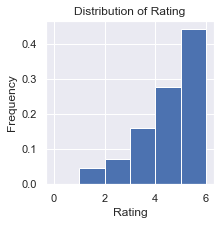

In [88]:
import matplotlib.pyplot as plt
temp_df.rating.plot(kind='hist', bins=[0,1,2,3,4,5,6], density=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')

<AxesSubplot:xlabel='rating', ylabel='Count'>

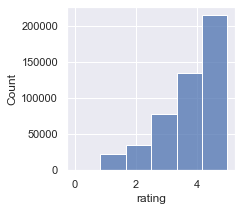

In [84]:
sns.histplot(data=temp_df, x='rating', stat='count', bins=6)

In [54]:
dataa=temp_df.groupby('rating').count().rename(columns={'Unnamed: 0': 'Count'})[['Count']]

<AxesSubplot:xlabel='rating'>

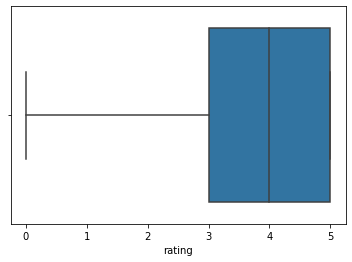

In [58]:
import seaborn as sns

Text(0.5, 1.0, 'Boxplot of Rating')

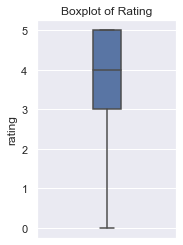

In [76]:
sns.set(rc={'figure.figsize':(2.5,4)})
sns.boxplot(y='rating', data=temp_df, width=0.2, fliersize=2).set_title('Boxplot of Rating')

In [299]:
print(temp_df[temp_df.rating==0]['reviewText'][91446])

Gamja fries are amazing. Okonomiyaki is one of the best in the city. Really great bibimbap. Come for lunch on the weekend for casual counter service and no lines!


In [301]:
temp_df[temp_df.rating==0]

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
91446,209876,0.0,Joy Ding,Gamja fries are amazing. Okonomiyaki is one of...,"['Asian Restaurant', 'Brunch Restaurant']",107051294380716454953,1.365367e+09,"Apr 7, 2013",100365917800462850552,Namu Gaji,...,"[['Monday', [['Closed']], 1], ['Tuesday', [['5...",(415) 431-6268,False,"[37.761541, -122.425954]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-07 20:28:23


In [302]:
temp_df[temp_df.gPlusUserId == '100365917800462850552']

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
91446,209876,0.0,Joy Ding,Gamja fries are amazing. Okonomiyaki is one of...,"['Asian Restaurant', 'Brunch Restaurant']",107051294380716454953,1.365367e+09,"Apr 7, 2013",100365917800462850552,Namu Gaji,...,"[['Monday', [['Closed']], 1], ['Tuesday', [['5...",(415) 431-6268,False,"[37.761541, -122.425954]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-07 20:28:23
91447,209867,4.0,Joy Ding,Great pork belly dish. Ramen is a great option...,"['Japanese Restaurant', 'Asian Restaurant', 'W...",105464128300743989905,1.366751e+09,"Apr 23, 2013",100365917800462850552,Nombe Restaurant,...,"[['Monday', [['Closed']], 1], ['Tuesday', [['6...",(415) 681-7150,False,"[37.757234, -122.418845]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-23 20:59:26
91448,209880,5.0,Joy Ding,Amazing izakaya. Bacon wrapped mochi is deligh...,"['Yakitori Restaurant', 'Ramen Restaurant', 'J...",109838490606485277536,1.366754e+09,"Apr 23, 2013",100365917800462850552,Izakaya Sozai,...,"[['Monday', [['5:30--10:00 pm']], 1], ['Tuesda...",(415) 742-5122,False,"[37.763805, -122.474154]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-23 21:46:23
91449,209868,4.0,Joy Ding,"good drinks, nice atmosphere",['Bar'],114275201995286737052,1.366838e+09,"Apr 24, 2013",100365917800462850552,Churchill,...,"[['Monday', [['4:00 pm--2:00 am']], 1], ['Tues...",NaN,False,"[37.767918, -122.429139]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-24 21:20:36
91450,209886,4.0,Joy Ding,The chicken is phenomenal. Fun place for a lar...,"['Latin American Restaurant', 'South American ...",116552908301646945508,1.367258e+09,"Apr 29, 2013",100365917800462850552,Limón Rotisserie,...,"[['Monday', [['12:00--10:30 pm']], 1], ['Tuesd...",(415) 252-0918,False,"[37.764415, -122.422136]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-04-29 17:58:18
91451,209883,5.0,Joy Ding,NaN,['Coffee Shop'],114804696919218684609,1.367891e+09,"May 6, 2013",100365917800462850552,Starbucks,...,"[['Monday', [['4:30 am--7:00 pm']], 1], ['Tues...",(415) 974-5926,False,"[37.778863, -122.396444]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-05-07 01:50:32
91452,209854,4.0,Joy Ding,Though generally a bigger fan of thick crust p...,['Pizza Restaurant'],110996156886673058386,1.368065e+09,"May 8, 2013",100365917800462850552,Pizzeria Delfina,...,"[['Monday', [['5:00--10:00 pm']], 1], ['Tuesda...",(415) 437-6800,False,"[37.76144, -122.424211]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-05-09 01:57:30
91453,209870,4.0,Joy Ding,"Wonderful brunch, great patio",['Californian Restaurant'],113398523083225257113,1.368143e+09,"May 9, 2013",100365917800462850552,Solbar,...,"[['Monday', [['7:00 am--10:00 pm']], 1], ['Tue...",(707) 226-0800,False,"[38.583837, -122.570397]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-05-09 23:35:10
91454,209869,4.0,Joy Ding,The tea lead salad here is one of the best thi...,"['Burmese Restaurant', 'Southeast Asian Restau...",112181377194391010841,1.368145e+09,"May 9, 2013",100365917800462850552,Burma Superstar,...,"[['Monday', [['11:30 am--3:30 pm'], ['5:00--10...",(415) 387-2147,False,"[37.782787, -122.46254]",Joy Ding,"[['Google', 'APM', [[1, 1, 2010], [1, 1, 2011]...",NaN,NaN,"[[[], [], [], [], [], 6], []]",2013-05-10 00:08:28
91455,209859,4.0,Joy Ding,"Delicious oysters, great outdoor seating, amaz...","['Californian Res

In [293]:
rating=temp_df.groupby('rating').count().rename(columns={'Unnamed: 0': 'Count'})['Count']
rating*100 / sum(rating)

rating
0.0     0.000206
1.0     4.651397
2.0     7.322523
3.0    15.905685
4.0    27.845895
5.0    44.274295
Name: Count, dtype: float64

In [6]:
temp_time=temp_df.time.apply(pd.to_datetime)

Text(0.5, 0, 'Review Year')

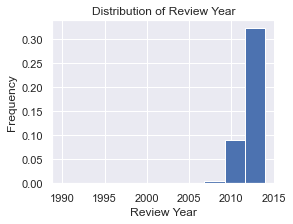

In [91]:
sns.set(rc={'figure.figsize':(4,3)})
temp_time.dt.year.plot(kind='hist', density=True)
plt.title('Distribution of Review Year')
plt.xlabel('Review Year')

Text(0.5, 0, 'Quarter')

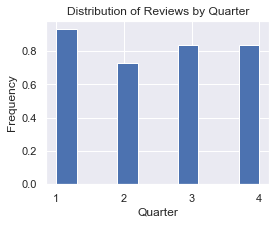

In [92]:
import matplotlib.pyplot as plt
temp_time.dt.quarter.plot(kind='hist', density=True)
plt.title('Distribution of Reviews by Quarter')
plt.xlabel('Quarter')

In [78]:
temp_cop = temp_df.assign(quarter=temp_time.dt.quarter)

Text(0.5, 1.0, 'Boxplot of Rating by Quarter')

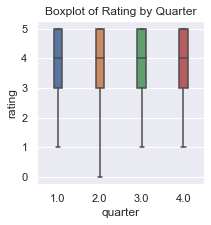

In [83]:
sns.set(rc={'figure.figsize':(3,3)})
sns.boxplot(y='rating', x='quarter', data=temp_cop, width=0.2, fliersize=2).set_title('Boxplot of Rating by Quarter')

In [281]:
pd.DataFrame({'time':temp_time.dt.year, 'Count':np.repeat([0], temp_df.shape[0])}).groupby('time').count()

,Count
time,
1990.0,219
2000.0,1
2001.0,2
2002.0,17
2003.0,27
2004.0,259
2005.0,346
2006.0,382
2007.0,515


In [282]:
pd.DataFrame({'time':temp_time.dt.year, 'Count':np.repeat([0], temp_df.shape[0])}).describe()

,time,Count
count,483476.000000,486499.0
mean,2012.285950,0.0
std,1.228881,0.0
min,1990.000000,0.0
25%,2012.000000,0.0
50%,2013.000000,0.0
75%,2013.000000,0.0
max,2014.000000,0.0


In [13]:
pd.DataFrame({'quarter':temp_time.dt.quarter, 'Count':np.repeat([0], temp_df.shape[0])}).groupby('quarter').count()

,Count
quarter,
1.0,135406
2.0,105424
3.0,121243
4.0,121403


In [268]:
temp_time.min()

Timestamp('1990-12-31 00:00:00')

In [269]:
temp_df[temp_df['time'] == '1990-12-31 00:00:00']

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
3492,222429,5.0,Venkatesh Natarajan,wow.,['French Restaurant'],106121150072386159289,662601600.0,"Dec 30, 1990",100012304369710972931,The French Laundry,...,"[['Monday', [['5:30--9:15 pm']], 1], ['Tuesday...",(707) 944-2380,False,"[38.404402, -122.36499]",Venkatesh Natarajan,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
3493,222431,3.0,Venkatesh Natarajan,"First off, I'll say that the food here isn't b...","['Vegetarian Restaurant', 'American Restaurant...",102030862196722965649,662601600.0,"Dec 30, 1990",100012304369710972931,dirtcandy,...,"[['Monday', [['Closed']], 1], ['Tuesday', [['5...",(212) 228-7732,False,"[40.727489, -73.983584]",Venkatesh Natarajan,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
3494,222434,5.0,Venkatesh Natarajan,"Food was better than I thought it would be, bu...",['American Restaurant'],103985450646636352397,662601600.0,"Dec 30, 1990",100012304369710972931,The Signature Room at the 95th,...,"[['Monday', [['11:00 am--2:30 pm'], ['5:00--10...",(312) 787-9596,False,"[41.898829, -87.622983]",Venkatesh Natarajan,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
3495,222437,5.0,Venkatesh Natarajan,"Along with Blossom, some of the best vegan foo...","['Vegan Restaurant', 'Organic Restaurant', 'Ca...",108515560976804680303,662601600.0,"Dec 30, 1990",100012304369710972931,Candle 79,...,"[['Monday', [['12:00--3:30 pm'], ['5:30--10:30...",(212) 537-7179,False,"[40.774614, -73.958743]",Venkatesh Natarajan,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
3496,222446,3.0,Venkatesh Natarajan,One of the few all-vegetarian sushi places in ...,"['Pan-Asian Restaurant', 'Vegetarian Restauran...",115663592239047421181,662601600.0,"Dec 30, 1990",100012304369710972931,Soy & Sake,...,"[['Monday', [['12:00--11:00 pm']]], ['Tuesday'...",(212) 255-2848,False,"[40.731314, -74.003918]",Venkatesh Natarajan,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348923,117576,5.0,Thomas Maroldo,Wonderful downtown spot for breakfast. Homey a...,"['Bistro', 'Bar', 'American Restaurant']",101752596214621523994,662601600.0,"Dec 30, 1990",101340906374493304292,Mother's Bistro & Bar,...,"[['Monday', [['Closed']], 1], ['Tuesday', [['7...",(503) 464-1122,False,"[45.519974, -122.673671]",Thomas Maroldo,"[['', 'Radiologist', [[], [], 1], [], ''], ['U...","['Walla Walla', [[], 460645810, -1183430210, 1]]","[['New York City', [[], 407142690, -740059730,...","[[[], [], [], [], [], 6], [['Columbia Physicia...",1990-12-31 00:00:00
355420,94278,4.0,Brent Carlson,"Definitely the place to go for seafood, with a...","['Seafood Restaurant', 'Oyster Bar Restaurant'...",105252857286343190220,662601600.0,"Dec 30, 1990",101366168656081206247,Aquagrill,...,"[['Monday', [['12:00--3:00 pm'], ['6:00--11:00...",(212) 274-0505,False,"[40.725374, -74.003857]",Brent Carlson,NaN,NaN,"[['Rochester, MN', [[], 440216310, -924698990,...","[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
355421,94298,5.0,Brent Carlson,"""Superbly prepared food in a simple setting. A...",['American Restaurant'],113313503628184250740,662601600.0,"Dec 30, 1990",101366168656081206247,Perilla,...,"[['Monday', [['5:30--10:00 pm']], 1], ['Tuesda...",(212) 929-6868,False,"[40.73232, -74.001977]",Brent Carlson,NaN,NaN,"[['Rochester, MN', [[], 440216310, -924698990,...","[[[], [], [], [], [], 6], []]",1990-12-31 00:00:00
355422,94303,4.0,Brent Carlson,Decent food at an ok price - nothing to write ...,"['Mexican Restaurant', 'Latin American Restaur...",115794891170554948676,662601600.0,"Dec 30, 1990",101366168656081206247,Gabbi's Mexican Kitchen,...,"[['Monday', [['11:00 am--10:00 pm']], 1], ['Tu...",(714) 633-3038,False,"[33.786806,

<AxesSubplot:xlabel='unixReviewTime', ylabel='rating'>

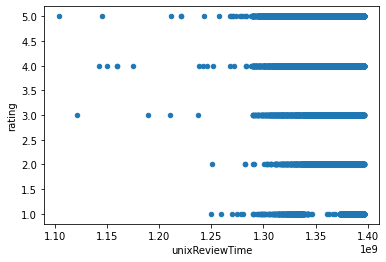

In [52]:
testdata.plot(kind='scatter', y='rating', x='unixReviewTime')

In [107]:
def get_place(x):
    splt = eval(x)[-1].split()
    if len(splt) == 1:
        return splt[0]
    if len(splt) == 2 and len(splt[0]) == 2:
        return 'United States'
    return splt[0]
places=temp_df.reset_index().place_address.apply(get_place)

In [109]:
places

0         ['Sakurakoji-6 Toyomamachi Teraike', 'Tome, Mi...
1              ['Japan', '〒987-0704', '宮城県登米市登米町日野渡内の目３１６']
2                                                 〒982-0837
3         ['4-1 Dainoharashinrinkoen', 'Aoba Ward, Senda...
4         ['Machi-132 Nakadacho Ishinomori', 'Tome, Miya...
                                ...                        
486494                                              Dayton,
486495                                              Capital
486496                                               United
486497                                          ['Germany']
486498                                            Santiago,
Name: place_address, Length: 486499, dtype: object

In [116]:
eval(temp_df.reset_index().place_address[1])[-1].split()[0]

'宮城県登米市登米町日野渡内の目３１６'

In [122]:
sorted(eval(temp_df.reset_index().place_address[5]))

['Japan', '〒988-0181', '宮城県気仙沼市赤岩杉ノ沢４７－６']

In [132]:
arr1=np.array([4,2,3])
arr2=np.array([4,2,5])
1 - MSE(arr1, arr2)/variance(arr2)

0.1428571428571428

In [130]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [158]:
temp_df.head(5)

,Unnamed: 0,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,place_name,...,hours,place_phone,closed,gps,userName,jobs,currentPlace,previousPlaces,education,time
0,1,5.0,森田さとこ,今度は予定に休みが登米市に行きたい❗☀😅🌌 楽しいに日帰りに登米の見学の観光(*^)(*^-...,['Museum'],101477177500158511502,1.389188e+09,"Jan 8, 2014",100000021336848867366,教育資料館,...,NaN,0220-52-2496,False,"[38.655345, 141.27981]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 13:28:26
1,8,4.0,森田さとこ,これから、私は予定に秋が一人で旅行の楽しいに宮城県登米市に行って泊まり来ますので思います❗☀,['Budget Hotel'],116871469190387424406,1.389192e+09,"Jan 8, 2014",100000021336848867366,ホテル望遠閣,...,NaN,0220-52-3171,False,"[38.661376, 141.270518]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-08 14:36:41
2,3,5.0,森田さとこ,久しぶりに仙台市八木山ベニーランドに乗りたい❗,['Theme Park'],107443380765688783479,1.390193e+09,"Jan 19, 2014",100000021336848867366,八木山ベニーランド,...,NaN,022-229-1603,False,"[38.24675, 140.848436]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-20 04:38:49
3,6,4.0,森田さとこ,ヒマ👽休みが仙台市科学館 に行って見ます❗,['Science Museum'],111951491217608644315,1.390388e+09,"Jan 22, 2014",100000021336848867366,仙台市科学館,...,NaN,022-276-2201,False,"[38.298826, 140.883233]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-22 10:45:29
4,5,4.0,森田さとこ,イベントの光のページェント が素晴らしい❗🔍 私はとても仮面ライダーが素晴らしいが良いがです🎵ネ。,['Art Museum'],111367239248458923884,1.390446e+09,"Jan 22, 2014",100000021336848867366,石ノ森章太郎ふるさと記念館,...,NaN,0220-35-1099,False,"[38.719869, 141.213545]",森田さとこ,NaN,NaN,NaN,"[[[], [], [], [], [], 6], []]",2014-01-23 02:52:41


In [137]:
rt=temp_df[['rating', 'time']]
rt=rt.assign(time=(rt['time'].apply(pd.to_datetime)).dt.month)

In [140]:
rt = rt.rename(columns={'time': 'month'})
rt.groupby('month').mean()

,rating
month,
1.0,3.964765
2.0,3.993445
3.0,4.006450
4.0,3.955397
5.0,3.997970
6.0,4.030694
7.0,4.038866
8.0,4.020279
9.0,4.032298


Text(0.5, 1.0, 'Plot of Average Ratings by Month')

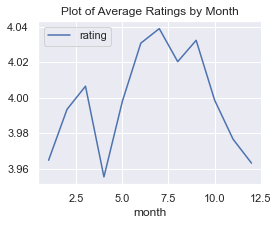

In [155]:
rt.groupby('month').mean().reset_index().plot(kind='line', x='month', y='rating').set_title('Plot of Average Ratings by Month')

In [154]:
rt.groupby('month').mean().reset_index()

,month,rating
0,1.0,3.964765
1,2.0,3.993445
2,3.0,4.006450
3,4.0,3.955397
4,5.0,3.997970
5,6.0,4.030694
6,7.0,4.038866
7,8.0,4.020279
8,9.0,4.032298
9,10.0,3.998631
